In [23]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm 
import glob as glob

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.patches import Rectangle

import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib as mpl
import colormaps

import pymannkendall as mk

import glob as glob
import matplotlib.path as mpath
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.ticker import ScalarFormatter,AutoLocator,MultipleLocator,AutoMinorLocator,FixedLocator
import matplotlib.patches as mpatches

from imods.stats import *
from imods.stats import sia_index

files = sorted(glob.glob('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/isotope-nudging2.cam.h0.TA*V.197901-202212.nc'))

def preprocess(ds,i=1):
    return ds[f'TA{(i+1):02.0f}V']

q = [preprocess(xr.open_dataset(file),i) for i,file in enumerate(files)]
q = xr.concat(q,dim='region')
q.coords['region'] = np.arange(1,55,step=1)
q

In [24]:
q = (xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/isotope-nudging2.cam.h0.QREFHT.197901-202212.nc')['QREFHT'])
q.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
q

<xarray.DataArray 'QREFHT' (time: 528, lat: 96, lon: 144)>
[7299072 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:         kg/kg
    long_name:     Reference height humidity
    cell_methods:  time: mean

In [25]:
t = (xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/isotope-nudging2.cam.h0.TREFHT.197901-202212.nc')['TREFHT'])
t.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
t

<xarray.DataArray 'TREFHT' (time: 528, lat: 96, lon: 144)>
[7299072 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:         K
    long_name:     Reference height temperature
    cell_methods:  time: mean

In [26]:
ps = (xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/isotope-nudging2.cam.h0.PS.197901-202212.nc')['PS'])
ps.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
ps

<xarray.DataArray 'PS' (time: 528, lat: 96, lon: 144)>
[7299072 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:         Pa
    long_name:     Surface pressure
    cell_methods:  time: mean

In [27]:
precl = (xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/isotope-nudging2.cam.h0.PRECL.197901-202212.nc')['PRECL'])
precl.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
precl

<xarray.DataArray 'PRECL' (time: 528, lat: 96, lon: 144)>
[7299072 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:         m/s
    long_name:     Large-scale (stable) precipitation rate (liq + ice)
    cell_methods:  time: mean

In [28]:
precc = (xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/isotope-nudging2.cam.h0.PRECC.197901-202212.nc')['PRECC'])
precc.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
precc

<xarray.DataArray 'PRECC' (time: 528, lat: 96, lon: 144)>
[7299072 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:         m/s
    long_name:     Convective precipitation rate (liq + ice)
    cell_methods:  time: mean

In [29]:
z200 = (xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/isotope-nudging2.cam.h0.Z3.197901-202212.plev.nc')['Z3']).sel(plev=20000)
z200.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
z200

<xarray.DataArray 'Z3' (time: 528, lat: 96, lon: 144)>
[7299072 values with dtype=float32]
Coordinates:
    plev     float64 2e+04
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
Attributes:
    mdims:         1
    units:         m
    long_name:     Geopotential Height (above sea level)
    cell_methods:  time: mean

In [30]:
prect = precl + precc

In [31]:
from metpy.calc import dewpoint_from_specific_humidity
from metpy.units import units
td = dewpoint_from_specific_humidity(ps * units.Pa, t * units('K'), q * units('kg/kg'))

/home/itbaxter/.conda/envs/ianpy37/lib/python3.11/site-packages/metpy/calc/thermo.py:1341: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')


In [32]:
vp1 = 6.112 * np.exp (17.67*td.values/(td.values+243.5))
vp1 = xr.DataArray(vp1,name='vapor_pressure',coords=td.coords,dims=td.dims)
vp1

<xarray.DataArray 'vapor_pressure' (time: 528, lat: 96, lon: 144)>
array([[[0.37173066, 0.38902658, 0.37059867, ..., 0.38851303,
         0.36850962, 0.37075192],
        [0.40215418, 0.4016356 , 0.39277104, ..., 0.41651535,
         0.41705617, 0.4106634 ],
        [0.4268389 , 0.41584918, 0.4053418 , ..., 0.5037743 ,
         0.46340114, 0.45723826],
        ...,
        [0.40825903, 0.40306062, 0.40030783, ..., 0.41422385,
         0.41241738, 0.41103455],
        [0.3556737 , 0.3524017 , 0.34845322, ..., 0.36043274,
         0.3592714 , 0.35771355],
        [0.33569744, 0.3347112 , 0.33345413, ..., 0.33767974,
         0.33715433, 0.33653417]],

       [[0.17365105, 0.17871442, 0.17332351, ..., 0.17863952,
         0.17291711, 0.17336372],
        [0.1891117 , 0.18878959, 0.18666886, ..., 0.19368467,
         0.19357747, 0.1913772 ],
        [0.21013507, 0.20796296, 0.20580406, ..., 0.23770185,
         0.22279039, 0.2199093 ],
...
        [0.88371325, 0.9150564 , 0.9335849 , ..., 0.82179374,
         0.8381413 , 0.856431  ],
        [0.83046335, 0.836576  , 0.84213966, ..., 0.81326634,
         0.8185308 , 0.82421064],
        [0.8201952 , 0.8216122 , 0.82344854, ..., 0.81661266,
         0.8177476 , 0.8188941 ]],

       [[0.3539259 , 0.37712997, 0.35172683, ..., 0.37656346,
         0.35127154, 0.35165748],
        [0.38584828, 0.38504294, 0.38115373, ..., 0.3968472 ,
         0.39782098, 0.38932315],
        [0.40949908, 0.39576808, 0.391714  , ..., 0.44480038,
         0.42525095, 0.4128143 ],
        ...,
        [0.82717836, 0.8405309 , 0.849524  , ..., 0.78810203,
         0.7999471 , 0.812682  ],
        [0.7613873 , 0.7635635 , 0.7629237 , ..., 0.73851067,
         0.7467396 , 0.7545083 ],
        [0.65471774, 0.65442806, 0.65419453, ..., 0.6536102 ,
         0.6543296 , 0.65471226]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [33]:
svp1 = 6.112 * np.exp (17.67*(t-273.15).values/((t-273.15).values+243.5))
svp1 = xr.DataArray(svp1,name='vapor_pressure',coords=td.coords,dims=td.dims)
svp1

<xarray.DataArray 'vapor_pressure' (time: 528, lat: 96, lon: 144)>
array([[[0.52403784, 0.547954  , 0.52246803, ..., 0.54726785,
         0.5195983 , 0.52269197],
        [0.5454063 , 0.54657006, 0.5364833 , ..., 0.5605884 ,
         0.5625955 , 0.55511   ],
        [0.5704234 , 0.5577558 , 0.54579026, ..., 0.67651284,
         0.61900324, 0.611113  ],
        ...,
        [0.43047523, 0.42691714, 0.42524216, ..., 0.43314418,
         0.43174237, 0.43143517],
        [0.39171752, 0.38894776, 0.38574082, ..., 0.39528197,
         0.39449042, 0.39335135],
        [0.3703487 , 0.3693727 , 0.36810702, ..., 0.37262708,
         0.37194663, 0.37119192]],

       [[0.24532072, 0.25314224, 0.24480855, ..., 0.25304976,
         0.2442141 , 0.24486955],
        [0.2558357 , 0.25655717, 0.2546773 , ..., 0.25859132,
         0.25960284, 0.25767615],
        [0.27480513, 0.27454284, 0.27381477, ..., 0.30606794,
         0.28757587, 0.28572536],
...
        [0.9414543 , 0.960154  , 0.97120106, ..., 0.9003322 ,
         0.911688  , 0.92409486],
        [0.9228818 , 0.9265877 , 0.9292984 , ..., 0.908479  ,
         0.91321635, 0.91815424],
        [0.9211552 , 0.9221659 , 0.92353326, ..., 0.91812056,
         0.9191731 , 0.92018676]],

       [[0.5085285 , 0.53992695, 0.5055113 , ..., 0.5391674 ,
         0.5048798 , 0.505418  ],
        [0.55547243, 0.557198  , 0.5537753 , ..., 0.5622118 ,
         0.5662898 , 0.55713916],
        [0.566733  , 0.55389726, 0.55338943, ..., 0.6029254 ,
         0.5771166 , 0.564464  ],
        ...,
        [0.9089964 , 0.91782904, 0.9235508 , ..., 0.87691754,
         0.8868052 , 0.89753246],
        [0.8551462 , 0.8568163 , 0.8557895 , ..., 0.83520925,
         0.8424569 , 0.8492752 ],
        [0.7600736 , 0.75940496, 0.7587335 , ..., 0.7598622 ,
         0.76030827, 0.76042074]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

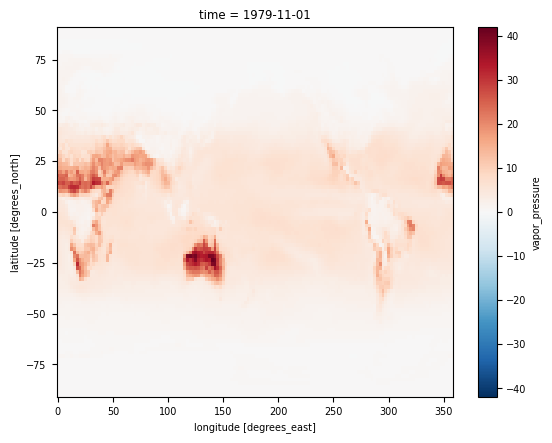

In [34]:
((svp1 - vp1)).isel(time=10).plot()

In [35]:
ds_y = jja(vp1).sel(year=slice(1981,2022))

rvp1 = linregress(ds_y,ds_y.year)
rvp1

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 144, year: 42)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (lat, lon) float64 3.628e-05 3.749e-05 ... 0.00359 0.003586
    intercept  (lat, lon) float64 -0.03442 -0.03669 -0.03331 ... -1.66 -1.651
    r          (lat, lon) float64 0.08261 0.0851 0.08139 ... 0.2731 0.2733
    p          (lat, lon) float64 0.603 0.5921 0.6084 ... 0.08014 0.07989
    stderr     (lat, lon) float64 6.921e-05 6.941e-05 ... 0.002 0.001995
    predicted  (year, lat, lon) float64 0.03746 0.03758 0.03746 ... 5.6 5.6 5.6

In [36]:
ds_y = mam(vp1).sel(year=slice(1981,2022))

rvp1m = linregress(ds_y,ds_y.year)
rvp1m

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 144, year: 42)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (lat, lon) float64 8.21e-05 8.88e-05 ... 0.005004 0.005023
    intercept  (lat, lon) float64 -0.1038 -0.1166 -0.09825 ... -8.645 -8.683
    r          (lat, lon) float64 0.1526 0.1639 0.1475 ... 0.3744 0.3749 0.3756
    p          (lat, lon) float64 0.3346 0.2996 0.3511 ... 0.01442 0.01423
    stderr     (lat, lon) float64 8.406e-05 8.45e-05 ... 0.001956 0.00196
    predicted  (year, lat, lon) float64 0.05881 0.05934 0.05882 ... 1.473 1.474

In [37]:
ds_y = jja(svp1).sel(year=slice(1981,2022)) #.groupby('time.year').mean('time')

rsvp1 = linregress(ds_y,ds_y.year)
rsvp1

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 144, year: 42)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (lat, lon) float64 8.525e-05 8.795e-05 ... 0.004481 0.00447
    intercept  (lat, lon) float64 -0.1213 -0.1264 -0.1192 ... -3.238 -3.215
    r          (lat, lon) float64 0.1532 0.1575 0.1514 ... 0.3353 0.3357 0.3355
    p          (lat, lon) float64 0.3326 0.3191 0.3384 ... 0.02976 0.02985
    stderr     (lat, lon) float64 8.692e-05 8.718e-05 ... 0.001988 0.001984
    predicted  (year, lat, lon) float64 0.04759 0.04782 0.04759 ... 5.823 5.823

In [38]:
ds_y = mam(svp1).sel(year=slice(1981,2022)) #.groupby('time.year').mean('time')

rsvp1m = linregress(ds_y,ds_y.year)
rsvp1m

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 144, year: 42)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (lat, lon) float64 0.0001466 0.0001586 ... 0.004602 0.004627
    intercept  (lat, lon) float64 -0.2143 -0.2369 -0.204 ... -7.752 -7.802
    r          (lat, lon) float64 0.2254 0.2424 0.2179 ... 0.3545 0.3556 0.3569
    p          (lat, lon) float64 0.1512 0.1219 0.1657 ... 0.02081 0.02032
    stderr     (lat, lon) float64 0.0001002 0.0001003 ... 0.001912 0.001915
    predicted  (year, lat, lon) float64 0.07625 0.07719 0.07628 ... 1.553 1.553

In [39]:
ds_y = jja(prect).sel(year=slice(1981,2022))

rprec = linregress(ds_y,ds_y.year)
rprec

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 144, year: 42)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (lat, lon) float64 -2.281e-12 -2.281e-12 ... -8.198e-12
    intercept  (lat, lon) float64 6.233e-09 6.233e-09 ... 2.36e-08 2.365e-08
    r          (lat, lon) float64 -0.05896 -0.05896 ... -0.05522 -0.05539
    p          (lat, lon) float64 0.7107 0.7107 0.7107 ... 0.7282 0.7284 0.7275
    stderr     (lat, lon) float64 6.107e-12 6.107e-12 ... 2.337e-11 2.337e-11
    predicted  (year, lat, lon) float64 1.714e-09 1.714e-09 ... 7.076e-09

In [40]:
ds_y = jja(z200).sel(year=slice(1981,2022))

rz = linregress(ds_y,ds_y.year)
rz

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 144, year: 42)
Coordinates:
    plev       float64 2e+04
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (lat, lon) float64 0.2925 0.2925 0.2925 ... 1.472 1.472 1.472
    intercept  (lat, lon) float64 1.001e+04 1.001e+04 ... 8.718e+03 8.718e+03
    r          (lat, lon) float64 0.06674 0.06674 0.06674 ... 0.357 0.357 0.357
    p          (lat, lon) float64 0.6745 0.6745 0.6745 ... 0.0203 0.0203 0.0203
    stderr     (lat, lon) float64 0.6915 0.6915 0.6915 ... 0.6089 0.6089 0.6089
    predicted  (year, lat, lon) float64 1.059e+04 1.059e+04 ... 1.169e+04

In [41]:
ds_y = z200.where(z200['time.month'] <= 5).groupby('time.year').mean('time').sel(year=slice(1981,2022))

mrz = linregress(ds_y,ds_y.year)
mrz

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 144, year: 42)
Coordinates:
    plev       float64 2e+04
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (lat, lon) float64 -0.1171 -0.1171 -0.1171 ... 1.389 1.389 1.389
    intercept  (lat, lon) float64 1.12e+04 1.12e+04 ... 8.311e+03 8.311e+03
    r          (lat, lon) float64 -0.04598 -0.04598 -0.04598 ... 0.2709 0.2709
    p          (lat, lon) float64 0.7725 0.7725 0.7725 ... 0.08273 0.08273
    stderr     (lat, lon) float64 0.4022 0.4022 0.4022 ... 0.7807 0.7807 0.7807
    predicted  (year, lat, lon) float64 1.097e+04 1.097e+04 ... 1.112e+04

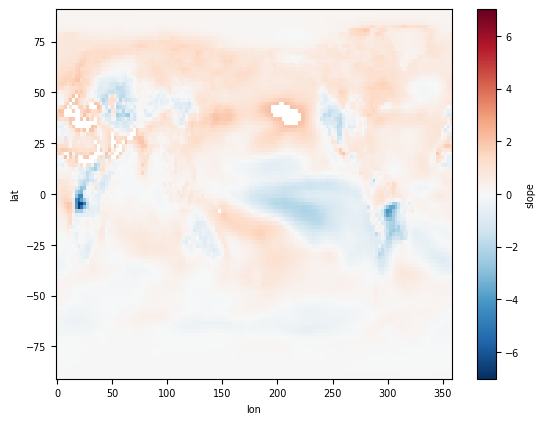

In [42]:
((rvp1.where(rvp1 <= 0.05))*42).slope.plot()

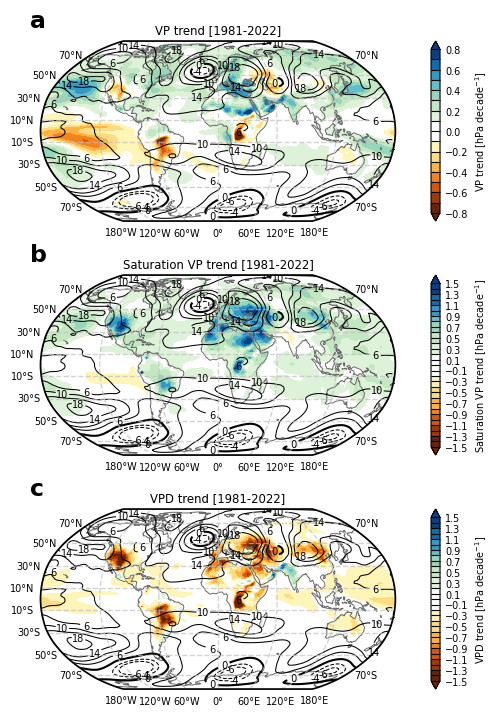

In [43]:
# Create a custom RdYlBu colormap with white in the middle
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = 7
mpl.rcParams['hatch.color'] = 'silver'

fig = plt.figure(figsize=(7.5,8))
# Panel 1--------------------------------------------------
ax = fig.add_subplot(311,projection=ccrs.Robinson(central_longitude=0))
#ax = fig.add_axes([0,0.35,0.5,0.35],ccrs.NorthPolarStereo())
#ax.set_extent([-180,180,-90,90],ccrs.PlateCarree())
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')
ax.set_title('VP trend [1981-2022]')

#ax.text(-0.4, 0.25, 'iCESM1', weight='bold',
#        fontsize=17,
#        rotation=0,
#        horizontalalignment='left',
#         verticalalignment='bottom', transform=ax.transAxes)

ax.text(-0.03, 1.05, 'a', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

# Plot the pcolormesh grid with the specified colormap and normalization
#norm = BoundaryNorm(boundaries, new_cmap.N, clip=True)


colors1 = plt.cm.GnBu(np.linspace(0, 1, 256))
colors2 = plt.cm.YlOrBr(np.linspace(0, 1, 256))[::-1]
new_colors = np.vstack((colors2[:], np.ones((40, 4)), colors1[:]))
new_cmap = LinearSegmentedColormap.from_list('RdYlBu_r_white', new_colors, N=16)

levels = np.arange(-0.8,0.81,step=0.1)

rvp1s,lons = add_cyclic_point(rvp1.slope*10,rvp1.lon)
p = ax.contourf(lons, rvp1['lat'], rvp1s,
                cmap=new_cmap,
                levels=levels,
                extend='both',
                transform=ccrs.PlateCarree()
               )

# Geopotential Height
rzs,lons = add_cyclic_point(rz.slope*10,rvp1.lon)
c = ax.contour(lons,rz['lat'],rzs,
               levels=[-6,-4,6,10,14,18],
               linewidths=0.75,
               colors='k',
               transform=ccrs.PlateCarree()
              )

z = ax.contour(lons,rz['lat'],rzs,
               levels=[0],
               linewidths=1.5,
               colors='k',
               transform=ccrs.PlateCarree()
              )

def fmt(x):
    return f'{x:2.0f}'

clab1 = ax.clabel(c, c.levels, inline=True, fmt=fmt, fontsize=7)
clab2 = ax.clabel(z, z.levels, inline=True, fmt=fmt, fontsize=7)
for l in clab1+clab2:
    l.set_rotation(0)

# Colorbar

#cax = fig.add_axes([0.1,0.05,0.35,0.01])
cb = plt.colorbar(p,orientation='vertical', 
                  drawedges=True,
                  ticks=levels[::2]
                 )

#cb.set_ticklabels(f'{levels:0.02f}') #[::3])
cb.set_label(r'VP trend [hPa $\mathrm{decade^{-1}}$]')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)
cb.ax.minorticks_off()

#cax2 = cax.twinx()

#cax2.set_ylim(0.1,1)
#cax2.set_yticks(iticks)
#cax2.set_yticklabels(1./iticks)
#cax2.set_ylabel(r'Contribution to Arctic WV trend [g $\mathrm{kg^{-1}\ decade^{-1}}$]')

ax.spines['geo'].set_linewidth(1.25)

# Colorbar
colorbar_position = cb.ax.get_position()

ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1.0,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='silver', 
                  linestyle='--', alpha=0.7)
gl.top_labels = False  # Turn off top labels
gl.left_labels = True  # Turn off left labels
gl.right_labels = False  # Turn off left labels
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -70, -50, -30, -10, 10, 30, 50, 70, 90])

# Panel 2--------------------------------------------------
ax = fig.add_subplot(312,projection=ccrs.Robinson(central_longitude=0))
#ax = fig.add_axes([0,0.35,0.5,0.35],ccrs.NorthPolarStereo())
#ax.set_extent([-180,180,-90,90],ccrs.PlateCarree())
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')
ax.set_title('Saturation VP trend [1981-2022]')

#ax.text(-0.4, 0.25, 'iCESM1', weight='bold',
#        fontsize=17,
#        rotation=0,
#        horizontalalignment='left',
#         verticalalignment='bottom', transform=ax.transAxes)

ax.text(-0.03, 1.05, 'b', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

# Plot the pcolormesh grid with the specified colormap and normalization
#norm = BoundaryNorm(boundaries, new_cmap.N, clip=True)


colors1 = plt.cm.GnBu(np.linspace(0, 1, 256))
colors2 = plt.cm.YlOrBr(np.linspace(0, 1, 256))[::-1]
new_colors = np.vstack((colors2[:], np.ones((40, 4)), colors1[:]))
new_cmap = LinearSegmentedColormap.from_list('RdYlBu_r_white', new_colors, N=16)

levels = np.arange(-1.5,1.51,step=0.1)

rvp1s,lons = add_cyclic_point(rsvp1.slope*10,rvp1.lon)
p = ax.contourf(lons, rvp1['lat'], rvp1s,
                cmap=new_cmap,
                levels=levels,
                extend='both',
                transform=ccrs.PlateCarree()
               )

# Geopotential Height
rzs,lons = add_cyclic_point(rz.slope*10,rvp1.lon)
c = ax.contour(lons,rz['lat'],rzs,
               levels=[-6,-4,6,10,14,18],
               linewidths=0.75,
               colors='k',
               transform=ccrs.PlateCarree()
              )

z = ax.contour(lons,rz['lat'],rzs,
               levels=[0],
               linewidths=1.5,
               colors='k',
               transform=ccrs.PlateCarree()
              )

def fmt(x):
    return f'{x:2.0f}'

clab1 = ax.clabel(c, c.levels, inline=True, fmt=fmt, fontsize=7)
clab2 = ax.clabel(z, z.levels, inline=True, fmt=fmt, fontsize=7)
for l in clab1+clab2:
    l.set_rotation(0)

# Colorbar

#cax = fig.add_axes([0.1,0.05,0.35,0.01])
cb = plt.colorbar(p,orientation='vertical', 
                  drawedges=True,
                  ticks=levels[::2]
                 )

#cb.set_ticklabels(f'{levels:0.02f}') #[::3])
cb.set_label(r'Saturation VP trend [hPa $\mathrm{decade^{-1}}$]')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)
cb.ax.minorticks_off()

#cax2 = cax.twinx()

#cax2.set_ylim(0.1,1)
#cax2.set_yticks(iticks)
#cax2.set_yticklabels(1./iticks)
#cax2.set_ylabel(r'Contribution to Arctic WV trend [g $\mathrm{kg^{-1}\ decade^{-1}}$]')

ax.spines['geo'].set_linewidth(1.25)

# Colorbar
colorbar_position = cb.ax.get_position()

ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1.0,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='silver', 
                  linestyle='--', alpha=0.7)
gl.top_labels = False  # Turn off top labels
gl.left_labels = True  # Turn off left labels
gl.right_labels = False  # Turn off left labels
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -70, -50, -30, -10, 10, 30, 50, 70, 90])

# Panel 3--------------------------------------------------
ax = fig.add_subplot(313,projection=ccrs.Robinson(central_longitude=0))
#ax = fig.add_axes([0,0.35,0.5,0.35],ccrs.NorthPolarStereo())
#ax.set_extent([-180,180,-90,90],ccrs.PlateCarree())
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')
ax.set_title('VPD trend [1981-2022]')

#ax.text(-0.4, 0.25, 'iCESM1', weight='bold',
#        fontsize=17,
#        rotation=0,
#        horizontalalignment='left',
#         verticalalignment='bottom', transform=ax.transAxes)

ax.text(-0.03, 1.05, 'c', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

# Plot the pcolormesh grid with the specified colormap and normalization
#norm = BoundaryNorm(boundaries, new_cmap.N, clip=True)


colors1 = plt.cm.GnBu(np.linspace(0, 1, 256))
colors2 = plt.cm.YlOrBr(np.linspace(0, 1, 256))[::-1]
new_colors = np.vstack((colors2[:], np.ones((40, 4)), colors1[:]))
new_cmap = LinearSegmentedColormap.from_list('RdYlBu_r_white', new_colors, N=16)

levels = np.arange(-1.5,1.51,step=0.1)

rvp1s,lons = add_cyclic_point((rsvp1-rvp1).slope*10,rvp1.lon)
p = ax.contourf(lons, rvp1['lat'], -rvp1s,
                cmap=new_cmap,
                levels=levels,
                extend='both',
                transform=ccrs.PlateCarree()
               )

# Geopotential Height
rzs,lons = add_cyclic_point(rz.slope*10,rvp1.lon)
c = ax.contour(lons,rz['lat'],rzs,
               levels=[-6,-4,6,10,14,18],
               linewidths=0.75,
               colors='k',
               transform=ccrs.PlateCarree()
              )

z = ax.contour(lons,rz['lat'],rzs,
               levels=[0],
               linewidths=1.5,
               colors='k',
               transform=ccrs.PlateCarree()
              )

def fmt(x):
    return f'{x:2.0f}'

clab1 = ax.clabel(c, c.levels, inline=True, fmt=fmt, fontsize=7)
clab2 = ax.clabel(z, z.levels, inline=True, fmt=fmt, fontsize=7)
for l in clab1+clab2:
    l.set_rotation(0)

# Colorbar

#cax = fig.add_axes([0.1,0.05,0.35,0.01])
cb = plt.colorbar(p,orientation='vertical', 
                  drawedges=True,
                  ticks=levels[::2]
                 )

#cb.set_ticklabels(f'{levels:0.02f}') #[::3])
cb.set_label(r'VPD trend [hPa $\mathrm{decade^{-1}}$]')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)
cb.ax.minorticks_off()

#cax2 = cax.twinx()

#cax2.set_ylim(0.1,1)
#cax2.set_yticks(iticks)
#cax2.set_yticklabels(1./iticks)
#cax2.set_ylabel(r'Contribution to Arctic WV trend [g $\mathrm{kg^{-1}\ decade^{-1}}$]')

ax.spines['geo'].set_linewidth(1.25)

# Colorbar
colorbar_position = cb.ax.get_position()

ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1.0,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='silver', 
                  linestyle='--', alpha=0.7)
gl.top_labels = False  # Turn off top labels
gl.left_labels = True  # Turn off left labels
gl.right_labels = False  # Turn off left labels
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -70, -50, -30, -10, 10, 30, 50, 70, 90])

fig.subplots_adjust(top=0.92,bottom=0.11,left=0.03,right=0.98,hspace=0.3,wspace=0.1)
fig.savefig('./plots/moisture_tagging-supp_figure10-vpd.png',dpi=600)

In [44]:
irvpna = area_weighted_ave((rvp1).slope.sel(lat=slice(50,70),lon=slice(240,300))).values
irsvpna = area_weighted_ave((rsvp1).slope.sel(lat=slice(50,70),lon=slice(240,300))).values

In [45]:
irvpnam = area_weighted_ave((rvp1m).slope.sel(lat=slice(50,70),lon=slice(240,300))).values
irsvpnam = area_weighted_ave((rsvp1m).slope.sel(lat=slice(50,70),lon=slice(240,300))).values

In [46]:
irvp = area_weighted_ave((rvp1).slope.sel(lat=slice(50,70),lon=slice(0,120))).values
irsvp = area_weighted_ave((rsvp1).slope.sel(lat=slice(50,70),lon=slice(0,120))).values

In [47]:
irvpm = area_weighted_ave((rvp1m).slope.sel(lat=slice(50,70),lon=slice(0,120))).values
irsvpm = area_weighted_ave((rsvp1m).slope.sel(lat=slice(50,70),lon=slice(0,120))).values

In [48]:
irvpsw = area_weighted_ave((rvp1).slope.sel(lat=slice(20,40),lon=slice(230,260))).values
irsvpsw = area_weighted_ave((rsvp1).slope.sel(lat=slice(20,40),lon=slice(230,260))).values

In [49]:
irvpna,irsvpna,irvp,irsvp,irvpsw,irsvpsw

(array(0.02160989),
 array(0.02474901),
 array(0.01425891),
 array(0.043597),
 array(-0.0027071),
 array(0.04273876))

## Load in variables

In [50]:
file = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.SOILICE.197901-202212.nc'

soil_ice = xr.open_dataset(file)
soil_ice.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')

file = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.SOILLIQ.197901-202212.nc'

soil_liq = xr.open_dataset(file)
soil_liq.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
soil_liq

<xarray.Dataset>
Dimensions:      (levgrnd: 15, time: 528, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * levgrnd      (levgrnd) float32 0.007101 0.02792 0.06226 ... 21.33 35.18
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    SOILLIQ      (time, levgrnd, lat, lon) float32 ...
Attributes: (12/14)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/15/23 23:32:43
    source:                               Community Land Model CLM4.0
    hostname:                             ucsb
    ...                                   ...
    revision_id:                          $Id: histFileMod.F90 70608 2015-05-...
    case_title:                           UNSET
    case_id:                              isotope-nudging2
    Surface_dataset:                      surfdata_1.9x2.5_simyr1850_c091108.nc
    Initial_conditions_dataset:           b.ie12.B1850C5CN.f19_g16.LME.002.cl...
    PFT_physiological_constants_dataset:  pft-physiology.c110425.nc

In [51]:
file = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.SNOWICE.197901-202212.nc'

snow_ice = xr.open_dataset(file)

file = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.SNOWLIQ.197901-202212.nc'

snow_liq = xr.open_dataset(file)
snow = snow_ice['SNOWICE'] + snow_liq['SNOWLIQ']
snow.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
snow

<xarray.DataArray (time: 528, lat: 96, lon: 144)>
array([[[1000.0454 ,  999.9984 , 1000.03357, ...,  999.99854,
         1000.0045 ,  999.99994],
        [1000.01404, 1000.00165, 1000.0421 , ...,  999.99927,
          999.99994,  999.9988 ],
        [ 999.9999 , 1000.00006, 1000.0004 , ...,  999.9946 ,
          999.9992 ,  999.9976 ],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[1000.0434 , 1000.0001 , 1000.03186, ..., 1000.00006,
         1000.0032 , 1000.     ],
        [1000.00006, 1000.00006, 1000.0139 , ..., 1000.00037,
         1000.0008 , 1000.00024],
        [1000.0075 , 1000.0001 , 1000.00006, ..., 1000.0065 ,
         1000.     , 1000.0073 ],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[ 999.99994,  999.9982 , 1000.0008 , ...,  999.9999 ,
         1000.00916, 1000.00037],
        [ 999.9983 ,  999.99756,  999.9988 , ...,  999.9949 ,
          999.9927 ,  999.9973 ],
        [ 999.99585,  999.9991 ,  999.9976 , ...,  999.99036,
          999.9959 ,  999.99634],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0

In [52]:
qflx = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/isotope-nudging2.cam.h0.QFLX.197901-202212.nc')
qflx.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qflx

<xarray.Dataset>
Dimensions:    (time: 528, lat: 96, lon: 144, nbnd: 2)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: nbnd
Data variables:
    time_bnds  (time, nbnd) object ...
    QFLX       (time, lat, lon) float32 ...
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             isotope-nudging2
    title:            UNSET
    logname:          qinghua
    host:             amery.eri.ucsb.e
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.ie12.B1850C5CN.f19_g16.LME.002.cam.i.1850-01-01-00000.nc
    topography_file:  /home/scratch-qinghua3/CESM/input/atm/cam/topo/USGS-gto...

In [53]:
iprect = area_weighted_ave(prect)

In [54]:
iqflx = area_weighted_ave(qflx['QFLX'])

In [55]:
qchocnr = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.rof.h0.QCHOCNR_LIQ.197901-202212.nc')
qchocnr.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qchocnr

<xarray.Dataset>
Dimensions:      (time: 528, hist_interval: 2, lon: 720, lat: 360)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat          (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    QCHOCNR_LIQ  (time, lat, lon) float32 ...
Attributes:
    title:              RTM History file information
    comment:            NOTE: None of the variables are weighted by land frac...
    Conventions:        CF-1.0
    history:            created on 03/15/23 23:32:03
    source:             Community Land Model CLM4.0
    hostname:           ucsb
    username:           qinghua
    version:            cesm1_2_rel07
    revision_id:        $Id: histFileMod.F90 36692 2012-04-27 18:39:55Z tcraig $
    case_title:         UNSET
    case_id:            isotope-nudging2
    RTM_input_dataset:  rdirc_0.5x0.5_simyr2000_slpmxvl_c120717.nc

In [56]:
qrain = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.RAIN.197901-202212.nc')
qrain.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qrain

<xarray.Dataset>
Dimensions:      (time: 528, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    RAIN         (time, lat, lon) float32 ...
Attributes: (12/14)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/15/23 23:32:43
    source:                               Community Land Model CLM4.0
    hostname:                             ucsb
    ...                                   ...
    revision_id:                          $Id: histFileMod.F90 70608 2015-05-...
    case_title:                           UNSET
    case_id:                              isotope-nudging2
    Surface_dataset:                      surfdata_1.9x2.5_simyr1850_c091108.nc
    Initial_conditions_dataset:           b.ie12.B1850C5CN.f19_g16.LME.002.cl...
    PFT_physiological_constants_dataset:  pft-physiology.c110425.nc

In [57]:
qsnow = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.SNOW.197901-202212.nc')
qsnow.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qsnow

<xarray.Dataset>
Dimensions:      (time: 528, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    SNOW         (time, lat, lon) float32 ...
Attributes: (12/14)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/15/23 23:32:43
    source:                               Community Land Model CLM4.0
    hostname:                             ucsb
    ...                                   ...
    revision_id:                          $Id: histFileMod.F90 70608 2015-05-...
    case_title:                           UNSET
    case_id:                              isotope-nudging2
    Surface_dataset:                      surfdata_1.9x2.5_simyr1850_c091108.nc
    Initial_conditions_dataset:           b.ie12.B1850C5CN.f19_g16.LME.002.cl...
    PFT_physiological_constants_dataset:  pft-physiology.c110425.nc

In [58]:
qvege = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.QVEGE.197901-202212.nc')
qvege.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qvege

<xarray.Dataset>
Dimensions:      (time: 528, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    QVEGE        (time, lat, lon) float32 ...
Attributes: (12/14)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/15/23 23:32:43
    source:                               Community Land Model CLM4.0
    hostname:                             ucsb
    ...                                   ...
    revision_id:                          $Id: histFileMod.F90 70608 2015-05-...
    case_title:                           UNSET
    case_id:                              isotope-nudging2
    Surface_dataset:                      surfdata_1.9x2.5_simyr1850_c091108.nc
    Initial_conditions_dataset:           b.ie12.B1850C5CN.f19_g16.LME.002.cl...
    PFT_physiological_constants_dataset:  pft-physiology.c110425.nc

In [59]:
tmq = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/isotope-nudging2.cam.h0.TMQ.197901-202212.nc')
tmq.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
tmq

<xarray.Dataset>
Dimensions:    (time: 528, lat: 96, lon: 144, nbnd: 2)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: nbnd
Data variables:
    time_bnds  (time, nbnd) object ...
    TMQ        (time, lat, lon) float32 ...
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             isotope-nudging2
    title:            UNSET
    logname:          qinghua
    host:             amery.eri.ucsb.e
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.ie12.B1850C5CN.f19_g16.LME.002.cam.i.1850-01-01-00000.nc
    topography_file:  /home/scratch-qinghua3/CESM/input/atm/cam/topo/USGS-gto...

In [60]:
qvegt = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.QVEGT.197901-202212.nc')
qvegt.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qvegt

<xarray.Dataset>
Dimensions:      (time: 528, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    QVEGT        (time, lat, lon) float32 ...
Attributes: (12/14)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/15/23 23:32:43
    source:                               Community Land Model CLM4.0
    hostname:                             ucsb
    ...                                   ...
    revision_id:                          $Id: histFileMod.F90 70608 2015-05-...
    case_title:                           UNSET
    case_id:                              isotope-nudging2
    Surface_dataset:                      surfdata_1.9x2.5_simyr1850_c091108.nc
    Initial_conditions_dataset:           b.ie12.B1850C5CN.f19_g16.LME.002.cl...
    PFT_physiological_constants_dataset:  pft-physiology.c110425.nc

In [61]:
qsoil = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.QSOIL.197901-202212.nc')
qsoil.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qsoil

<xarray.Dataset>
Dimensions:      (time: 528, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    QSOIL        (time, lat, lon) float32 ...
Attributes: (12/14)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/15/23 23:32:43
    source:                               Community Land Model CLM4.0
    hostname:                             ucsb
    ...                                   ...
    revision_id:                          $Id: histFileMod.F90 70608 2015-05-...
    case_title:                           UNSET
    case_id:                              isotope-nudging2
    Surface_dataset:                      surfdata_1.9x2.5_simyr1850_c091108.nc
    Initial_conditions_dataset:           b.ie12.B1850C5CN.f19_g16.LME.002.cl...
    PFT_physiological_constants_dataset:  pft-physiology.c110425.nc

In [62]:
qcan = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.H2OCAN.197901-202212.nc')
qcan.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qcan

<xarray.Dataset>
Dimensions:      (time: 528, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    H2OCAN       (time, lat, lon) float32 ...
Attributes: (12/14)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/15/23 23:32:43
    source:                               Community Land Model CLM4.0
    hostname:                             ucsb
    ...                                   ...
    revision_id:                          $Id: histFileMod.F90 70608 2015-05-...
    case_title:                           UNSET
    case_id:                              isotope-nudging2
    Surface_dataset:                      surfdata_1.9x2.5_simyr1850_c091108.nc
    Initial_conditions_dataset:           b.ie12.B1850C5CN.f19_g16.LME.002.cl...
    PFT_physiological_constants_dataset:  pft-physiology.c110425.nc

In [63]:
qdrip = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.QDRIP.197901-202212.nc')
qdrip.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qdrip

<xarray.Dataset>
Dimensions:      (time: 528, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    QDRIP        (time, lat, lon) float32 ...
Attributes: (12/14)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/15/23 23:32:43
    source:                               Community Land Model CLM4.0
    hostname:                             ucsb
    ...                                   ...
    revision_id:                          $Id: histFileMod.F90 70608 2015-05-...
    case_title:                           UNSET
    case_id:                              isotope-nudging2
    Surface_dataset:                      surfdata_1.9x2.5_simyr1850_c091108.nc
    Initial_conditions_dataset:           b.ie12.B1850C5CN.f19_g16.LME.002.cl...
    PFT_physiological_constants_dataset:  pft-physiology.c110425.nc

In [64]:
qcharge = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.QCHARGE.197901-202212.nc')
qcharge.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qcharge

<xarray.Dataset>
Dimensions:      (time: 528, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    QCHARGE      (time, lat, lon) float32 ...
Attributes: (12/14)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/15/23 23:32:43
    source:                               Community Land Model CLM4.0
    hostname:                             ucsb
    ...                                   ...
    revision_id:                          $Id: histFileMod.F90 70608 2015-05-...
    case_title:                           UNSET
    case_id:                              isotope-nudging2
    Surface_dataset:                      surfdata_1.9x2.5_simyr1850_c091108.nc
    Initial_conditions_dataset:           b.ie12.B1850C5CN.f19_g16.LME.002.cl...
    PFT_physiological_constants_dataset:  pft-physiology.c110425.nc

In [65]:
qdrai = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.QDRAI.197901-202212.nc')
qdrai.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qdrai

<xarray.Dataset>
Dimensions:      (time: 528, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    QDRAI        (time, lat, lon) float32 ...
Attributes: (12/14)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/15/23 23:32:43
    source:                               Community Land Model CLM4.0
    hostname:                             ucsb
    ...                                   ...
    revision_id:                          $Id: histFileMod.F90 70608 2015-05-...
    case_title:                           UNSET
    case_id:                              isotope-nudging2
    Surface_dataset:                      surfdata_1.9x2.5_simyr1850_c091108.nc
    Initial_conditions_dataset:           b.ie12.B1850C5CN.f19_g16.LME.002.cl...
    PFT_physiological_constants_dataset:  pft-physiology.c110425.nc

In [66]:
qsnwcpice = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.QSNWCPICE.197901-202212.nc')
qsnwcpice.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qsnwcpice

<xarray.Dataset>
Dimensions:      (time: 528, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    QSNWCPICE    (time, lat, lon) float32 ...
Attributes: (12/14)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/15/23 23:32:43
    source:                               Community Land Model CLM4.0
    hostname:                             ucsb
    ...                                   ...
    revision_id:                          $Id: histFileMod.F90 70608 2015-05-...
    case_title:                           UNSET
    case_id:                              isotope-nudging2
    Surface_dataset:                      surfdata_1.9x2.5_simyr1850_c091108.nc
    Initial_conditions_dataset:           b.ie12.B1850C5CN.f19_g16.LME.002.cl...
    PFT_physiological_constants_dataset:  pft-physiology.c110425.nc

In [67]:
qchocnr = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.rof.h0.QCHOCNR_LIQ.197901-202212.nc')
qchocnr.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qchocnr

<xarray.Dataset>
Dimensions:      (time: 528, hist_interval: 2, lon: 720, lat: 360)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat          (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    QCHOCNR_LIQ  (time, lat, lon) float32 ...
Attributes:
    title:              RTM History file information
    comment:            NOTE: None of the variables are weighted by land frac...
    Conventions:        CF-1.0
    history:            created on 03/15/23 23:32:03
    source:             Community Land Model CLM4.0
    hostname:           ucsb
    username:           qinghua
    version:            cesm1_2_rel07
    revision_id:        $Id: histFileMod.F90 36692 2012-04-27 18:39:55Z tcraig $
    case_title:         UNSET
    case_id:            isotope-nudging2
    RTM_input_dataset:  rdirc_0.5x0.5_simyr2000_slpmxvl_c120717.nc

In [68]:
qover = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.QOVER.197901-202212.nc')
qover.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qover

<xarray.Dataset>
Dimensions:      (time: 528, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    QOVER        (time, lat, lon) float32 ...
Attributes: (12/14)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/15/23 23:32:43
    source:                               Community Land Model CLM4.0
    hostname:                             ucsb
    ...                                   ...
    revision_id:                          $Id: histFileMod.F90 70608 2015-05-...
    case_title:                           UNSET
    case_id:                              isotope-nudging2
    Surface_dataset:                      surfdata_1.9x2.5_simyr1850_c091108.nc
    Initial_conditions_dataset:           b.ie12.B1850C5CN.f19_g16.LME.002.cl...
    PFT_physiological_constants_dataset:  pft-physiology.c110425.nc

In [69]:
qinfl = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.QINFL.197901-202212.nc')
qinfl.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qinfl

<xarray.Dataset>
Dimensions:      (time: 528, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    QINFL        (time, lat, lon) float32 ...
Attributes: (12/14)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/15/23 23:32:43
    source:                               Community Land Model CLM4.0
    hostname:                             ucsb
    ...                                   ...
    revision_id:                          $Id: histFileMod.F90 70608 2015-05-...
    case_title:                           UNSET
    case_id:                              isotope-nudging2
    Surface_dataset:                      surfdata_1.9x2.5_simyr1850_c091108.nc
    Initial_conditions_dataset:           b.ie12.B1850C5CN.f19_g16.LME.002.cl...
    PFT_physiological_constants_dataset:  pft-physiology.c110425.nc

In [70]:
tsoi = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.TSOI.197901-202212.nc')
tsoi.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
tsoi

<xarray.Dataset>
Dimensions:      (levgrnd: 15, time: 528, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * levgrnd      (levgrnd) float32 0.007101 0.02792 0.06226 ... 21.33 35.18
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    TSOI         (time, levgrnd, lat, lon) float32 ...
Attributes: (12/14)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/15/23 23:32:43
    source:                               Community Land Model CLM4.0
    hostname:                             ucsb
    ...                                   ...
    revision_id:                          $Id: histFileMod.F90 70608 2015-05-...
    case_title:                           UNSET
    case_id:                              isotope-nudging2
    Surface_dataset:                      surfdata_1.9x2.5_simyr1850_c091108.nc
    Initial_conditions_dataset:           b.ie12.B1850C5CN.f19_g16.LME.002.cl...
    PFT_physiological_constants_dataset:  pft-physiology.c110425.nc

In [71]:
tsoi_roll = tsoi['TSOI'].rolling(time=24).max('time')
tsoi_roll.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
tsoi_roll

<xarray.DataArray 'TSOI' (time: 528, levgrnd: 15, lat: 96, lon: 144)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * levgrnd  (levgrnd) float32 0.007101 0.02792 0.06226 ... 12.93 21.33 35.18
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:     soil temperature (vegetated landunits only)
    units:         K
    cell_methods:  time: mean

In [72]:
perma = soil_ice.where(tsoi_roll <= 273.15)
perma

<xarray.Dataset>
Dimensions:      (time: 528, hist_interval: 2, levgrnd: 15, lat: 96, lon: 144)
Coordinates:
  * levgrnd      (levgrnd) float32 0.007101 0.02792 0.06226 ... 21.33 35.18
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval, levgrnd, lat, lon) object nan nan ... nan
    SOILICE      (time, levgrnd, lat, lon) float32 nan nan nan ... nan nan nan
Attributes: (12/14)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/15/23 23:32:43
    source:                               Community Land Model CLM4.0
    hostname:                             ucsb
    ...                                   ...
    revision_id:                          $Id: histFileMod.F90 70608 2015-05-...
    case_title:                           UNSET
    case_id:                              isotope-nudging2
    Surface_dataset:                      surfdata_1.9x2.5_simyr1850_c091108.nc
    Initial_conditions_dataset:           b.ie12.B1850C5CN.f19_g16.LME.002.cl...
    PFT_physiological_constants_dataset:  pft-physiology.c110425.nc

## Calculate trends

In [73]:
areacella = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/CESM2-LE/CESM2-FV2.areacella.nc')['areacella'].squeeze().load()

/home/itbaxter/.conda/envs/ianpy37/lib/python3.11/site-packages/xarray/conventions.py:427: SerializationWarning: variable 'areacella' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [74]:
lnd_mask = xr.open_dataset('/home/scratch-qinghua3/CESM/exp/isotope-nudging2/lnd/hist/isotope-nudging2.clm2.h0.0020-04.nc')['landmask']
lnd_mask.coords['lat'] = qflx['lat']
lnd_mask.coords['lon'] = qflx['lon']
lnd_mask

<xarray.DataArray 'landmask' (lat: 96, lon: 144)>
[13824 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:  land/ocean mask (0.=ocean and 1.=land)

In [75]:
def area_sum(ds,lon1=0,lon2=120):
    areacella.coords['lat'] = ds['lat']
    return (ds*areacella.squeeze()).sel(lat=slice(50,70),lon=slice(lon1,lon2)).sum(dim=['lat','lon']) #/areacella.sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat','lon'])

def area_mean(ds,lon1=0,lon2=120):
    areacella.coords['lat'] = ds['lat']
    return (ds*areacella.squeeze()).sel(lat=slice(50,70),lon=slice(lon1,lon2)).sum(dim=['lat','lon'])/areacella.sel(lat=slice(50,70),lon=slice(lon1,lon2)).sum(dim=['lat','lon'])

def seas_change(ds,month1=2,month2=8):
    #return ds.where(ds['time.month'] <= month2).groupby('time.year').max('time') - ds.where(ds['time.month'] <= month2).groupby('time.year').min('time')
    return mon(ds,month=month1) - mon(ds,month=month2)
    
def month_sum(ds,month1=8,month2=2):
    return ds.where(ds['time.month'] <= month1).where(ds['time.month'] >= month2).groupby('time.year').sum('time')

def sia_sum(ds):
    """
    Calculates a Sea Ice Area (SIA) Index using all sic values >= 0.
    Spatial dimensions should be named 'lat' & 'lon'
    """
    dx = ds.lon.diff('lon')
    dy = ds.lat.diff('lat')
    area = (dx[0]*3.1415926*6371./360.*2.)*(dy[0]*3.1415926*6371./360.*2.)

    index = (ds * np.cos(ds.lat / 180. * 3.1415926) * area).sum(('lat','lon'),skipna=True) / 1000000
    return index

## Eurasia

In [76]:
iperma = area_sum(perma['SOILICE'])
rperma = linregress(seas_change(iperma,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rperma

<xarray.Dataset>
Dimensions:    (levgrnd: 15, year: 42)
Coordinates:
    plev       float64 2e+04
  * levgrnd    (levgrnd) float32 0.007101 0.02792 0.06226 ... 12.93 21.33 35.18
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (levgrnd) float64 0.0 0.0 0.0 ... 2.329e+06 5.518e+06 4.614e+06
    intercept  (levgrnd) float64 0.0 0.0 0.0 ... -4.697e+09 -1.129e+10 -9.4e+09
    r          (levgrnd) float64 0.0 0.0 0.0 0.0 ... 0.0 0.1559 0.1718 0.2136
    p          (levgrnd) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 0.324 0.2767 0.1744
    stderr     (levgrnd) float64 0.0 0.0 0.0 ... 2.332e+06 5.004e+06 3.336e+06
    predicted  (year, levgrnd) float64 0.0 0.0 0.0 ... -1.287e+08 -7.126e+07

In [77]:
iqflx = area_sum(qflx['QFLX'].where(lnd_mask == 1))
rqflx = linregress(seas_change(iqflx,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rqflx

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 2.403e+05
    intercept  float64 -2.469e+08
    r          float64 0.2856
    p          float64 0.06673
    stderr     float64 1.275e+05
    predicted  (year) float64 2.291e+08 2.293e+08 ... 2.387e+08 2.389e+08

In [78]:
iice = area_sum(soil_ice['SOILICE'])
rice = linregress(seas_change(iice,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rice

<xarray.Dataset>
Dimensions:    (levgrnd: 15, year: 42)
Coordinates:
    plev       float64 2e+04
  * levgrnd    (levgrnd) float32 0.007101 0.02792 0.06226 ... 12.93 21.33 35.18
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (levgrnd) float64 -1.967e+10 -8.446e+09 ... 6.207e+06 4.434e+06
    intercept  (levgrnd) float64 6.001e+12 -3.653e+13 ... -1.267e+10 -9.035e+09
    r          (levgrnd) float64 -0.08916 -0.02322 -0.01247 ... 0.1873 0.2098
    p          (levgrnd) float64 0.5745 0.884 0.9375 ... 0.243 0.235 0.1824
    stderr     (levgrnd) float64 3.474e+10 5.751e+10 ... 5.148e+06 3.268e+06
    predicted  (year, levgrnd) float64 -3.296e+13 -5.326e+13 ... -6.966e+07

In [79]:
iliq = area_sum(soil_liq['SOILLIQ'])
rliq = linregress(seas_change(iliq,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rliq

<xarray.Dataset>
Dimensions:    (levgrnd: 15, year: 42)
Coordinates:
    plev       float64 2e+04
  * levgrnd    (levgrnd) float32 0.007101 0.02792 0.06226 ... 12.93 21.33 35.18
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (levgrnd) float64 -5.598e+10 -6.58e+10 ... -6.21e+06 -4.434e+06
    intercept  (levgrnd) float64 1.422e+14 1.853e+14 ... 1.268e+10 9.035e+09
    r          (levgrnd) float64 -0.188 -0.1389 -0.1051 ... -0.1874 -0.2098
    p          (levgrnd) float64 0.2331 0.3804 0.5076 ... 0.2431 0.2348 0.1824
    stderr     (levgrnd) float64 4.623e+10 7.418e+10 ... 5.148e+06 3.268e+06
    predicted  (year, levgrnd) float64 3.133e+13 5.497e+13 ... 6.965e+07

In [80]:
ivege = area_sum(qvege['QVEGE'])
rvege = linregress(month_sum(ivege,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rvege

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 6.153e+04
    intercept  float64 -6.251e+07
    r          float64 0.1292
    p          float64 0.4149
    stderr     float64 7.469e+04
    predicted  (year) float64 5.939e+07 5.945e+07 ... 6.185e+07 6.191e+07

In [81]:
ivegt = area_sum(qvegt['QVEGT'])
rvegt = linregress(month_sum(ivegt,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)

rvegt

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 4.536e+05
    intercept  float64 -7.598e+08
    r          float64 0.3584
    p          float64 0.01977
    stderr     float64 1.868e+05
    predicted  (year) float64 1.388e+08 1.392e+08 ... 1.569e+08 1.574e+08

In [82]:
iover = area_sum(qover['QOVER'])
rover = linregress(month_sum(iover,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rover

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 -2.469e+05
    intercept  float64 8.153e+08
    r          float64 -0.1129
    p          float64 0.4766
    stderr     float64 3.436e+05
    predicted  (year) float64 3.262e+08 3.259e+08 ... 3.163e+08 3.161e+08

In [83]:
ican = area_sum(qcan['H2OCAN'])
rcan = linregress(month_sum(ican,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rcan

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 2.373e+09
    intercept  float64 -1.8e+12
    r          float64 0.2219
    p          float64 0.1579
    stderr     float64 1.649e+09
    predicted  (year) float64 2.901e+12 2.904e+12 ... 2.996e+12 2.999e+12

In [84]:
iinfl = area_sum(qinfl['QINFL'])
rinfl = linregress(month_sum(iinfl,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rinfl

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 7.737e+05
    intercept  float64 -9.346e+08
    r          float64 0.1537
    p          float64 0.3312
    stderr     float64 7.865e+05
    predicted  (year) float64 5.981e+08 5.988e+08 ... 6.29e+08 6.298e+08

In [85]:
iqchocnr = (qchocnr['QCHOCNR_LIQ'].sel(lat=slice(30,90),lon=slice(0,120))).sum(dim=['lat','lon'])
rqchocnr = linregress(month_sum(iqchocnr,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rqchocnr

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 -896.7
    intercept  float64 2.276e+06
    r          float64 -0.2307
    p          float64 0.1416
    stderr     float64 598.0
    predicted  (year) float64 4.993e+05 4.984e+05 ... 4.634e+05 4.625e+05

In [86]:
iqsoil = area_sum(qsoil['QSOIL'])
rqsoil = linregress(month_sum(iqsoil,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rqsoil

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 3.741e+05
    intercept  float64 -4.586e+08
    r          float64 0.5339
    p          float64 0.000271
    stderr     float64 9.367e+04
    predicted  (year) float64 2.825e+08 2.828e+08 ... 2.974e+08 2.978e+08

In [87]:
iqrain = area_sum(qrain['RAIN'])
rqrain = linregress(month_sum(iqrain,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rqrain

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 1.476e+06
    intercept  float64 -2.573e+09
    r          float64 0.3341
    p          float64 0.0306
    stderr     float64 6.586e+05
    predicted  (year) float64 3.518e+08 3.533e+08 ... 4.108e+08 4.123e+08

In [88]:
iqsnow = area_sum(qsnow['SNOW'])
rqsnow = linregress(month_sum(iqsnow,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rqsnow

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 -2.021e+05
    intercept  float64 1.047e+09
    r          float64 -0.0525
    p          float64 0.7412
    stderr     float64 6.077e+05
    predicted  (year) float64 6.462e+08 6.46e+08 ... 6.381e+08 6.379e+08

## Eurasia summer

In [89]:
rqflxs = linregress(seas_change(iqflx,month1=8,month2=6).sel(year=slice(1981,2022)),ds_y.year)

rpermas = linregress(seas_change(iperma,month1=8,month2=6).sel(year=slice(1981,2022)),ds_y.year)

rveges = linregress(month_sum(ivege,month1=8,month2=6).sel(year=slice(1981,2022)),ds_y.year)

rvegts = linregress(month_sum(ivegt,month1=8,month2=6).sel(year=slice(1981,2022)),ds_y.year)

rovers = linregress(month_sum(iover,month1=8,month2=6).sel(year=slice(1981,2022)),ds_y.year)

rinfls = linregress(month_sum(iinfl,month1=8,month2=6).sel(year=slice(1981,2022)),ds_y.year)

rqsoils = linregress(month_sum(iqsoil,month1=8,month2=6).sel(year=slice(1981,2022)),ds_y.year)

rqrains = linregress(month_sum(iqrain,month1=8,month2=6).sel(year=slice(1981,2022)),ds_y.year)

rqsnows = linregress(month_sum(iqsnow,month1=8,month2=6).sel(year=slice(1981,2022)),ds_y.year)


## N America

In [90]:
ipermana = area_sum(perma['SOILICE'],lon1=360-120,lon2=360-60)
rpermana = linregress(seas_change(ipermana,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rpermana

<xarray.Dataset>
Dimensions:    (levgrnd: 15, year: 42)
Coordinates:
    plev       float64 2e+04
  * levgrnd    (levgrnd) float32 0.007101 0.02792 0.06226 ... 12.93 21.33 35.18
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (levgrnd) float64 0.0 0.0 0.0 0.0 ... 0.0 -7.733e+05 -9.846e+05
    intercept  (levgrnd) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 1.52e+09 1.963e+09
    r          (levgrnd) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 -0.1093 -0.2384
    p          (levgrnd) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 0.4907 0.1285
    stderr     (levgrnd) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 1.112e+06 6.343e+05
    predicted  (year, levgrnd) float64 0.0 0.0 0.0 ... 0.0 -4.358e+07 -2.8e+07

In [91]:
iqflxna = area_sum(qflx['QFLX'].where(lnd_mask == 1),lon1=240,lon2=300)
rqflxna = linregress(seas_change(iqflxna,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rqflxna

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 5.669e+03
    intercept  float64 7.432e+07
    r          float64 0.01112
    p          float64 0.9443
    stderr     float64 8.062e+04
    predicted  (year) float64 8.555e+07 8.556e+07 ... 8.578e+07 8.578e+07

In [92]:
iicena = area_sum(soil_ice['SOILICE'],lon1=240,lon2=300)
ricena = linregress(seas_change(iicena,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
ricena

<xarray.Dataset>
Dimensions:    (levgrnd: 15, year: 42)
Coordinates:
    plev       float64 2e+04
  * levgrnd    (levgrnd) float32 0.007101 0.02792 0.06226 ... 12.93 21.33 35.18
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (levgrnd) float64 9.473e+09 2.497e+10 ... -6.95e+05 -9.846e+05
    intercept  (levgrnd) float64 -3.248e+13 -7.045e+13 ... 1.362e+09 1.963e+09
    r          (levgrnd) float64 0.08218 0.1257 0.1683 ... 0.0 -0.09831 -0.2384
    p          (levgrnd) float64 0.6049 0.4278 0.2868 ... 1.0 0.5357 0.1285
    stderr     (levgrnd) float64 1.816e+10 3.117e+10 ... 1.112e+06 6.343e+05
    predicted  (year, levgrnd) float64 -1.372e+13 -2.099e+13 ... -2.8e+07

In [93]:
iliqna = area_sum(soil_liq['SOILLIQ'],lon1=240,lon2=300)
rliqna = linregress(seas_change(iliqna,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rliqna

<xarray.Dataset>
Dimensions:    (levgrnd: 15, year: 42)
Coordinates:
    plev       float64 2e+04
  * levgrnd    (levgrnd) float32 0.007101 0.02792 0.06226 ... 12.93 21.33 35.18
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (levgrnd) float64 3.802e+10 3.644e+10 ... 6.951e+05 9.848e+05
    intercept  (levgrnd) float64 -6.015e+13 -4.691e+13 ... -1.362e+09 -1.963e+09
    r          (levgrnd) float64 0.3351 0.2119 0.007157 ... 0.0 0.09833 0.2384
    p          (levgrnd) float64 0.03004 0.178 0.9641 ... 1.0 0.5356 0.1285
    stderr     (levgrnd) float64 1.69e+10 2.657e+10 ... 1.112e+06 6.344e+05
    predicted  (year, levgrnd) float64 1.517e+13 2.528e+13 ... 2.801e+07

In [94]:
ivegena = area_sum(qvege['QVEGE'],lon1=240,lon2=300)
rvegena = linregress(month_sum(ivegena,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rvegena

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 7.846e+04
    intercept  float64 -1.278e+08
    r          float64 0.4091
    p          float64 0.00715
    stderr     float64 2.768e+04
    predicted  (year) float64 2.765e+07 2.773e+07 ... 3.079e+07 3.087e+07

In [95]:
ivegtna = area_sum(qvegt['QVEGT'],lon1=240,lon2=300)
rvegtna = linregress(month_sum(ivegtna,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rvegtna

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 -1.082e+03
    intercept  float64 4.785e+07
    r          float64 -0.001778
    p          float64 0.9911
    stderr     float64 9.621e+04
    predicted  (year) float64 4.571e+07 4.571e+07 ... 4.567e+07 4.567e+07

In [96]:
iqsoilna = area_sum(qsoil['QSOIL'],lon1=240,lon2=300)
rqsoilna = linregress(month_sum(iqsoilna,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rqsoilna

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 -5.002e+04
    intercept  float64 2.017e+08
    r          float64 -0.1332
    p          float64 0.4004
    stderr     float64 5.884e+04
    predicted  (year) float64 1.026e+08 1.026e+08 ... 1.006e+08 1.006e+08

In [97]:
iqrainna = area_sum(qrain['RAIN'],lon1=240,lon2=300)
rqrainna = linregress(month_sum(iqrainna,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rqrainna

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 9.041e+04
    intercept  float64 -6.216e+07
    r          float64 0.05922
    p          float64 0.7095
    stderr     float64 2.409e+05
    predicted  (year) float64 1.169e+08 1.17e+08 ... 1.205e+08 1.206e+08

In [98]:
iqsnowna = area_sum(qsnow['SNOW'],lon1=240,lon2=300)
rqsnowna = linregress(month_sum(iqsnowna,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rqsnowna

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 4.625e+05
    intercept  float64 -5.616e+08
    r          float64 0.1793
    p          float64 0.2558
    stderr     float64 4.011e+05
    predicted  (year) float64 3.546e+08 3.55e+08 ... 3.731e+08 3.735e+08

In [99]:
ioverna = area_sum(qover['QOVER'],lon1=240,lon2=300)
roverna = linregress(month_sum(ioverna,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
roverna

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 -2.084e+05
    intercept  float64 5.758e+08
    r          float64 -0.1746
    p          float64 0.2687
    stderr     float64 1.858e+05
    predicted  (year) float64 1.629e+08 1.627e+08 ... 1.546e+08 1.543e+08

In [100]:
iinflna = area_sum(qinfl['QINFL'],lon1=240,lon2=300)
rinflna = linregress(month_sum(iinflna,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rinflna

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 1.23e+06
    intercept  float64 -2.166e+09
    r          float64 0.499
    p          float64 0.0007685
    stderr     float64 3.376e+05
    predicted  (year) float64 2.694e+08 2.707e+08 ... 3.186e+08 3.199e+08

In [101]:
rqsumna = linregress(month_sum(ivegt+ivege+iqsoil,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rqsumna

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 8.892e+05
    intercept  float64 -1.281e+09
    r          float64 0.48
    p          float64 0.001295
    stderr     float64 2.569e+05
    predicted  (year) float64 4.806e+08 4.815e+08 ... 5.162e+08 5.171e+08

## North America Summer

In [102]:
rpermanas = linregress(seas_change(ipermana,month1=8,month2=6).sel(year=slice(1981,2022)),ds_y.year)
rpermanas

<xarray.Dataset>
Dimensions:    (levgrnd: 15, year: 42)
Coordinates:
    plev       float64 2e+04
  * levgrnd    (levgrnd) float32 0.007101 0.02792 0.06226 ... 12.93 21.33 35.18
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (levgrnd) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 -1.137e+05
    intercept  (levgrnd) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 1.862e+08
    r          (levgrnd) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 -0.01351
    p          (levgrnd) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 0.9323
    stderr     (levgrnd) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 1.331e+06
    predicted  (year, levgrnd) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 -4.381e+07

In [103]:
rqflxnas = linregress(seas_change(iqflxna,month1=8,month2=6).sel(year=slice(1981,2022)),ds_y.year)
rqflxnas

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 -1.789e+05
    intercept  float64 3.399e+08
    r          float64 -0.2774
    p          float64 0.0753
    stderr     float64 9.794e+04
    predicted  (year) float64 -1.437e+07 -1.455e+07 ... -2.152e+07 -2.17e+07

In [104]:
rvegenas = linregress(month_sum(ivegena,month1=8,month2=6).sel(year=slice(1981,2022)),ds_y.year)
rvegenas

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 1.679e+05
    intercept  float64 -2.887e+08
    r          float64 0.5046
    p          float64 0.0006546
    stderr     float64 4.541e+04
    predicted  (year) float64 4.386e+07 4.403e+07 ... 5.058e+07 5.074e+07

In [105]:
rvegtnas = linregress(month_sum(ivegtna,month1=8,month2=6).sel(year=slice(1981,2022)),ds_y.year)
rvegtnas

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 4.222e+05
    intercept  float64 -6.269e+08
    r          float64 0.4093
    p          float64 0.007116
    stderr     float64 1.488e+05
    predicted  (year) float64 2.095e+08 2.099e+08 ... 2.263e+08 2.268e+08

In [106]:
rqsoilnas = linregress(month_sum(iqsoilna,month1=8,month2=6).sel(year=slice(1981,2022)),ds_y.year)
rqsoilnas

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 5.785e+04
    intercept  float64 1.304e+08
    r          float64 0.08702
    p          float64 0.5837
    stderr     float64 1.047e+05
    predicted  (year) float64 2.45e+08 2.451e+08 ... 2.474e+08 2.474e+08

In [107]:
rqrainnas = linregress(month_sum(iqrainna,month1=8,month2=6).sel(year=slice(1981,2022)),ds_y.year)
rqrainnas

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 1.929e+06
    intercept  float64 -3.362e+09
    r          float64 0.5349
    p          float64 0.0002631
    stderr     float64 4.818e+05
    predicted  (year) float64 4.589e+08 4.609e+08 ... 5.361e+08 5.38e+08

In [108]:
rqsnownas = linregress(month_sum(iqsnowna,month1=8,month2=6).sel(year=slice(1981,2022)),ds_y.year)
rqsnownas

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 -3.116e+05
    intercept  float64 6.485e+08
    r          float64 -0.4703
    p          float64 0.001671
    stderr     float64 9.244e+04
    predicted  (year) float64 3.117e+07 3.086e+07 ... 1.87e+07 1.839e+07

In [109]:
rovernas = linregress(month_sum(ioverna,month1=8,month2=6).sel(year=slice(1981,2022)),ds_y.year)
rovernas

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 2.539e+04
    intercept  float64 6.687e+07
    r          float64 0.02771
    p          float64 0.8617
    stderr     float64 1.448e+05
    predicted  (year) float64 1.172e+08 1.172e+08 ... 1.182e+08 1.182e+08

In [110]:
rinflnas = linregress(month_sum(iinflna,month1=8,month2=6).sel(year=slice(1981,2022)),ds_y.year)
rinflnas

<xarray.Dataset>
Dimensions:    (year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      float64 6.946e+05
    intercept  float64 -1.154e+09
    r          float64 0.3256
    p          float64 0.03538
    stderr     float64 3.189e+05
    predicted  (year) float64 2.224e+08 2.231e+08 ... 2.502e+08 2.509e+08

In [111]:
def trend(ds,i):
    #ds_y = arc_jja.sel(region=47,year=slice(2,44)) #detrend(arc_jja.sel(year=slice(2,44)),axis=0)
    #ds_x = mon(prec,month=i).sel(year=slice(2,44)) #detrend(mon(prec,month=i).sel(year=slice(2,44)),axis=1)
    #ds_y = detrend(arc_jja.sel(region=47,year=slice(2,44)),axis=0)
    ds_y = (mon(ds,month=i))
    #ds_y.coords['year'] = np.arange(1979,2024,step=1)
    ds_y = ds_y.sel(year=slice(1981,2022))
    ds_x = ds_y.year
    return linregress(ds_y,ds_x,dim='year')

treu = [trend(ivegt,i) for i in range(1,13)]
treu = xr.concat(treu,dim='month')
treu.coords['month'] = np.arange(1,13,step=1)
treu

<xarray.Dataset>
Dimensions:    (month: 12, year: 42)
Coordinates:
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    slope      (month) float64 850.8 9.175e+03 4.436e+04 ... 5.396e+03 440.8
    intercept  (month) float64 -9.416e+05 -1.683e+07 ... -8.83e+06 -1.749e+05
    r          (month) float64 0.08254 0.2719 0.3364 ... -0.03023 0.2039 0.05426
    p          (month) float64 0.6033 0.08147 0.02939 ... 0.8493 0.1953 0.7329
    stderr     (month) float64 1.624e+03 5.134e+03 ... 4.098e+03 1.283e+03
    predicted  (month, year) float64 7.439e+05 7.447e+05 ... 7.159e+05 7.163e+05

In [112]:
sreu = [trend(iqsoil,i) for i in range(1,13)]
sreu = xr.concat(sreu,dim='month')
sreu.coords['month'] = np.arange(1,13,step=1)
sreu

<xarray.Dataset>
Dimensions:    (month: 12, year: 42)
Coordinates:
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    slope      (month) float64 313.6 -9.674e+03 ... 1.887e+04 1.649e+04
    intercept  (month) float64 2.126e+06 2.983e+07 ... -2.427e+07 -2.883e+07
    r          (month) float64 0.003249 -0.06655 0.4944 ... -0.1464 0.18 0.1403
    p          (month) float64 0.9837 0.6754 0.0008742 ... 0.3548 0.254 0.3755
    stderr     (month) float64 1.526e+04 2.293e+04 ... 1.631e+04 1.84e+04
    predicted  (month, year) float64 2.747e+06 2.748e+06 ... 4.498e+06 4.515e+06

In [113]:
ireu = [trend(iinfl,i) for i in range(1,13)]
ireu = xr.concat(ireu,dim='month')
ireu.coords['month'] = np.arange(1,13,step=1)
ireu

<xarray.Dataset>
Dimensions:    (month: 12, year: 42)
Coordinates:
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    slope      (month) float64 6.785e+04 5.787e+05 ... 4.882e+05 3.581e+05
    intercept  (month) float64 -9.438e+07 -1.115e+09 ... -8.944e+08 -6.633e+08
    r          (month) float64 0.05874 0.3102 0.05437 ... 0.1012 0.2788 0.2676
    p          (month) float64 0.7118 0.04554 0.7324 ... 0.5235 0.07378 0.08661
    stderr     (month) float64 1.823e+05 2.804e+05 ... 2.659e+05 2.038e+05
    predicted  (month, year) float64 4.004e+07 4.011e+07 ... 6.042e+07 6.078e+07

In [114]:
rreu = [trend(iqrain,i) for i in range(1,13)]
rreu = xr.concat(rreu,dim='month')
rreu.coords['month'] = np.arange(1,13,step=1)
rreu

<xarray.Dataset>
Dimensions:    (month: 12, year: 42)
Coordinates:
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    slope      (month) float64 1.739e+05 4.626e+05 ... 6.839e+05 4.257e+05
    intercept  (month) float64 -3.136e+08 -8.966e+08 ... -1.285e+09 -8.04e+08
    r          (month) float64 0.1528 0.3142 0.03217 ... 0.1373 0.3608 0.3474
    p          (month) float64 0.3342 0.04272 0.8397 ... 0.3859 0.0189 0.0242
    stderr     (month) float64 1.779e+05 2.21e+05 ... 2.795e+05 1.817e+05
    predicted  (month, year) float64 3.094e+07 3.111e+07 ... 5.641e+07 5.683e+07

In [115]:
vpreu = [trend(area_mean(vp1,lon1=0,lon2=120),i) for i in range(1,13)]
vpreu = xr.concat(vpreu,dim='month')
vpreu.coords['month'] = np.arange(1,13,step=1)
vpreu

<xarray.Dataset>
Dimensions:    (month: 12, year: 42)
Coordinates:
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    slope      (month) float64 0.003222 0.009218 0.007375 ... 0.01634 0.0088
    intercept  (month) float64 -3.937 -15.83 -11.24 ... -16.05 -28.8 -14.73
    r          (month) float64 0.1021 0.2281 0.2108 ... 0.3236 0.4554 0.2538
    p          (month) float64 0.5201 0.1462 0.1803 ... 0.03656 0.002441 0.1048
    stderr     (month) float64 0.004965 0.006221 0.005409 ... 0.005052 0.005303
    predicted  (month, year) float64 2.446 2.449 2.452 ... 3.05 3.058 3.067

In [116]:
svpreu = [trend(area_mean(svp1,lon1=0,lon2=120),i) for i in range(1,13)]
svpreu = xr.concat(svpreu,dim='month')
svpreu.coords['month'] = np.arange(1,13,step=1)
svpreu

<xarray.Dataset>
Dimensions:    (month: 12, year: 42)
Coordinates:
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    slope      (month) float64 0.004195 0.009644 0.01351 ... 0.01686 0.01059
    intercept  (month) float64 -5.716 -16.43 -22.9 -44.46 ... -28.9 -29.5 -18.1
    r          (month) float64 0.1234 0.2195 0.3031 ... 0.4261 0.4192 0.2813
    p          (month) float64 0.4364 0.1624 0.05106 ... 0.005727 0.07114
    stderr     (month) float64 0.005337 0.006776 0.006718 ... 0.005775 0.00571
    predicted  (month, year) float64 2.595 2.599 2.604 2.608 ... 3.279 3.289 3.3

In [117]:
zreu = [trend(area_mean(z200-area_mean(z200,lon1=0,lon2=360),lon1=0,lon2=120),i) for i in range(1,13)]
zreu = xr.concat(zreu,dim='month')
zreu.coords['month'] = np.arange(1,13,step=1)
zreu

<xarray.Dataset>
Dimensions:    (month: 12, year: 42)
Coordinates:
    plev       float64 2e+04
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    slope      (month) float64 -0.5325 0.4595 -0.576 ... -0.2069 0.08858 0.1177
    intercept  (month) float64 1.067e+03 -915.0 1.162e+03 ... -159.7 -221.4
    r          (month) float64 -0.2001 0.1739 -0.2352 ... 0.03197 0.04197
    p          (month) float64 0.2038 0.2706 0.1337 ... 0.5865 0.8407 0.7918
    stderr     (month) float64 0.4122 0.4113 0.3763 ... 0.3773 0.4379 0.4431
    predicted  (month, year) float64 12.46 11.92 11.39 ... 16.4 16.52 16.63

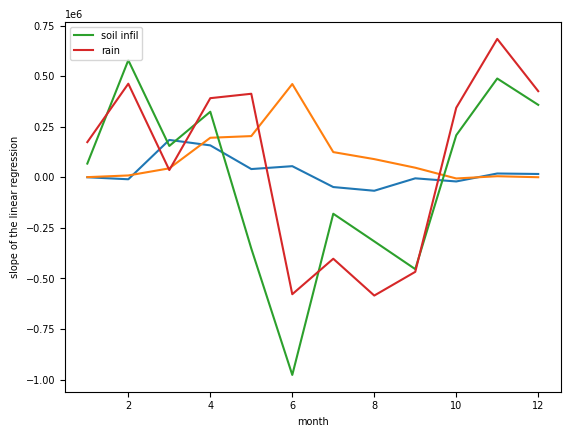

In [118]:
fig = plt.figure()

ax = fig.add_subplot(111)
sreu.slope.plot(ax=ax)
treu.slope.plot(ax=ax)
ireu.slope.plot(ax=ax,label='soil infil')
rreu.slope.plot(ax=ax,label='rain')

#ax2 = ax.twinx()
#(zreu).slope.plot(ax=ax2,c='purple')

plt.legend()

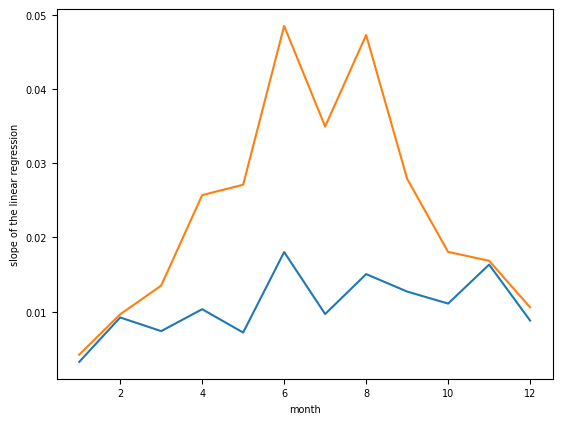

In [119]:
fig = plt.figure()

ax = fig.add_subplot(111)
vpreu.slope.plot()
svpreu.slope.plot()

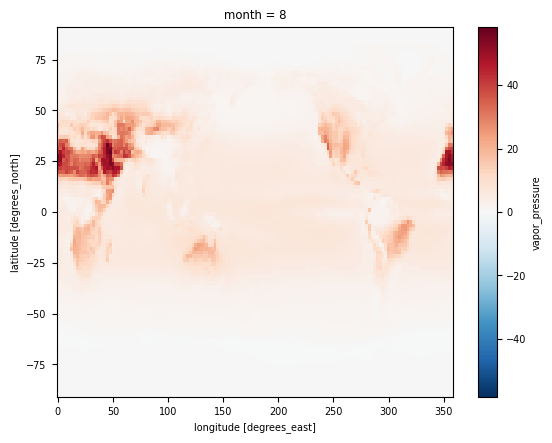

In [120]:
(svp1-vp1).sel(time=slice('1981-01-01','2022-01-01')).groupby('time.month').mean('time').isel(month=7).plot()

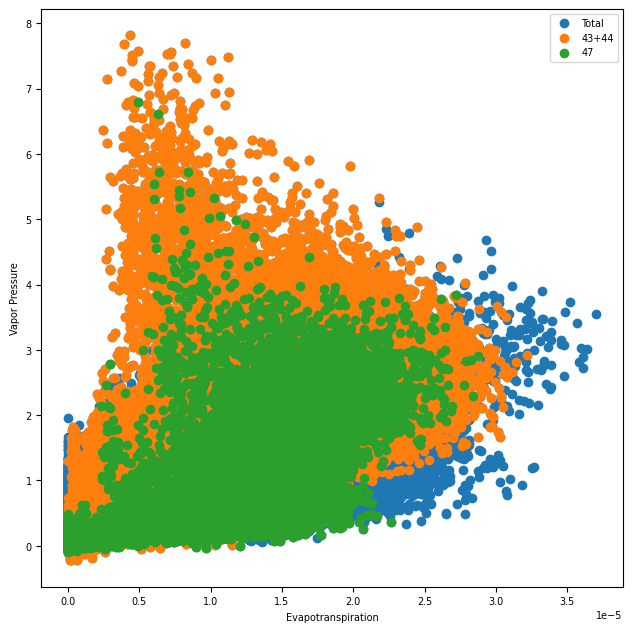

In [121]:
fig = plt.figure(figsize=(7.5,7.5))

ax = fig.add_subplot(111)
ax.set_xlabel('Evapotranspiration')
ax.set_ylabel('Vapor Pressure')

ax.scatter(jja(qvegt['QVEGT']).sel(lat=slice(50,70)),mam(svp1-vp1).sel(lat=slice(50,70)),c='tab:blue',label='Total')

ax.scatter(jja(qvegt['QVEGT']).sel(lat=slice(50,70),lon=slice(0,120)),mam(svp1-vp1).sel(lat=slice(50,70),lon=slice(0,120)),c='tab:orange',label='43+44')

ax.scatter(jja(qvegt['QVEGT']).sel(lat=slice(50,70),lon=slice(240,300)),mam(svp1-vp1).sel(lat=slice(50,70),lon=slice(240,300)),c='tab:green',label='47')

plt.legend()

In [122]:
ds_y = mam(z200).sel(year=slice(1981,2022))

srz = linregress(ds_y,ds_y.year)

In [123]:
ds_y = mam(qrain['RAIN']).sel(year=slice(1981,2022))

srp = linregress(ds_y,ds_y.year)

In [124]:
ds_y = mam(qvegt['QVEGT']).sel(year=slice(1981,2022))

srt = linregress(ds_y,ds_y.year)

In [125]:
ds_y = mam(qsoil['QSOIL']).sel(year=slice(1981,2022))

srs = linregress(ds_y,ds_y.year)

/home/itbaxter/.conda/envs/ianpy37/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1604: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)


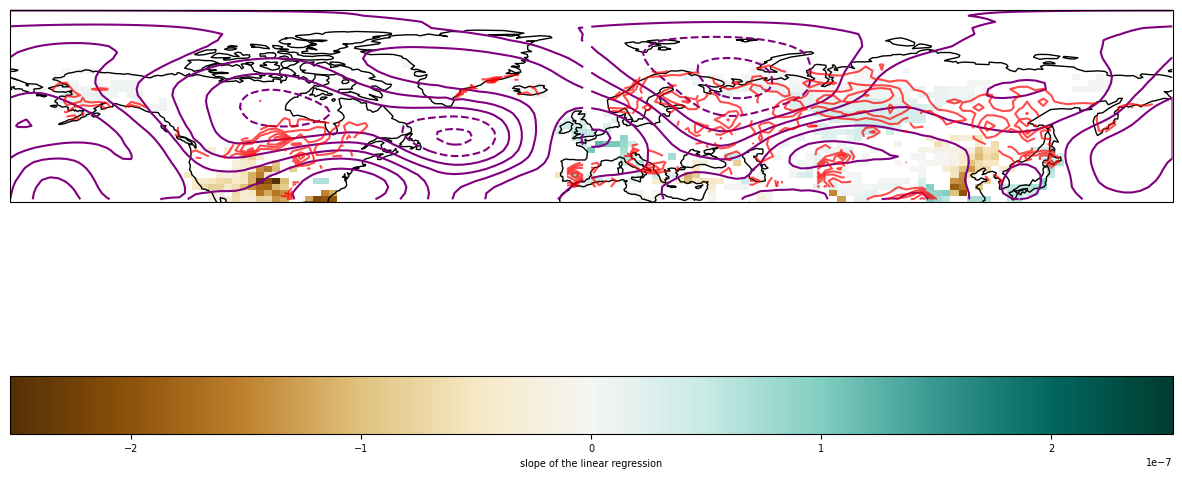

In [126]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111,projection=ccrs.PlateCarree())

p = srt.slope.where(srt.p < 0.05).sel(lat=slice(30,90)).plot(ax=ax,
                                         cmap='BrBG',
                                         transform=ccrs.PlateCarree(),
                                         cbar_kwargs={'orientation':'horizontal'})
p.axes.coastlines()


sliced = srz.sel(lat=slice(30,90))
ax.contour(sliced['lon'],sliced['lat'],sliced.slope,
           colors='purple',
           linewidth=2,
           transform=ccrs.PlateCarree())


sliced = srp.sel(lat=slice(30,90))
ax.contour(sliced['lon'],sliced['lat'],sliced.slope.where(sliced.slope >= 0),
           #cmap='Reds',
           colors='red',
           alpha=0.7,
           transform=ccrs.PlateCarree())



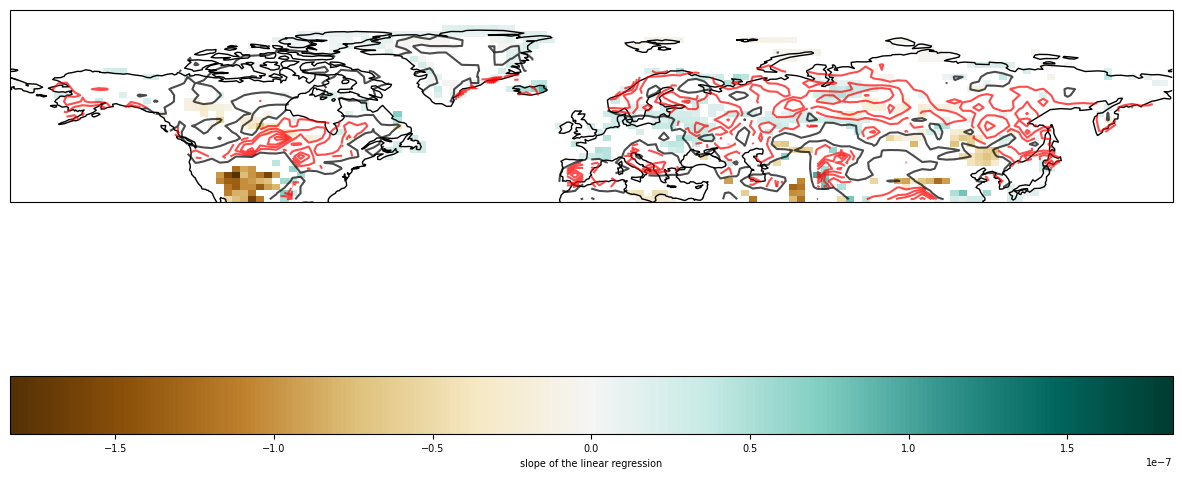

In [127]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111,projection=ccrs.PlateCarree())

p = srs.slope.where(srs.p < 0.05).sel(lat=slice(30,90)).plot(ax=ax,
                                         cmap='BrBG',
                                         transform=ccrs.PlateCarree(),
                                         cbar_kwargs={'orientation':'horizontal'})
p.axes.coastlines()

sliced = srp.sel(lat=slice(30,90))
ax.contour(sliced['lon'],sliced['lat'],sliced.slope.where(sliced.slope > 0),
           #cmap='Reds',
           colors='red',
           alpha=0.7,
           transform=ccrs.PlateCarree())

ax.contour(sliced['lon'],sliced['lat'],sliced.slope,
           #cmap='Reds',
           levels=[0],
           colors='k',
           alpha=0.7,
           transform=ccrs.PlateCarree())

ax.contour(sliced['lon'],sliced['lat'],sliced.slope.where(sliced.slope < 0),
           #cmap='Reds',
           levels=[0],
           colors='blue',
           alpha=0.7,
           transform=ccrs.PlateCarree())

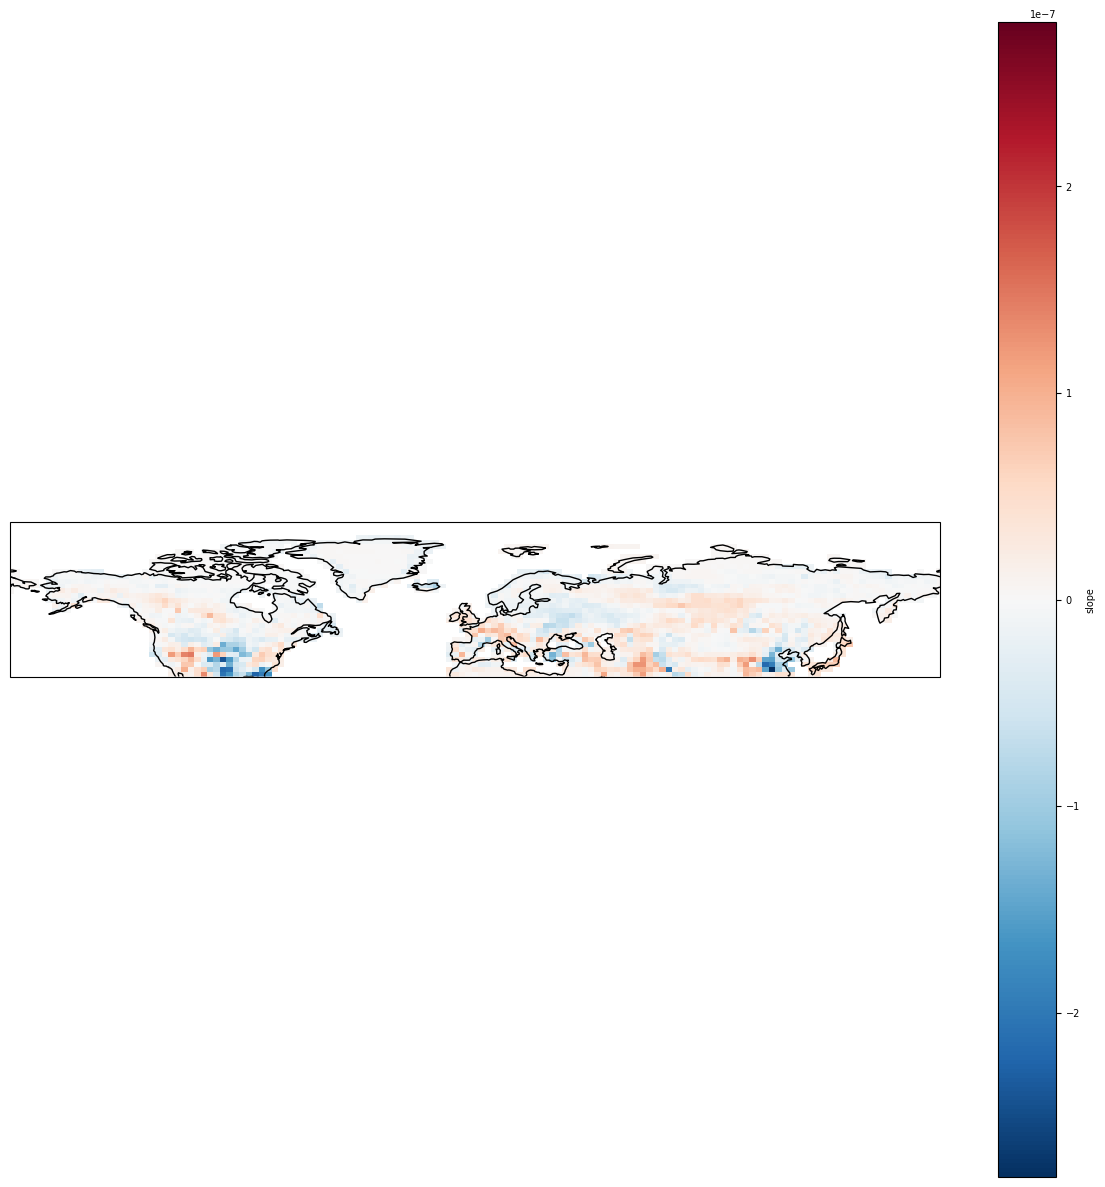

In [128]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111,projection=ccrs.PlateCarree())

p = (srt-srs).slope.sel(lat=slice(30,90)).plot(ax=ax,transform=ccrs.PlateCarree())
p.axes.coastlines()

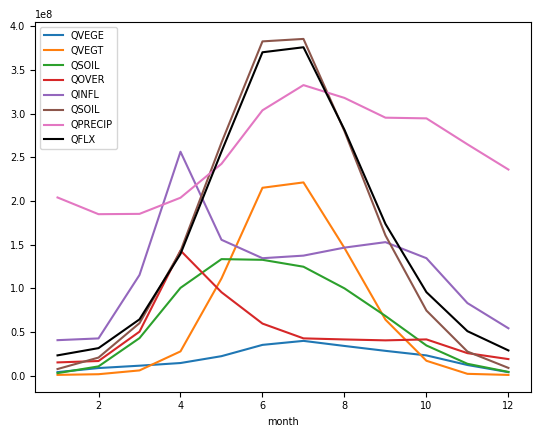

In [129]:
ivege.groupby('time.month').mean('time').plot(label='QVEGE')
ivegt.groupby('time.month').mean('time').plot(label='QVEGT')
iqsoil.groupby('time.month').mean('time').plot(label='QSOIL')
iover.groupby('time.month').mean('time').plot(label='QOVER')
iinfl.groupby('time.month').mean('time').plot(label='QINFL')

(ivege+ivegt+iqsoil).groupby('time.month').mean('time').plot(label='QSOIL')

#iqrain.groupby('time.month').mean('time').plot(label='QRAIN')
#iqsnow.groupby('time.month').mean('time').plot(label='QSNOW')
(iqrain+iqsnow).groupby('time.month').mean('time').plot(label='QPRECIP')

(iqflx).groupby('time.month').mean('time').plot(label='QFLX',c='k')
plt.legend()  
plt.savefig('annual_cycle.eurasia.png',dpi=300)

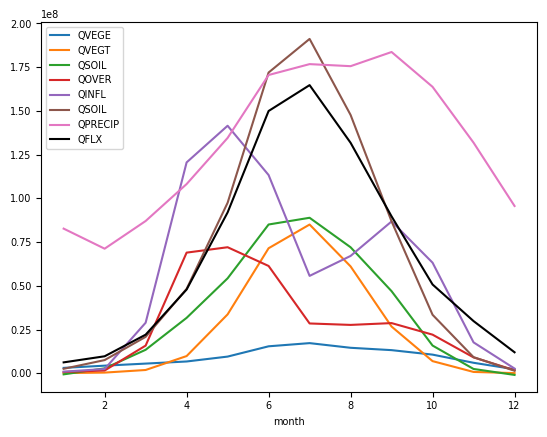

In [130]:
ivegena.groupby('time.month').mean('time').plot(label='QVEGE')
ivegtna.groupby('time.month').mean('time').plot(label='QVEGT')
iqsoilna.groupby('time.month').mean('time').plot(label='QSOIL')
ioverna.groupby('time.month').mean('time').plot(label='QOVER')
iinflna.groupby('time.month').mean('time').plot(label='QINFL')

(ivegena+ivegtna+iqsoilna).groupby('time.month').mean('time').plot(label='QSOIL')

#iqrain.groupby('time.month').mean('time').plot(label='QRAIN')
#iqsnow.groupby('time.month').mean('time').plot(label='QSNOW')
(iqrainna+iqsnowna).groupby('time.month').mean('time').plot(label='QPRECIP')

(iqflxna).groupby('time.month').mean('time').plot(label='QFLX',c='k')
plt.legend()
plt.savefig('annual_cycle.namerica.png',dpi=300)

## Precipitation

In [131]:
def process(i):
    dir = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/daily/'
    files = dir+f'isotope-nudging2.cam.h0.PRECRL_TA{i:02.0f}R.197901-202212.nc'

    q = xr.open_dataset(files)[f'PRECRL_TA{i:02.0f}R']
    #q.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[D]')
    
    dir = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/daily/'
    files = dir+f'isotope-nudging2.cam.h1.PRECSL_TA{i:02.0f}S.197901-202212.nc'
    s = xr.open_dataset(files)[f'PRECSL_TA{i:02.0f}S']
    
    """
    dir = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/daily/'
    files = dir+f'isotope-nudging2.cam.h1.PRECRC_TA{i:02.0f}r.197901-202212.nc'
    #q.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[D]')
    qc = xr.open_dataset(files)[f'PRECRC_TA{i:02.0f}r']
    
    dir = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/daily/'
    files = dir+f'isotope-nudging2.cam.h1.PRECSC_TA{i:02.0f}s.197901-202212.nc'
    s = xr.open_dataset(files)[f'PRECSC_TA{i:02.0f}s']
    """
    
    prec = q + s 
    q.close()
    s.close()
    #qc.close()
    #sc.close()
    
    return prec

def indexer_gw(ds):
    return (ds*weight).sel(lat=slice(50,70),lon=slice(360-120,360-60)).sum(dim=['lat','lon'])

def indexer(ds):
    areacella.coords['lat'] = ds.lat
    return (ds*areacella).sel(lat=slice(50,70),lon=slice(360-120,360-60)).sum(dim=['lat','lon'])/areacella.sel(lat=slice(50,70),lon=slice(360-120,360-60)).sum(dim=['lat','lon'])

precna = [indexer(process(i)) for i in range(1,55)]
precna = xr.concat(precna,dim='region')
precna.coords['region'] = np.arange(1,55,step=1)
#prec.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
precna

<xarray.DataArray (region: 54, time: 16061)>
array([[8.61460503e-09, 1.76840000e-08, 4.16188728e-09, ...,
        1.05748702e-13, 1.94876098e-13, 1.26333324e-13],
       [8.61460503e-09, 1.76840000e-08, 4.16188728e-09, ...,
        1.05523995e-13, 1.94462637e-13, 1.26178636e-13],
       [8.61460503e-09, 1.76840000e-08, 4.16188728e-09, ...,
        1.05901683e-13, 1.94966439e-13, 1.26385339e-13],
       ...,
       [8.61460503e-09, 1.76840000e-08, 4.16188728e-09, ...,
        1.33699952e-12, 1.44903924e-12, 1.92181579e-12],
       [8.61460503e-09, 1.76840089e-08, 4.16191659e-09, ...,
        3.00307782e-12, 3.23851254e-12, 4.18647929e-12],
       [8.61460503e-09, 1.76840000e-08, 4.16197077e-09, ...,
        5.27623735e-12, 4.60603474e-12, 3.31593086e-12]], dtype=float32)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0045-01-01 00:00:00
    plev     float64 2e+04
  * region   (region) int64 1 2 3 4 5 6 7 8 9 10 ... 46 47 48 49 50 51 52 53 54

In [132]:
def indexer(ds):
    areacella.coords['lat'] = ds.lat
    return (ds*areacella).sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat','lon'])/areacella.sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat','lon'])

precea = [indexer(process(i)) for i in range(1,55)]
precea = xr.concat(precea,dim='region')
precea.coords['region'] = np.arange(1,55,step=1)
#prec.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
precea

<xarray.DataArray (region: 54, time: 16061)>
array([[5.2868434e-09, 3.6066325e-08, 1.2301316e-08, ..., 4.3959248e-13,
        4.4913829e-13, 5.1034551e-13],
       [5.2868434e-09, 3.6066325e-08, 1.2301316e-08, ..., 4.3920019e-13,
        4.4889800e-13, 5.1002220e-13],
       [5.2868434e-09, 3.6066325e-08, 1.2301316e-08, ..., 4.4008579e-13,
        4.4954033e-13, 5.1081410e-13],
       ...,
       [5.2868434e-09, 3.6066325e-08, 1.2301316e-08, ..., 1.4494920e-12,
        1.5116563e-12, 1.7159602e-12],
       [5.2868434e-09, 3.6066325e-08, 1.2301316e-08, ..., 8.7414348e-13,
        9.0640136e-13, 1.4489437e-12],
       [5.2868434e-09, 3.6066265e-08, 1.2301883e-08, ..., 7.1218226e-11,
        4.8986398e-11, 1.0008442e-10]], dtype=float32)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0045-01-01 00:00:00
    plev     float64 2e+04
  * region   (region) int64 1 2 3 4 5 6 7 8 9 10 ... 46 47 48 49 50 51 52 53 54

In [133]:
precnam = precna.resample(time='1MS').mean('time')
precnam.coords['time'] = np.arange('1979-01-01','2023-02-01',dtype='datetime64[M]')
precnam = precnam.sel(time=slice('1981-01-01','2022-12-01'))
precnam

<xarray.DataArray (region: 54, time: 504)>
array([[1.5288451e-13, 2.3158312e-13, 3.0881729e-13, ..., 8.6520838e-14,
        2.1251909e-13, 1.9934197e-13],
       [1.5268837e-13, 2.3107704e-13, 3.0858389e-13, ..., 8.6342697e-14,
        2.1247656e-13, 1.9909470e-13],
       [1.5302093e-13, 2.3445766e-13, 3.0945561e-13, ..., 8.7086473e-14,
        2.1284449e-13, 1.9978688e-13],
       ...,
       [1.0089172e-12, 2.5745443e-12, 9.0482363e-13, ..., 1.7322338e-10,
        7.5090850e-11, 2.9005414e-11],
       [3.7138795e-12, 3.1946050e-12, 4.9791837e-12, ..., 2.2817111e-10,
        4.4112457e-11, 1.0454390e-11],
       [2.1193657e-12, 3.3050368e-12, 4.8916886e-12, ..., 1.5150433e-11,
        7.2595111e-12, 1.3380740e-11]], dtype=float32)
Coordinates:
    plev     float64 2e+04
  * region   (region) int64 1 2 3 4 5 6 7 8 9 10 ... 46 47 48 49 50 51 52 53 54
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2022-12-01

In [134]:
preceam = precea.resample(time='1MS').mean('time')
preceam.coords['time'] = np.arange('1979-01-01','2023-02-01',dtype='datetime64[M]')
preceam = preceam.sel(time=slice('1981-01-01','2022-12-01'))
preceam

<xarray.DataArray (region: 54, time: 504)>
array([[7.1680417e-13, 4.3972416e-13, 2.8542549e-13, ..., 9.9946066e-14,
        8.6415948e-14, 4.0763649e-13],
       [7.1608198e-13, 4.3925809e-13, 2.8442681e-13, ..., 9.9770730e-14,
        8.6285241e-14, 4.0696182e-13],
       [7.1721589e-13, 4.4148878e-13, 2.8889307e-13, ..., 1.0009460e-13,
        8.6713372e-14, 4.0802889e-13],
       ...,
       [8.0214497e-13, 7.6010048e-13, 8.6769627e-13, ..., 1.9047030e-11,
        7.7701864e-12, 9.4971739e-12],
       [9.6199535e-13, 9.4220486e-13, 5.5921272e-13, ..., 1.9842093e-11,
        6.5731001e-12, 2.5190136e-12],
       [5.5384735e-11, 4.2826975e-11, 3.4607876e-11, ..., 8.6319868e-11,
        3.4391909e-11, 6.7682950e-11]], dtype=float32)
Coordinates:
    plev     float64 2e+04
  * region   (region) int64 1 2 3 4 5 6 7 8 9 10 ... 46 47 48 49 50 51 52 53 54
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2022-12-01

In [135]:
def month_sum(ds,month2=8):
    return ds.where(ds['time.month'] <= month2).groupby('time.year').mean('time')

def trend(ds,i):
    #ds_y = arc_jja.sel(region=47,year=slice(2,44)) #detrend(arc_jja.sel(year=slice(2,44)),axis=0)
    #ds_x = mon(prec,month=i).sel(year=slice(2,44)) #detrend(mon(prec,month=i).sel(year=slice(2,44)),axis=1)
    #ds_y = detrend(arc_jja.sel(region=47,year=slice(2,44)),axis=0)
    ds_y = (mon(ds,month=i))
    #ds_y.coords['year'] = np.arange(1979,2023,step=1)
    ds_y = ds_y.sel(year=slice(1981,2022))
    ds_x = ds_y.year
    return linregress(ds_y,ds_x,dim='year')

rpreceam = [trend(preceam,i) for i in range(1,13)]
rpreceam = xr.concat(rpreceam,dim='month')
rpreceam.coords['month'] = np.arange(1,13,step=1)

rprecnam = [trend(precnam,i) for i in range(1,13)]
rprecnam = xr.concat(rprecnam,dim='month')
rprecnam.coords['month'] = np.arange(1,13,step=1)

In [136]:
rna = linregress(month_sum(precnam,month2=8),ds_y.year)
rea = linregress(month_sum(preceam,month2=5),ds_y.year)

nr_diff_values = 8.64e+7*100*10*rna.slope.values.reshape(9,6)
er_diff_values = 8.64e+7*100*10*rea.slope.values.reshape(9,6)

In [137]:
nr_diff = 8.64e+7*100*10*rprecnam.slope.sel(month=slice(1,8)).sum('month')
nr_diff_values = nr_diff.values.reshape(9,6)

er_diff = 8.64e+7*100*10*rpreceam.slope.sel(month=slice(1,5)).sum('month')
er_diff_values = er_diff.values.reshape(9,6)

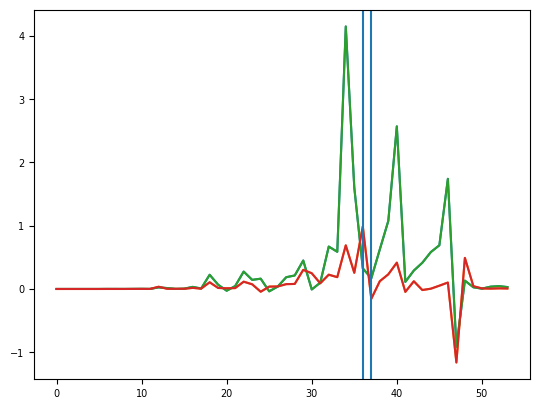

In [138]:
plt.plot(nr_diff_values.reshape(54))
plt.plot(er_diff_values.reshape(54))

plt.plot(nr_diff);
plt.plot(er_diff);
plt.axvline(37)
plt.axvline(36)

In [139]:
def indexer(ds):
    areacella.coords['lat'] = ds.lat
    return (ds*areacella).sel(lat=slice(50,70),lon=slice(360-120,360-60)).sum(dim=['lat','lon']) #/areacella.sel(lat=slice(50,70),lon=slice(360-120,360-60)).sum(dim=['lat','lon'])

svprecna = [indexer(process(i)) for i in range(1,55)]
svprecna = xr.concat(svprecna,dim='region')
svprecna.coords['region'] = np.arange(1,55,step=1)
#prec.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
svprecna

<xarray.DataArray (region: 54, time: 16061)>
array([[6.9654547e+04, 1.4298636e+05, 3.3651500e+04, ..., 8.5504538e-01,
        1.5756969e+00, 1.0214851e+00],
       [6.9654547e+04, 1.4298636e+05, 3.3651500e+04, ..., 8.5322845e-01,
        1.5723538e+00, 1.0202343e+00],
       [6.9654547e+04, 1.4298636e+05, 3.3651500e+04, ..., 8.5628229e-01,
        1.5764273e+00, 1.0219057e+00],
       ...,
       [6.9654547e+04, 1.4298636e+05, 3.3651500e+04, ..., 1.0810490e+01,
        1.1716402e+01, 1.5539101e+01],
       [6.9654547e+04, 1.4298644e+05, 3.3651738e+04, ..., 2.4281790e+01,
        2.6185429e+01, 3.3850342e+01],
       [6.9654547e+04, 1.4298636e+05, 3.3652176e+04, ..., 4.2661728e+01,
        3.7242714e+01, 2.6811405e+01]], dtype=float32)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0045-01-01 00:00:00
    plev     float64 2e+04
  * region   (region) int64 1 2 3 4 5 6 7 8 9 10 ... 46 47 48 49 50 51 52 53 54

In [140]:
def indexer(ds):
    areacella.coords['lat'] = ds.lat
    return (ds*areacella).sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat','lon']) #/areacella.sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat','lon'])

svprecea = [indexer(process(i)) for i in range(1,55)]
svprecea = xr.concat(svprecea,dim='region')
svprecea.coords['region'] = np.arange(1,55,step=1)
#prec.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
svprecea

<xarray.DataArray (region: 54, time: 16061)>
array([[8.3785062e+04, 5.7157344e+05, 1.9494933e+05, ..., 6.9665928e+00,
        7.1178732e+00, 8.0878754e+00],
       [8.3785062e+04, 5.7157344e+05, 1.9494933e+05, ..., 6.9603758e+00,
        7.1140652e+00, 8.0827522e+00],
       [8.3785062e+04, 5.7157344e+05, 1.9494933e+05, ..., 6.9744105e+00,
        7.1242447e+00, 8.0953016e+00],
       ...,
       [8.3785062e+04, 5.7157344e+05, 1.9494933e+05, ..., 2.2971321e+01,
        2.3956491e+01, 2.7194267e+01],
       [8.3785062e+04, 5.7157344e+05, 1.9494933e+05, ..., 1.3853289e+01,
        1.4364507e+01, 2.2962633e+01],
       [8.3785062e+04, 5.7157250e+05, 1.9495831e+05, ..., 1.1286553e+03,
        7.7632874e+02, 1.5861222e+03]], dtype=float32)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0045-01-01 00:00:00
    plev     float64 2e+04
  * region   (region) int64 1 2 3 4 5 6 7 8 9 10 ... 46 47 48 49 50 51 52 53 54

In [141]:
svprecnam = svprecna.resample(time='1MS').mean('time')
svprecnam.coords['time'] = np.arange('1979-01-01','2023-02-01',dtype='datetime64[M]')
svprecnam = svprecnam.sel(time=slice('1981-01-01','2022-12-01'))
svprecnam

<xarray.DataArray (region: 54, time: 504)>
array([[1.2361683e+00, 1.8724965e+00, 2.4969840e+00, ..., 6.9957590e-01,
        1.7183518e+00, 1.6118063e+00],
       [1.2345823e+00, 1.8684047e+00, 2.4950967e+00, ..., 6.9813550e-01,
        1.7180079e+00, 1.6098070e+00],
       [1.2372713e+00, 1.8957390e+00, 2.5021446e+00, ..., 7.0414937e-01,
        1.7209823e+00, 1.6154037e+00],
       ...,
       [8.1577358e+00, 2.0816824e+01, 7.3160734e+00, ..., 1.4006208e+03,
        6.0715710e+02, 2.3452719e+02],
       [3.0029068e+01, 2.5830408e+01, 4.0259857e+01, ..., 1.8449084e+03,
        3.5667725e+02, 8.4530380e+01],
       [1.7136415e+01, 2.6723324e+01, 3.9552410e+01, ..., 1.2250086e+02,
        5.8697758e+01, 1.0819179e+02]], dtype=float32)
Coordinates:
    plev     float64 2e+04
  * region   (region) int64 1 2 3 4 5 6 7 8 9 10 ... 46 47 48 49 50 51 52 53 54
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2022-12-01

In [142]:
svpreceam = svprecea.resample(time='1MS').mean('time')
svpreceam.coords['time'] = np.arange('1979-01-01','2023-02-01',dtype='datetime64[M]')
svpreceam = svpreceam.sel(time=slice('1981-01-01','2022-12-01'))
svpreceam

<xarray.DataArray (region: 54, time: 504)>
array([[1.13598013e+01, 6.96867990e+00, 4.52337837e+00, ...,
        1.58392942e+00, 1.36950648e+00, 6.46015930e+00],
       [1.13483562e+01, 6.96129370e+00, 4.50755167e+00, ...,
        1.58115113e+00, 1.36743486e+00, 6.44946623e+00],
       [1.13663263e+01, 6.99664450e+00, 4.57833242e+00, ...,
        1.58628368e+00, 1.37422001e+00, 6.46637630e+00],
       ...,
       [1.27122679e+01, 1.20459538e+01, 1.37511148e+01, ...,
        3.01854370e+02, 1.23140694e+02, 1.50509720e+02],
       [1.52455530e+01, 1.49319134e+01, 8.86231613e+00, ...,
        3.14454437e+02, 1.04169464e+02, 3.99209366e+01],
       [8.77728699e+02, 6.78715210e+02, 5.48460205e+02, ...,
        1.36798376e+03, 5.45037659e+02, 1.07262878e+03]], dtype=float32)
Coordinates:
    plev     float64 2e+04
  * region   (region) int64 1 2 3 4 5 6 7 8 9 10 ... 46 47 48 49 50 51 52 53 54
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2022-12-01

In [143]:
svrpreceam = [trend(svpreceam,i) for i in range(1,13)]
svrpreceam = xr.concat(svrpreceam,dim='month')
svrpreceam.coords['month'] = np.arange(1,13,step=1)

svrprecnam = [trend(svprecnam,i) for i in range(1,13)]
svrprecnam = xr.concat(svrprecnam,dim='month')
svrprecnam.coords['month'] = np.arange(1,13,step=1)

In [144]:
svnr_diff = 10*svrprecnam.slope.sel(month=slice(1,8)).mean('month')
svnr_diff_values = svnr_diff.values.reshape(9,6)

sver_diff = 10*svrpreceam.slope.sel(month=slice(1,5)).mean('month')
sver_diff_values = sver_diff.values.reshape(9,6)

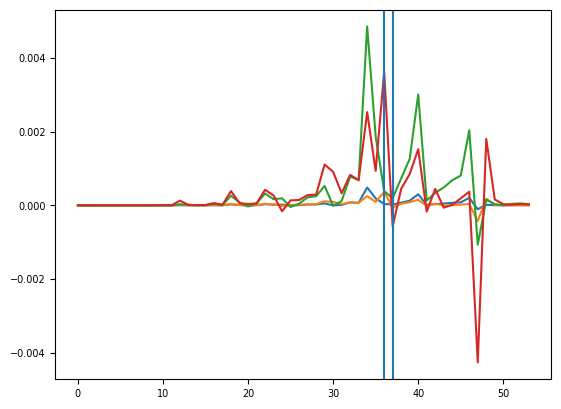

In [145]:
plt.plot(svnr_diff_values.reshape(54)/1.0E06)
plt.plot(sver_diff_values.reshape(54)/1.0E06)

plt.plot(svnr_diff/1.0E06*10);
plt.plot(sver_diff/1.0E06*10);
plt.axvline(37)
plt.axvline(36)

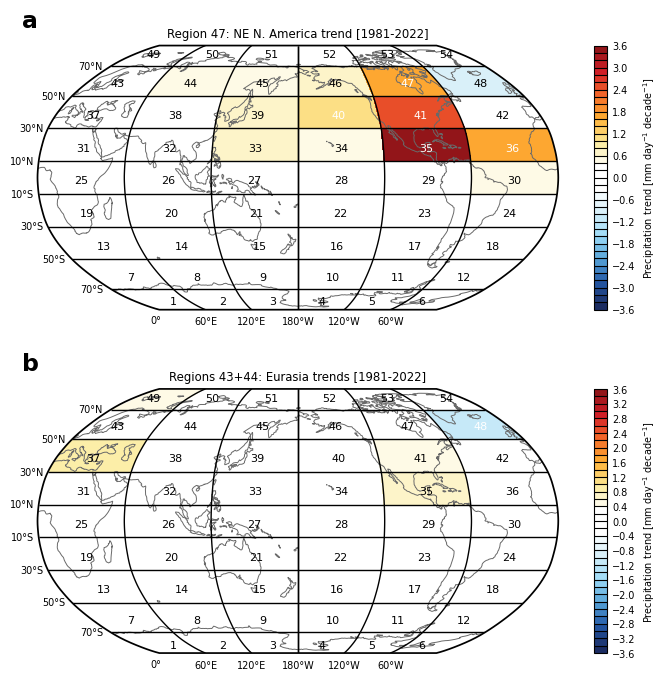

In [146]:
# Create a custom RdYlBu colormap with white in the middle
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = 7
mpl.rcParams['hatch.color'] = 'silver'

fig = plt.figure(figsize=(7.5,7.5))
# Panel 1--------------------------------------------------
ax = fig.add_subplot(211,projection=ccrs.Robinson(central_longitude=180))
#ax = fig.add_axes([0,0.35,0.5,0.35],ccrs.NorthPolarStereo())
#ax.set_extent([-180,180,-90,90],ccrs.PlateCarree())
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')
ax.set_title('Region 47: NE N. America trend [1981-2022]')

#ax.text(-0.4, 0.25, 'iCESM1', weight='bold',
#        fontsize=17,
#        rotation=0,
#        horizontalalignment='left',
#         verticalalignment='bottom', transform=ax.transAxes)

ax.text(-0.03, 1.05, 'a', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)


num_rows = 9
num_cols = 6

# Generate evenly spaced squares in a grid
cnt = 1
for i in range(num_rows):
    for j in range(num_cols):
        lon1 = 0 + j * (360 / num_cols)
        lat1 = -90 + i * (180 / num_rows)
        lon2 = lon1 + (360 / num_cols)
        lat2 = lat1 + (180 / num_rows)

        square = {'name': f'{cnt}', 'coords': (lon1, lat1, lon2, lat2)}

        # Plot the squares
        rectangle = Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, edgecolor='None', facecolor='none')
        ax.add_patch(rectangle)
        if abs(nr_diff_values[i,j]) >= 1:
            ax.text(lon1+25, lat2-15, square['name'], color='white', fontsize=8, va='bottom', ha='left', transform=ccrs.PlateCarree())
        else:
            ax.text(lon1+25, lat2-15, square['name'], color='black', fontsize=8, va='bottom', ha='left', transform=ccrs.PlateCarree())
        cnt += 1

# Create a grid of values corresponding to the squares
x = np.linspace(0, 360, num_cols + 1)
y = np.linspace(-90, 90, num_rows + 1)
X, Y = np.meshgrid(x, y)
Z = np.random.rand(num_rows, num_cols)  # Replace this with your actual data

# Plot the pcolormesh grid with the specified colormap and normalization
#norm = BoundaryNorm(boundaries, new_cmap.N, clip=True)

cmap = colormaps.BlueWhiteOrangeRed
levels = np.arange(-3.6,3.61,step=0.2)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

#new_cmap = LinearSegmentedColormap('RdYlBu_r', cmap['levels'])
#contour = ax.pcolormesh(X, Y, 1000*r_diff_values, cmap=new_cmap, shading='auto', 
#                        transform=ccrs.PlateCarree(), alpha=1.0,norm=norm)
p = ax.pcolormesh(X, Y, nr_diff_values, 
                        cmap=cmap,
                        #shading='auto', 
                        alpha=1.0, 
                        norm=norm,
                        transform=ccrs.PlateCarree(),
                       )
# Colorbar

#cax = fig.add_axes([0.1,0.05,0.35,0.01])
cb = plt.colorbar(p,orientation='vertical', 
                  drawedges=True,
                  ticks=levels[::3]
                 )

#cb.set_ticklabels(f'{levels:0.02f}') #[::3])
cb.set_label(r'Precipitation trend [mm $\mathrm{day^{-1}\ decade^{-1}}$]')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)
cb.ax.minorticks_off()

#cax2 = cax.twinx()

#cax2.set_ylim(0.1,1)
#cax2.set_yticks(iticks)
#cax2.set_yticklabels(1./iticks)
#cax2.set_ylabel(r'Contribution to Arctic WV trend [g $\mathrm{kg^{-1}\ decade^{-1}}$]')

ax.spines['geo'].set_linewidth(1.25)

# Colorbar
colorbar_position = cb.ax.get_position()

ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1.0,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='k', 
                  linestyle='-', alpha=1.0)
gl.top_labels = False  # Turn off top labels
gl.left_labels = True  # Turn off left labels
gl.right_labels = False  # Turn off left labels
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -70, -50, -30, -10, 10, 30, 50, 70, 90])

# Panel 2--------------------------------------------------
ax = fig.add_subplot(212,projection=ccrs.Robinson(central_longitude=180))
#ax = fig.add_axes([0,0.35,0.5,0.35],ccrs.NorthPolarStereo())
#ax.set_extent([-180,180,-90,90],ccrs.PlateCarree())
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')
ax.set_title('Regions 43+44: Eurasia trends [1981-2022]')

#ax.text(-0.4, 0.25, 'iCESM1', weight='bold',
#        fontsize=17,
#        rotation=0,
#        horizontalalignment='left',
#         verticalalignment='bottom', transform=ax.transAxes)

ax.text(-0.03, 1.05, 'b', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

num_rows = 9
num_cols = 6

# Generate evenly spaced squares in a grid
cnt = 1
for i in range(num_rows):
    for j in range(num_cols):
        lon1 = 0 + j * (360 / num_cols)
        lat1 = -90 + i * (180 / num_rows)
        lon2 = lon1 + (360 / num_cols)
        lat2 = lat1 + (180 / num_rows)

        square = {'name': f'{cnt}', 'coords': (lon1, lat1, lon2, lat2)}

        # Plot the squares
        rectangle = Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, edgecolor='None', facecolor='none')
        ax.add_patch(rectangle)
        if abs(er_diff_values[i,j]) >= 1:
            ax.text(lon1+25, lat2-15, square['name'], color='white', fontsize=8, va='bottom', ha='left', transform=ccrs.PlateCarree())
        else:
            ax.text(lon1+25, lat2-15, square['name'], color='black', fontsize=8, va='bottom', ha='left', transform=ccrs.PlateCarree())
        cnt += 1

# Create a grid of values corresponding to the squares
x = np.linspace(0, 360, num_cols + 1)
y = np.linspace(-90, 90, num_rows + 1)
X, Y = np.meshgrid(x, y)
Z = np.random.rand(num_rows, num_cols)  # Replace this with your actual data

# Plot the pcolormesh grid with the specified colormap and normalization
#norm = BoundaryNorm(boundaries, new_cmap.N, clip=True)

#cmap = colormaps.BlueWhiteOrangeRed
#levels = np.arange(-0.6,0.61,step=0.05)
#norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

#new_cmap = LinearSegmentedColormap('RdYlBu_r', cmap['levels'])
#contour = ax.pcolormesh(X, Y, 1000*r_diff_values, cmap=new_cmap, shading='auto', 
#                        transform=ccrs.PlateCarree(), alpha=1.0,norm=norm)
p = ax.pcolormesh(X, Y, er_diff_values, 
                        cmap=cmap,
                        #shading='auto', 
                        alpha=1.0, 
                        norm=norm,
                        transform=ccrs.PlateCarree(),
                       )
# Colorbar

#cax = fig.add_axes([0.1,0.05,0.35,0.01])
cb = plt.colorbar(p,orientation='vertical', 
                  drawedges=True,
                  ticks=levels[::2]
                 )

#cb.set_ticklabels(f'{levels:0.02f}') #[::3])
cb.set_label(r'Precipitation trend [mm $\mathrm{day^{-1}\ decade^{-1}}$]')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)
cb.ax.minorticks_off()

#cax2 = cax.twinx()

#cax2.set_ylim(0.1,1)
#cax2.set_yticks(iticks)
#cax2.set_yticklabels(1./iticks)
#cax2.set_ylabel(r'Contribution to Arctic WV trend [g $\mathrm{kg^{-1}\ decade^{-1}}$]')

ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1.0,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='k', 
                  linestyle='-', alpha=1.0)
gl.top_labels = False  # Turn off top labels
gl.left_labels = True  # Turn off left labels
gl.right_labels = False  # Turn off left labels
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -70, -50, -30, -10, 10, 30, 50, 70, 90])

fig.subplots_adjust(top=0.92,bottom=0.11,left=0.03,right=0.98,hspace=0.3,wspace=0.1)

## Plot

fig = plt.figure(figsize=(7.5,6))

# Panel 1--------------------------------------------------
ax = fig.add_subplot(221,projection=ccrs.Robinson(central_longitude=180))
#ax = fig.add_axes([0,0.35,0.5,0.35],ccrs.NorthPolarStereo())
#ax.set_extent([-180,180,-90,90],ccrs.PlateCarree())
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')
ax.set_title('Sources of NE N. America moisture [1981-2022]',fontsize=7)

#ax.text(-0.4, 0.25, 'iCESM1', weight='bold',
#        fontsize=17,
#        rotation=0,
#        horizontalalignment='left',
#         verticalalignment='bottom', transform=ax.transAxes)

ax.text(-0.03, 1.12, 'a', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)


num_rows = 9
num_cols = 6

# Generate evenly spaced squares in a grid
cnt = 1
for i in range(num_rows):
    for j in range(num_cols):
        lon1 = 0 + j * (360 / num_cols)
        lat1 = -90 + i * (180 / num_rows)
        lon2 = lon1 + (360 / num_cols)
        lat2 = lat1 + (180 / num_rows)

        square = {'name': f'{cnt}', 'coords': (lon1, lat1, lon2, lat2)}

        # Plot the squares
        rectangle = Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, edgecolor='None', facecolor='none')
        ax.add_patch(rectangle)
        if abs(nr_diff_values[i,j]) >= 1:
            if cnt >= 49:
                ax.text(lon1+25, lat2-20, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
            else:
                ax.text(lon1+25, lat2-15, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        else:
            ax.text(lon1+25, lat2-15, square['name'], color='black', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        cnt += 1

# Create a grid of values corresponding to the squares
x = np.linspace(0, 360, num_cols + 1)
y = np.linspace(-90, 90, num_rows + 1)
X, Y = np.meshgrid(x, y)
Z = np.random.rand(num_rows, num_cols)  # Replace this with your actual data

# Plot the pcolormesh grid with the specified colormap and normalization
#norm = BoundaryNorm(boundaries, new_cmap.N, clip=True)

cmap = colormaps.BlueWhiteOrangeRed
levels = np.arange(-3.6,3.61,step=0.2)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

#new_cmap = LinearSegmentedColormap('RdYlBu_r', cmap['levels'])
#contour = ax.pcolormesh(X, Y, 1000*r_diff_values, cmap=new_cmap, shading='auto', 
#                        transform=ccrs.PlateCarree(), alpha=1.0,norm=norm)
p = ax.pcolormesh(X, Y, nr_diff_values, 
                        cmap=cmap,
                        #shading='auto', 
                        alpha=1.0, 
                        norm=norm,
                        transform=ccrs.PlateCarree(),
                       )
# Colorbar

#cax = fig.add_axes([0.1,0.05,0.35,0.01])
cb = plt.colorbar(p,orientation='horizontal', 
                  drawedges=True,
                  ticks=levels[::3]
                 )

#cb.set_ticklabels(f'{levels:0.02f}') #[::3])
cb.set_label(r'Winter-Summer precipitation trend [mm $\mathrm{day^{-1}\ decade^{-1}}$]')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)
cb.ax.minorticks_off()

#cax2 = cax.twinx()

#cax2.set_ylim(0.1,1)
#cax2.set_yticks(iticks)
#cax2.set_yticklabels(1./iticks)
#cax2.set_ylabel(r'Contribution to Arctic WV trend [g $\mathrm{kg^{-1}\ decade^{-1}}$]')

ax.spines['geo'].set_linewidth(1.25)

# Colorbar
colorbar_position = cb.ax.get_position()

ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1.0,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='k', 
                  linestyle='-', alpha=1.0)
gl.top_labels = False  # Turn off top labels
gl.left_labels = True  # Turn off left labels
gl.right_labels = False  # Turn off left labels
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -70, -50, -30, -10, 10, 30, 50, 70, 90])

ax.add_patch(mpatches.Rectangle(xy=[-120, 50], width=60, height=20,
                                    facecolor='none',
                                    edgecolor='#1CDADE',
                                    #linestyle='--',
                                    linewidth=1.5,
                                    zorder=103,
                                    alpha=0.85,
                                    transform=ccrs.PlateCarree())
                 )

# Panel 2--------------------------------------------------
ax = fig.add_subplot(223,projection=ccrs.Robinson(central_longitude=180))
#ax = fig.add_axes([0,0.35,0.5,0.35],ccrs.NorthPolarStereo())
#ax.set_extent([-180,180,-90,90],ccrs.PlateCarree())
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')
ax.set_title('Sources of Eurasian moisture [1981-2022]',fontsize=7)

#ax.text(-0.4, 0.25, 'iCESM1', weight='bold',
#        fontsize=17,
#        rotation=0,
#        horizontalalignment='left',
#         verticalalignment='bottom', transform=ax.transAxes)

ax.text(-0.03, 1.12, 'c', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

num_rows = 9
num_cols = 6

# Generate evenly spaced squares in a grid
cnt = 1
for i in range(num_rows):
    for j in range(num_cols):
        lon1 = 0 + j * (360 / num_cols)
        lat1 = -90 + i * (180 / num_rows)
        lon2 = lon1 + (360 / num_cols)
        lat2 = lat1 + (180 / num_rows)

        square = {'name': f'{cnt}', 'coords': (lon1, lat1, lon2, lat2)}

        # Plot the squares
        rectangle = Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, edgecolor='None', facecolor='none')
        ax.add_patch(rectangle)
        if abs(er_diff_values[i,j]) >= 1:
            if cnt >= 49:
                print(cnt)
                ax.text(lon1+25, lat2-30, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
            else:
                ax.text(lon1+25, lat2-15, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        else:
            ax.text(lon1+25, lat2-15, square['name'], color='black', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        cnt += 1

# Create a grid of values corresponding to the squares
x = np.linspace(0, 360, num_cols + 1)
y = np.linspace(-90, 90, num_rows + 1)
X, Y = np.meshgrid(x, y)
Z = np.random.rand(num_rows, num_cols)  # Replace this with your actual data

# Plot the pcolormesh grid with the specified colormap and normalization
#norm = BoundaryNorm(boundaries, new_cmap.N, clip=True)

#cmap = colormaps.BlueWhiteOrangeRed
#levels = np.arange(-0.6,0.61,step=0.05)
#norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

#new_cmap = LinearSegmentedColormap('RdYlBu_r', cmap['levels'])
#contour = ax.pcolormesh(X, Y, 1000*r_diff_values, cmap=new_cmap, shading='auto', 
#                        transform=ccrs.PlateCarree(), alpha=1.0,norm=norm)
cmap = colormaps.BlueWhiteOrangeRed
levels = np.arange(-1.5,1.51,step=0.1)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

p = ax.pcolormesh(X, Y, er_diff_values, 
                        cmap=cmap,
                        #shading='auto', 
                        alpha=1.0, 
                        norm=norm,
                        transform=ccrs.PlateCarree(),
                       )
# Colorbar

#cax = fig.add_axes([0.1,0.05,0.35,0.01])
cb = plt.colorbar(p,orientation='horizontal', 
                  drawedges=True,
                  ticks=levels[::3]
                 )

#cb.set_ticklabels(f'{levels:0.02f}') #[::3])
cb.set_label(r'Winter-Spring precipitation trend [mm $\mathrm{day^{-1}\ decade^{-1}}$]')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)
cb.ax.minorticks_off()

#cax2 = cax.twinx()

#cax2.set_ylim(0.1,1)
#cax2.set_yticks(iticks)
#cax2.set_yticklabels(1./iticks)
#cax2.set_ylabel(r'Contribution to Arctic WV trend [g $\mathrm{kg^{-1}\ decade^{-1}}$]')

ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1.0,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='k', 
                  linestyle='-', alpha=1.0)
gl.top_labels = False  # Turn off top labels
gl.left_labels = True  # Turn off left labels
gl.right_labels = False  # Turn off left labels
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -70, -50, -30, -10, 10, 30, 50, 70, 90])

ax.add_patch(mpatches.Rectangle(xy=[0, 50], width=120, height=20,
                                    facecolor='none',
                                    edgecolor='#1CDADE',
                                    linestyle='-',
                                    linewidth=1.5,
                                    zorder=103,
                                    alpha=0.85,
                                    transform=ccrs.PlateCarree())
                 )

# Panel 1--------------------------------------------------
# Create a custom RdYlBu colormap with white in the middle
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = 7
mpl.rcParams['hatch.color'] = 'silver'

bar_width=0.8

## Panel 1 --------------------------------------------------
ax = fig.add_subplot(224)
ax.set_xlim([0,14])
#ax.set_ylim([-300,300])
ax.set_ylabel(r'Surface water flux trend [Pg $\mathrm{decade^{-1}}$]')
#ax.set_xlabel('year')
ax.set_title('Regions 43+44: Eurasia')
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.25)
ax.spines[['right', 'top']].set_visible(False)
#ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.set_xticks(np.arange(1,15,step=2))

params = {'mathtext.default': 'regular' }  # Allows tex-style title & labels
plt.rcParams.update(params)


ax.set_xticklabels([r'$PREC$',
                    r'$SOIL_{INFL}$',
                    r'$E_{TOT}$',
                    r'$E_{SOIL}$',
                    r'$E_{VEGT}$',
                    r'$E_{VEGE}$',
                    'VPD'])
    
ax.text(-0.16, 1.05, 'd', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.bar(np.arange(1,13,step=2)-0.4,
       [(rqrain+rqsnow).slope*10000,
        (rinfl).slope*10000,
        ((rqsoil+rvegt+rvege).slope)*10000,
        rqsoil.slope*10000,
        rvegt.slope*10000,
        rvege.slope*10000,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rperma.sum('levgrnd').slope/1.0E15*10000,
       ],
       label='Spring',
        color='#1E88E5', ##1E88E5
       
      )

ax.bar(np.arange(1,13,step=2)+0.4,
       [(rqrains+rqsnows).slope*10000,
        (rinfls).slope/1.0E15*10000,
        ((rqsoils+rvegts+rveges).slope)*10000,
        rqsoils.slope*10000,
        rvegts.slope*10000,
        rveges.slope*10000,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermas.sum('levgrnd').slope/1.0E15*10000,
       ],
       label='Summer',
        color='#D81B60', ##1E88E5
       
      )

ax2 = ax.twinx()
ax2.set_ylim([-0.35,0.35])
ax2.set_ylabel(r'VPD trend [hPa $\mathrm{decade^{-1}}$]')
ax2.yaxis.set_minor_locator(MultipleLocator(0.02))
#ax2.set_ylim()
for axis in ['bottom','right']:
    ax2.spines[axis].set_linewidth(1.25)
ax2.spines[['left', 'top']].set_visible(False)

ax2.bar([12.6],(irsvpm-irvpm)*10,
       color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Spring',
      )

ax2.bar([13.4],(irsvp-irvp)*10,
       color='#D81B60', ##1E88E5,
        width=bar_width,
        label='Spring',
      )

ax.text(0.38, 0.7, 'Total Evaporation:',
        fontsize=8,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.text(0.32, 0.6, r'$E_{TOT}\ =\ E_{SOIL}\ +\ E_{VEGT}\ +\ E_{VEGE}$',
        fontsize=7,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

#plt.legend(frameon=False,loc='best')

ax2.axvline(4,linestyle='--',c='k',linewidth=0.6)
ax2.axvline(12,linestyle='--',c='k',linewidth=0.6)
ax2.axhline(0,linestyle='-',c='k',linewidth=0.8)

#===========================================================
## North America
#===========================================================

## Panel 1 --------------------------------------------------
ax = fig.add_subplot(222)
ax.set_xlim([0,14])
#ax.set_ylim([-300,300])
#ax.set_ylabel('Summer')
ax.set_ylabel(r'Surface water flux trend [Pg $\mathrm{decade^{-1}}$]')
#ax.set_xlabel('year')
ax.set_title('Region 47: N. America')
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.25)
ax.spines[['right', 'top']].set_visible(False)
#ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.set_xticks(np.arange(1,15,step=2))
ax.set_xticklabels([r'$PREC$',
                    r'$SOIL_{INFL}$',
                    r'$E_{TOT}$',
                    r'$E_{SOIL}$',
                    r'$E_{VEGT}$',
                    r'$E_{VEGE}$',
                    'VPD'])
    
ax.text(-0.16, 1.05, 'b', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.bar(np.arange(1,13,step=2)-0.4,
       [(rqrainna+rqsnowna).slope*10000,
        (rinflna).slope*10000,
        ((rqsoilna+rvegtna+rvegena).slope)*10000,
        rqsoilna.slope*10000,
        rvegtna.slope*10000,
        rvegena.slope*10000,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermana.sum('levgrnd').slope/1.0E15*10000,
       ],
        color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Spring',
       
      )

ax.bar(np.arange(1,13,step=2)+0.4,
       [(rqrainnas+rqsnownas).slope*10000,
        (rinflnas).slope/1.0E15*10000,
        ((rqsoilnas+rvegtnas+rvegenas).slope)*10000,
        rqsoilnas.slope*10000,
        rvegtnas.slope*10000,
        rvegenas.slope*10000,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermanas.sum('levgrnd').slope/1.0E15*10000,
       ],
        color='#D81B60', ##1E88E5
        width=bar_width,
       label='Summer'
       
      )

ax2 = ax.twinx()
ax2.set_ylim([-0.35,0.35])
ax2.set_ylabel(r'VPD trend [hPa $\mathrm{decade^{-1}}$]')
ax2.yaxis.set_minor_locator(MultipleLocator(0.02))
#ax2.set_ylim()
for axis in ['bottom','right']:
    ax2.spines[axis].set_linewidth(1.25)
ax2.spines[['left', 'top']].set_visible(False)

ax2.bar([12.6],(irsvpnam-irvpnam)*10,
       color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Winter-Spring',
      )

ax2.bar([13.4],(irsvpna-irvpna)*10,
       color='#D81B60', ##1E88E5,
        width=bar_width,
        label='Summer',
      )

ax.text(0.38, 0.7, 'Total Evaporation:',
        fontsize=8,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.text(0.32, 0.6, r'$E_{TOT}\ =\ E_{SOIL}\ +\ E_{VEGT}\ +\ E_{VEGE}$',
        fontsize=7,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

plt.legend(frameon=True,loc='lower left',edgecolor='white',framealpha=1.0)

ax.axvline(4,linestyle='--',c='k',linewidth=0.6)
ax.axvline(12,linestyle='--',c='k',linewidth=0.6)
#ax.axvline(0,linestyle='--',c='k',linewidth=0.8)
ax.axhline(0,linestyle='-',c='k',linewidth=0.8)

fig.subplots_adjust(top=0.92,bottom=0.04,left=0.05,right=0.93,hspace=0.3,wspace=0.25)
#fig.savefig('./plots/moisture_tagging-figure_2-supp-evap_fluxes-mean.png',dpi=600)

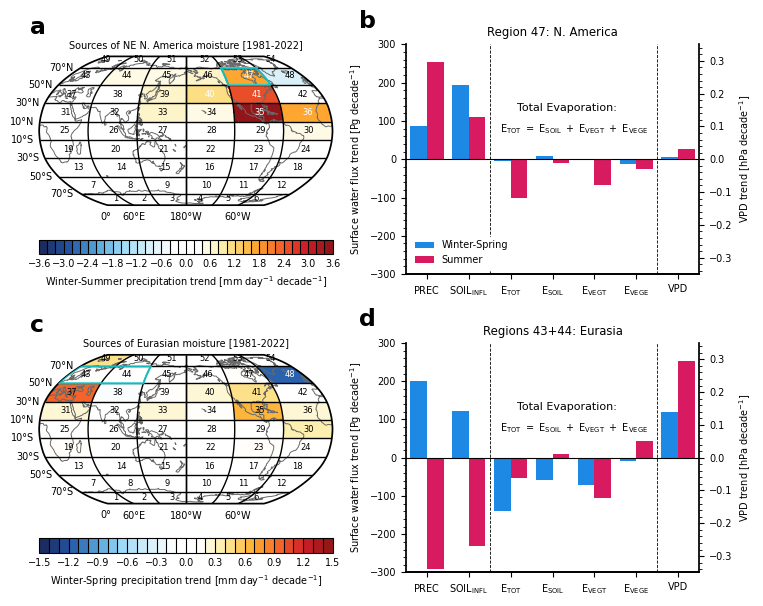

In [147]:
fig = plt.figure(figsize=(7.5,6))

# Panel 1--------------------------------------------------
ax = fig.add_subplot(221,projection=ccrs.Robinson(central_longitude=180))
#ax = fig.add_axes([0,0.35,0.5,0.35],ccrs.NorthPolarStereo())
#ax.set_extent([-180,180,-90,90],ccrs.PlateCarree())
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')
ax.set_title('Sources of NE N. America moisture [1981-2022]',fontsize=7)

#ax.text(-0.4, 0.25, 'iCESM1', weight='bold',
#        fontsize=17,
#        rotation=0,
#        horizontalalignment='left',
#         verticalalignment='bottom', transform=ax.transAxes)

ax.text(-0.03, 1.12, 'a', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)


num_rows = 9
num_cols = 6

# Generate evenly spaced squares in a grid
cnt = 1
for i in range(num_rows):
    for j in range(num_cols):
        lon1 = 0 + j * (360 / num_cols)
        lat1 = -90 + i * (180 / num_rows)
        lon2 = lon1 + (360 / num_cols)
        lat2 = lat1 + (180 / num_rows)

        square = {'name': f'{cnt}', 'coords': (lon1, lat1, lon2, lat2)}

        # Plot the squares
        rectangle = Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, edgecolor='None', facecolor='none')
        ax.add_patch(rectangle)
        if abs(nr_diff_values[i,j]) >= 1:
            if cnt >= 49:
                ax.text(lon1+25, lat2-20, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
            else:
                ax.text(lon1+25, lat2-15, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        else:
            ax.text(lon1+25, lat2-15, square['name'], color='black', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        cnt += 1

# Create a grid of values corresponding to the squares
x = np.linspace(0, 360, num_cols + 1)
y = np.linspace(-90, 90, num_rows + 1)
X, Y = np.meshgrid(x, y)
Z = np.random.rand(num_rows, num_cols)  # Replace this with your actual data

# Plot the pcolormesh grid with the specified colormap and normalization
#norm = BoundaryNorm(boundaries, new_cmap.N, clip=True)

cmap = colormaps.BlueWhiteOrangeRed
levels = np.arange(-3.6,3.61,step=0.2)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

#new_cmap = LinearSegmentedColormap('RdYlBu_r', cmap['levels'])
#contour = ax.pcolormesh(X, Y, 1000*r_diff_values, cmap=new_cmap, shading='auto', 
#                        transform=ccrs.PlateCarree(), alpha=1.0,norm=norm)
p = ax.pcolormesh(X, Y, nr_diff_values, 
                        cmap=cmap,
                        #shading='auto', 
                        alpha=1.0, 
                        norm=norm,
                        transform=ccrs.PlateCarree(),
                       )
# Colorbar

#cax = fig.add_axes([0.1,0.05,0.35,0.01])
cb = plt.colorbar(p,orientation='horizontal', 
                  drawedges=True,
                  ticks=levels[::3]
                 )

#cb.set_ticklabels(f'{levels:0.02f}') #[::3])
cb.set_label(r'Winter-Summer precipitation trend [mm $\mathrm{day^{-1}\ decade^{-1}}$]')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)
cb.ax.minorticks_off()

#cax2 = cax.twinx()

#cax2.set_ylim(0.1,1)
#cax2.set_yticks(iticks)
#cax2.set_yticklabels(1./iticks)
#cax2.set_ylabel(r'Contribution to Arctic WV trend [g $\mathrm{kg^{-1}\ decade^{-1}}$]')

ax.spines['geo'].set_linewidth(1.25)

# Colorbar
colorbar_position = cb.ax.get_position()

ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1.0,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='k', 
                  linestyle='-', alpha=1.0)
gl.top_labels = False  # Turn off top labels
gl.left_labels = True  # Turn off left labels
gl.right_labels = False  # Turn off left labels
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -70, -50, -30, -10, 10, 30, 50, 70, 90])

ax.add_patch(mpatches.Rectangle(xy=[-120, 50], width=60, height=20,
                                    facecolor='none',
                                    edgecolor='#1CDADE',
                                    #linestyle='--',
                                    linewidth=1.5,
                                    zorder=103,
                                    alpha=0.85,
                                    transform=ccrs.PlateCarree())
                 )

# Panel 2--------------------------------------------------
ax = fig.add_subplot(223,projection=ccrs.Robinson(central_longitude=180))
#ax = fig.add_axes([0,0.35,0.5,0.35],ccrs.NorthPolarStereo())
#ax.set_extent([-180,180,-90,90],ccrs.PlateCarree())
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')
ax.set_title('Sources of Eurasian moisture [1981-2022]',fontsize=7)

#ax.text(-0.4, 0.25, 'iCESM1', weight='bold',
#        fontsize=17,
#        rotation=0,
#        horizontalalignment='left',
#         verticalalignment='bottom', transform=ax.transAxes)

ax.text(-0.03, 1.12, 'c', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

num_rows = 9
num_cols = 6

# Generate evenly spaced squares in a grid
cnt = 1
for i in range(num_rows):
    for j in range(num_cols):
        lon1 = 0 + j * (360 / num_cols)
        lat1 = -90 + i * (180 / num_rows)
        lon2 = lon1 + (360 / num_cols)
        lat2 = lat1 + (180 / num_rows)

        square = {'name': f'{cnt}', 'coords': (lon1, lat1, lon2, lat2)}

        # Plot the squares
        rectangle = Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, edgecolor='None', facecolor='none')
        ax.add_patch(rectangle)
        if abs(er_diff_values[i,j]) >= 1:
            if cnt >= 49:
                print(cnt)
                ax.text(lon1+25, lat2-30, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
            else:
                ax.text(lon1+25, lat2-15, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        else:
            ax.text(lon1+25, lat2-15, square['name'], color='black', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        cnt += 1

# Create a grid of values corresponding to the squares
x = np.linspace(0, 360, num_cols + 1)
y = np.linspace(-90, 90, num_rows + 1)
X, Y = np.meshgrid(x, y)
Z = np.random.rand(num_rows, num_cols)  # Replace this with your actual data

# Plot the pcolormesh grid with the specified colormap and normalization
#norm = BoundaryNorm(boundaries, new_cmap.N, clip=True)

#cmap = colormaps.BlueWhiteOrangeRed
#levels = np.arange(-0.6,0.61,step=0.05)
#norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

#new_cmap = LinearSegmentedColormap('RdYlBu_r', cmap['levels'])
#contour = ax.pcolormesh(X, Y, 1000*r_diff_values, cmap=new_cmap, shading='auto', 
#                        transform=ccrs.PlateCarree(), alpha=1.0,norm=norm)
cmap = colormaps.BlueWhiteOrangeRed
levels = np.arange(-1.5,1.51,step=0.1)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

p = ax.pcolormesh(X, Y, er_diff_values, 
                        cmap=cmap,
                        #shading='auto', 
                        alpha=1.0, 
                        norm=norm,
                        transform=ccrs.PlateCarree(),
                       )
# Colorbar

#cax = fig.add_axes([0.1,0.05,0.35,0.01])
cb = plt.colorbar(p,orientation='horizontal', 
                  drawedges=True,
                  ticks=levels[::3]
                 )

#cb.set_ticklabels(f'{levels:0.02f}') #[::3])
cb.set_label(r'Winter-Spring precipitation trend [mm $\mathrm{day^{-1}\ decade^{-1}}$]')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)
cb.ax.minorticks_off()

#cax2 = cax.twinx()

#cax2.set_ylim(0.1,1)
#cax2.set_yticks(iticks)
#cax2.set_yticklabels(1./iticks)
#cax2.set_ylabel(r'Contribution to Arctic WV trend [g $\mathrm{kg^{-1}\ decade^{-1}}$]')

ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1.0,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='k', 
                  linestyle='-', alpha=1.0)
gl.top_labels = False  # Turn off top labels
gl.left_labels = True  # Turn off left labels
gl.right_labels = False  # Turn off left labels
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -70, -50, -30, -10, 10, 30, 50, 70, 90])

ax.add_patch(mpatches.Rectangle(xy=[0, 50], width=120, height=20,
                                    facecolor='none',
                                    edgecolor='#1CDADE',
                                    linestyle='-',
                                    linewidth=1.5,
                                    zorder=103,
                                    alpha=0.85,
                                    transform=ccrs.PlateCarree())
                 )

# Panel 1--------------------------------------------------
# Create a custom RdYlBu colormap with white in the middle
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = 7
mpl.rcParams['hatch.color'] = 'silver'

bar_width=0.8

## Panel 1 --------------------------------------------------
ax = fig.add_subplot(224)
ax.set_xlim([0,14])
ax.set_ylim([-300,300])
ax.set_ylabel(r'Surface water flux trend [Pg $\mathrm{decade^{-1}}$]')
#ax.set_xlabel('year')
ax.set_title('Regions 43+44: Eurasia')
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.25)
ax.spines[['right', 'top']].set_visible(False)
#ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.set_xticks(np.arange(1,15,step=2))

params = {'mathtext.default': 'regular' }  # Allows tex-style title & labels
plt.rcParams.update(params)


ax.set_xticklabels([r'$PREC$',
                    r'$SOIL_{INFL}$',
                    r'$E_{TOT}$',
                    r'$E_{SOIL}$',
                    r'$E_{VEGT}$',
                    r'$E_{VEGE}$',
                    'VPD'])
    
ax.text(-0.16, 1.05, 'd', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.bar(np.arange(1,13,step=2)-0.4,
       [60*60*24*182*(rqrain+rqsnow).slope/1.0E15*10000,
        60*60*24*182*(rinfl).slope/1.0E15*10000,
        -60*60*24*182*((rqsoil+rvegt+rvege).slope)/1.0E15*10000,
        -60*60*24*182*rqsoil.slope/1.0E15*10000,
        -60*60*24*182*rvegt.slope/1.0E15*10000,
        -60*60*24*182*rvege.slope/1.0E15*10000,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rperma.sum('levgrnd').slope/1.0E15*10000,
       ],
       label='Spring',
        color='#1E88E5', ##1E88E5
       
      )

ax.bar(np.arange(1,13,step=2)+0.4,
       [60*60*24*182*(rqrains+rqsnows).slope/1.0E15*10000,
        60*60*24*182*(rinfls).slope/1.0E15*10000,
        -60*60*24*182*((rqsoils+rvegts+rveges).slope)/1.0E15*10000,
        -60*60*24*182*rqsoils.slope/1.0E15*10000,
        -60*60*24*182*rvegts.slope/1.0E15*10000,
        -60*60*24*182*rveges.slope/1.0E15*10000,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermas.sum('levgrnd').slope/1.0E15*10000,
       ],
       label='Summer',
        color='#D81B60', ##1E88E5
       
      )

ax2 = ax.twinx()
ax2.set_ylim([-0.35,0.35])
ax2.set_ylabel(r'VPD trend [hPa $\mathrm{decade^{-1}}$]')
ax2.yaxis.set_minor_locator(MultipleLocator(0.02))
#ax2.set_ylim()
for axis in ['bottom','right']:
    ax2.spines[axis].set_linewidth(1.25)
ax2.spines[['left', 'top']].set_visible(False)

ax2.bar([12.6],(irsvpm-irvpm)*10,
       color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Spring',
      )

ax2.bar([13.4],(irsvp-irvp)*10,
       color='#D81B60', ##1E88E5,
        width=bar_width,
        label='Spring',
      )

ax.text(0.38, 0.7, 'Total Evaporation:',
        fontsize=8,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.text(0.32, 0.6, r'$E_{TOT}\ =\ E_{SOIL}\ +\ E_{VEGT}\ +\ E_{VEGE}$',
        fontsize=7,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

#plt.legend(frameon=False,loc='best')

ax2.axvline(4,linestyle='--',c='k',linewidth=0.6)
ax2.axvline(12,linestyle='--',c='k',linewidth=0.6)
ax2.axhline(0,linestyle='-',c='k',linewidth=0.8)

#===========================================================
## North America
#===========================================================

## Panel 1 --------------------------------------------------
ax = fig.add_subplot(222)
ax.set_xlim([0,14])
ax.set_ylim([-300,300])
#ax.set_ylabel('Summer')
ax.set_ylabel(r'Surface water flux trend [Pg $\mathrm{decade^{-1}}$]')
#ax.set_xlabel('year')
ax.set_title('Region 47: N. America')
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.25)
ax.spines[['right', 'top']].set_visible(False)
#ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.set_xticks(np.arange(1,15,step=2))
ax.set_xticklabels([r'$PREC$',
                    r'$SOIL_{INFL}$',
                    r'$E_{TOT}$',
                    r'$E_{SOIL}$',
                    r'$E_{VEGT}$',
                    r'$E_{VEGE}$',
                    'VPD'])
    
ax.text(-0.16, 1.05, 'b', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.bar(np.arange(1,13,step=2)-0.4,
       [60*60*24*182*(rqrainna+rqsnowna).slope/1.0E15*10000,
        60*60*24*182*(rinflna).slope/1.0E15*10000,
        -60*60*24*182*((rqsoilna+rvegtna+rvegena).slope)/1.0E15*10000,
        -60*60*24*182*rqsoilna.slope/1.0E15*10000,
        -60*60*24*182*rvegtna.slope/1.0E15*10000,
        -60*60*24*182*rvegena.slope/1.0E15*10000,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermana.sum('levgrnd').slope/1.0E15*10000,
       ],
        color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Spring',
       
      )

ax.bar(np.arange(1,13,step=2)+0.4,
       [60*60*24*182*(rqrainnas+rqsnownas).slope/1.0E15*10000,
        60*60*24*182*(rinflnas).slope/1.0E15*10000,
        -60*60*24*182*((rqsoilnas+rvegtnas+rvegenas).slope)/1.0E15*10000,
        -60*60*24*182*rqsoilnas.slope/1.0E15*10000,
        -60*60*24*182*rvegtnas.slope/1.0E15*10000,
        -60*60*24*182*rvegenas.slope/1.0E15*10000,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermanas.sum('levgrnd').slope/1.0E15*10000,
       ],
        color='#D81B60', ##1E88E5
        width=bar_width,
       label='Summer'
       
      )

ax2 = ax.twinx()
ax2.set_ylim([-0.35,0.35])
ax2.set_ylabel(r'VPD trend [hPa $\mathrm{decade^{-1}}$]')
ax2.yaxis.set_minor_locator(MultipleLocator(0.02))
#ax2.set_ylim()
for axis in ['bottom','right']:
    ax2.spines[axis].set_linewidth(1.25)
ax2.spines[['left', 'top']].set_visible(False)

ax2.bar([12.6],(irsvpnam-irvpnam)*10,
       color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Winter-Spring',
      )

ax2.bar([13.4],(irsvpna-irvpna)*10,
       color='#D81B60', ##1E88E5,
        width=bar_width,
        label='Summer',
      )

ax.text(0.38, 0.7, 'Total Evaporation:',
        fontsize=8,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.text(0.32, 0.6, r'$E_{TOT}\ =\ E_{SOIL}\ +\ E_{VEGT}\ +\ E_{VEGE}$',
        fontsize=7,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

plt.legend(frameon=True,loc='lower left',edgecolor='white',framealpha=1.0)

ax.axvline(4,linestyle='--',c='k',linewidth=0.6)
ax.axvline(12,linestyle='--',c='k',linewidth=0.6)
#ax.axvline(0,linestyle='--',c='k',linewidth=0.8)
ax.axhline(0,linestyle='-',c='k',linewidth=0.8)

fig.subplots_adjust(top=0.92,bottom=0.04,left=0.05,right=0.93,hspace=0.3,wspace=0.25)
fig.savefig('./plots/moisture_tagging-figure_2-supp-evap_fluxes.png',dpi=600)

In [148]:
print('Winter')
print('Precip',(60*60*24*182*(rqrain+rqsnow).slope/1.0E15*10000).values)
print('Soil Infl',(60*60*24*182*(rinfl).slope/1.0E15*10000).values)
        
print('Total E',(-60*60*24*182*((rqsoil+rvegt+rvege).slope)/1.0E15*10000).values)
print('Soil E',(-60*60*24*182*rqsoil.slope/1.0E15*10000).values)
print('Plant T',(-60*60*24*182*rvegt.slope/1.0E15*10000).values)

print('   ')
print('Summer')

print('Precip',(60*60*24*182*(rqrains+rqsnows).slope/1.0E15*10000).values)
print('Soil Infl',(60*60*24*182*(rinfls).slope/1.0E15*10000).values)
        
print('Total E',(-60*60*24*182*((rqsoils+rvegts+rveges).slope)/1.0E15*10000).values)
print('Soil E',(-60*60*24*182*rqsoils.slope/1.0E15*10000).values)
print('Plant T',(-60*60*24*182*rvegts.slope/1.0E15*10000).values)

Winter
Precip 200.37950649458423
Soil Infl 121.6607035726557
Total E -139.82288207776745
Soil E -58.82180892605786
Plant T -71.32485043504936
   
Summer
Precip -291.97632651825296
Soil Infl -231.6459227808599
Total E -52.58176690604651
Soil E 9.35194337070902
Plant T -106.22685679097903


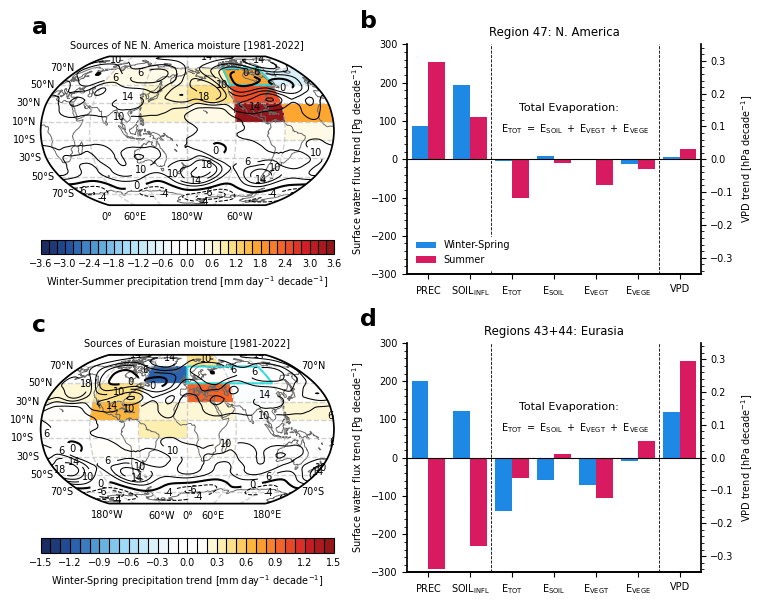

In [149]:
fig = plt.figure(figsize=(7.5,6))

# Panel 1--------------------------------------------------
ax = fig.add_subplot(221,projection=ccrs.Robinson(central_longitude=180))
#ax = fig.add_axes([0,0.35,0.5,0.35],ccrs.NorthPolarStereo())
#ax.set_extent([-180,180,-90,90],ccrs.PlateCarree())
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')
ax.set_title('Sources of NE N. America moisture [1981-2022]',fontsize=7)

#ax.text(-0.4, 0.25, 'iCESM1', weight='bold',
#        fontsize=17,
#        rotation=0,
#        horizontalalignment='left',
#         verticalalignment='bottom', transform=ax.transAxes)

ax.text(-0.03, 1.12, 'a', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)


num_rows = 9
num_cols = 6
"""
# Generate evenly spaced squares in a grid
cnt = 1
for i in range(num_rows):
    for j in range(num_cols):
        lon1 = 0 + j * (360 / num_cols)
        lat1 = -90 + i * (180 / num_rows)
        lon2 = lon1 + (360 / num_cols)
        lat2 = lat1 + (180 / num_rows)

        square = {'name': f'{cnt}', 'coords': (lon1, lat1, lon2, lat2)}

        # Plot the squares
        rectangle = Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, edgecolor='None', facecolor='none')
        ax.add_patch(rectangle)
        if abs(nr_diff_values[i,j]) >= 1:
            if cnt >= 49:
                ax.text(lon1+25, lat2-20, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
            else:
                ax.text(lon1+25, lat2-15, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        else:
            ax.text(lon1+25, lat2-15, square['name'], color='black', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        cnt += 1
"""
# Create a grid of values corresponding to the squares
x = np.linspace(0, 360, num_cols + 1)
y = np.linspace(-90, 90, num_rows + 1)
X, Y = np.meshgrid(x, y)
Z = np.random.rand(num_rows, num_cols)  # Replace this with your actual data

# Plot the pcolormesh grid with the specified colormap and normalization
#norm = BoundaryNorm(boundaries, new_cmap.N, clip=True)

cmap = colormaps.BlueWhiteOrangeRed
levels = np.arange(-3.6,3.61,step=0.2)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

#new_cmap = LinearSegmentedColormap('RdYlBu_r', cmap['levels'])
#contour = ax.pcolormesh(X, Y, 1000*r_diff_values, cmap=new_cmap, shading='auto', 
#                        transform=ccrs.PlateCarree(), alpha=1.0,norm=norm)
p = ax.pcolormesh(X, Y, nr_diff_values, 
                        cmap=cmap,
                        #shading='auto', 
                        alpha=1.0, 
                        norm=norm,
                        transform=ccrs.PlateCarree(),
                       )


ax.add_patch(mpatches.Rectangle(xy=[-120, 50], width=60, height=20,
                                    facecolor='none',
                                    edgecolor='#1CDADE',
                                    #linestyle='--',
                                    linewidth=1.5,
                                    zorder=103,
                                    alpha=0.85,
                                    transform=ccrs.PlateCarree())
                 )

# Geopotential Height
rzs,lons = add_cyclic_point(mrz.slope*10,rvp1.lon)
c = ax.contour(lons,rz['lat'],rzs,
               levels=[-6,-4,6,10,14,18],
               linewidths=0.75,
               colors='k',
               zorder=105,
               transform=ccrs.PlateCarree()
              )

z = ax.contour(lons,rz['lat'],rzs,
               levels=[0],
               linewidths=1.5,
               colors='k',
               zorder=105,
               transform=ccrs.PlateCarree()
              )

def fmt(x):
    return f'{x:2.0f}'

clab1 = ax.clabel(c, c.levels, inline=True, fmt=fmt, fontsize=7)
clab2 = ax.clabel(z, z.levels, inline=True, fmt=fmt, fontsize=7)
for l in clab1+clab2:
    l.set_rotation(0)

# Colorbar

#cax = fig.add_axes([0.1,0.05,0.35,0.01])
cb = plt.colorbar(p,orientation='horizontal', 
                  drawedges=True,
                  ticks=levels[::3]
                 )

#cb.set_ticklabels(f'{levels:0.02f}') #[::3])
cb.set_label(r'Winter-Summer precipitation trend [mm $\mathrm{day^{-1}\ decade^{-1}}$]')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)
cb.ax.minorticks_off()

#cax2 = cax.twinx()

#cax2.set_ylim(0.1,1)
#cax2.set_yticks(iticks)
#cax2.set_yticklabels(1./iticks)
#cax2.set_ylabel(r'Contribution to Arctic WV trend [g $\mathrm{kg^{-1}\ decade^{-1}}$]')

ax.spines['geo'].set_linewidth(1.25)

# Colorbar
colorbar_position = cb.ax.get_position()

ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1.0,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='silver', 
                  linestyle='--', alpha=0.7)
gl.top_labels = False  # Turn off top labels
gl.left_labels = True  # Turn off left labels
gl.right_labels = False  # Turn off left labels
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -70, -50, -30, -10, 10, 30, 50, 70, 90])

# Panel 2--------------------------------------------------
ax = fig.add_subplot(223,projection=ccrs.Robinson(central_longitude=0))
#ax = fig.add_axes([0,0.35,0.5,0.35],ccrs.NorthPolarStereo())
#ax.set_extent([-180,180,-90,90],ccrs.PlateCarree())
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')
ax.set_title('Sources of Eurasian moisture [1981-2022]',fontsize=7)

#ax.text(-0.4, 0.25, 'iCESM1', weight='bold',
#        fontsize=17,
#        rotation=0,
#        horizontalalignment='left',
#         verticalalignment='bottom', transform=ax.transAxes)

ax.text(-0.03, 1.12, 'c', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

num_rows = 9
num_cols = 6
"""
# Generate evenly spaced squares in a grid
cnt = 1
for i in range(num_rows):
    for j in range(num_cols):
        lon1 = 0 + j * (360 / num_cols)
        lat1 = -90 + i * (180 / num_rows)
        lon2 = lon1 + (360 / num_cols)
        lat2 = lat1 + (180 / num_rows)

        square = {'name': f'{cnt}', 'coords': (lon1, lat1, lon2, lat2)}

        # Plot the squares
        rectangle = Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, edgecolor='None', facecolor='none')
        ax.add_patch(rectangle)
        if abs(er_diff_values[i,j]) >= 1:
            if cnt >= 49:
                print(cnt)
                ax.text(lon1+25, lat2-30, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
            else:
                ax.text(lon1+25, lat2-15, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        else:
            ax.text(lon1+25, lat2-15, square['name'], color='black', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        cnt += 1
"""
# Create a grid of values corresponding to the squares
x = np.linspace(0, 360, num_cols + 1)
y = np.linspace(-90, 90, num_rows + 1)
X, Y = np.meshgrid(x, y)
Z = np.random.rand(num_rows, num_cols)  # Replace this with your actual data

# Plot the pcolormesh grid with the specified colormap and normalization
#norm = BoundaryNorm(boundaries, new_cmap.N, clip=True)

#cmap = colormaps.BlueWhiteOrangeRed
#levels = np.arange(-0.6,0.61,step=0.05)
#norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

#new_cmap = LinearSegmentedColormap('RdYlBu_r', cmap['levels'])
#contour = ax.pcolormesh(X, Y, 1000*r_diff_values, cmap=new_cmap, shading='auto', 
#                        transform=ccrs.PlateCarree(), alpha=1.0,norm=norm)
cmap = colormaps.BlueWhiteOrangeRed
levels = np.arange(-1.5,1.51,step=0.1)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

p = ax.pcolormesh(X, Y, er_diff_values, 
                        cmap=cmap,
                        #shading='auto', 
                        alpha=1.0, 
                        norm=norm,
                        transform=ccrs.PlateCarree(),
                       )

ax.add_patch(mpatches.Rectangle(xy=[0, 50], width=120, height=20,
                                    facecolor='none',
                                    edgecolor='#1CDADE',
                                    linestyle='-',
                                    linewidth=1.5,
                                    zorder=103,
                                    alpha=0.85,
                                    transform=ccrs.PlateCarree())
                 )

# Geopotential Height
rzs,lons = add_cyclic_point(mrz.slope*10,rvp1.lon)
c = ax.contour(lons,rz['lat'],rzs,
               levels=[-6,-4,6,10,14,18],
               linewidths=0.75,
               colors='k',
               zorder=105,
               transform=ccrs.PlateCarree()
              )

z = ax.contour(lons,rz['lat'],rzs,
               levels=[0],
               linewidths=1.5,
               colors='k',
               zorder=105,
               transform=ccrs.PlateCarree()
              )

def fmt(x):
    return f'{x:2.0f}'

clab1 = ax.clabel(c, c.levels, inline=True, fmt=fmt, fontsize=7)
clab2 = ax.clabel(z, z.levels, inline=True, fmt=fmt, fontsize=7)
for l in clab1+clab2:
    l.set_rotation(0)
# Colorbar

#cax = fig.add_axes([0.1,0.05,0.35,0.01])
cb = plt.colorbar(p,orientation='horizontal', 
                  drawedges=True,
                  ticks=levels[::3]
                 )

#cb.set_ticklabels(f'{levels:0.02f}') #[::3])
cb.set_label(r'Winter-Spring precipitation trend [mm $\mathrm{day^{-1}\ decade^{-1}}$]')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)
cb.ax.minorticks_off()

#cax2 = cax.twinx()

#cax2.set_ylim(0.1,1)
#cax2.set_yticks(iticks)
#cax2.set_yticklabels(1./iticks)
#cax2.set_ylabel(r'Contribution to Arctic WV trend [g $\mathrm{kg^{-1}\ decade^{-1}}$]')

ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1.0,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='silver', 
                  linestyle='--', alpha=0.7)
gl.top_labels = False  # Turn off top labels
gl.left_labels = True  # Turn off left labels
gl.right_labels = False  # Turn off left labels
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -70, -50, -30, -10, 10, 30, 50, 70, 90])


# Panel 1--------------------------------------------------
# Create a custom RdYlBu colormap with white in the middle
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = 7
mpl.rcParams['hatch.color'] = 'silver'

bar_width=0.8

## Panel 1 --------------------------------------------------
ax = fig.add_subplot(224)
ax.set_xlim([0,14])
ax.set_ylim([-300,300])
ax.set_ylabel(r'Surface water flux trend [Pg $\mathrm{decade^{-1}}$]')
#ax.set_xlabel('year')
ax.set_title('Regions 43+44: Eurasia')
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.25)
ax.spines[['right', 'top']].set_visible(False)
#ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.set_xticks(np.arange(1,15,step=2))

params = {'mathtext.default': 'regular' }  # Allows tex-style title & labels
plt.rcParams.update(params)

ax.set_xticklabels([r'$PREC$',
                    r'$SOIL_{INFL}$',
                    r'$E_{TOT}$',
                    r'$E_{SOIL}$',
                    r'$E_{VEGT}$',
                    r'$E_{VEGE}$',
                    'VPD'])
    
ax.text(-0.16, 1.05, 'd', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.bar(np.arange(1,13,step=2)-0.4,
       [60*60*24*182*(rqrain+rqsnow).slope/1.0E15*10000,
        60*60*24*182*(rinfl).slope/1.0E15*10000,
        -60*60*24*182*((rqsoil+rvegt+rvege).slope)/1.0E15*10000,
        -60*60*24*182*rqsoil.slope/1.0E15*10000,
        -60*60*24*182*rvegt.slope/1.0E15*10000,
        -60*60*24*182*rvege.slope/1.0E15*10000,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rperma.sum('levgrnd').slope/1.0E15*10000,
       ],
       label='Spring',
        color='#1E88E5', ##1E88E5
       
      )

ax.bar(np.arange(1,13,step=2)+0.4,
       [60*60*24*182*(rqrains+rqsnows).slope/1.0E15*10000,
        60*60*24*182*(rinfls).slope/1.0E15*10000,
        -60*60*24*182*((rqsoils+rvegts+rveges).slope)/1.0E15*10000,
        -60*60*24*182*rqsoils.slope/1.0E15*10000,
        -60*60*24*182*rvegts.slope/1.0E15*10000,
        -60*60*24*182*rveges.slope/1.0E15*10000,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermas.sum('levgrnd').slope/1.0E15*10000,
       ],
       label='Summer',
        color='#D81B60', ##1E88E5
       
      )

ax2 = ax.twinx()
ax2.set_ylim([-0.35,0.35])
ax2.set_ylabel(r'VPD trend [hPa $\mathrm{decade^{-1}}$]')
#ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.yaxis.set_minor_locator(MultipleLocator(0.02))
#ax2.set_ylim()
for axis in ['bottom','right']:
    ax2.spines[axis].set_linewidth(1.25)
ax2.spines[['left', 'top']].set_visible(False)

ax2.bar([12.6],(irsvpm-irvpm)*10,
       color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Spring',
      )

ax2.bar([13.4],(irsvp-irvp)*10,
       color='#D81B60', ##1E88E5,
        width=bar_width,
        label='Spring',
      )

ax.text(0.38, 0.7, 'Total Evaporation:',
        fontsize=8,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.text(0.32, 0.6, r'$E_{TOT}\ =\ E_{SOIL}\ +\ E_{VEGT}\ +\ E_{VEGE}$',
        fontsize=7,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

#plt.legend(frameon=False,loc='best')

ax2.axvline(4,linestyle='--',c='k',linewidth=0.6)
ax2.axvline(12,linestyle='--',c='k',linewidth=0.6)
ax2.axhline(0,linestyle='-',c='k',linewidth=0.8)

#===========================================================
## North America
#===========================================================

## Panel 1 --------------------------------------------------
ax = fig.add_subplot(222)
ax.set_xlim([0,14])
ax.set_ylim([-300,300])
#ax.set_ylabel('Summer')
ax.set_ylabel(r'Surface water flux trend [Pg $\mathrm{decade^{-1}}$]')
#ax.set_xlabel('year')
ax.set_title('Region 47: N. America')
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.25)
ax.spines[['right', 'top']].set_visible(False)
#ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.set_xticks(np.arange(1,15,step=2))
ax.set_xticklabels([r'$PREC$',
                    r'$SOIL_{INFL}$',
                    r'$E_{TOT}$',
                    r'$E_{SOIL}$',
                    r'$E_{VEGT}$',
                    r'$E_{VEGE}$',
                    'VPD'])
    
ax.text(-0.16, 1.05, 'b', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.bar(np.arange(1,13,step=2)-0.4,
       [60*60*24*182*(rqrainna+rqsnowna).slope/1.0E15*10000,
        60*60*24*182*(rinflna).slope/1.0E15*10000,
        -60*60*24*182*((rqsoilna+rvegtna+rvegena).slope)/1.0E15*10000,
        -60*60*24*182*rqsoilna.slope/1.0E15*10000,
        -60*60*24*182*rvegtna.slope/1.0E15*10000,
        -60*60*24*182*rvegena.slope/1.0E15*10000,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermana.sum('levgrnd').slope/1.0E15*10000,
       ],
        color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Spring',
       
      )

ax.bar(np.arange(1,13,step=2)+0.4,
       [60*60*24*182*(rqrainnas+rqsnownas).slope/1.0E15*10000,
        60*60*24*182*(rinflnas).slope/1.0E15*10000,
        -60*60*24*182*((rqsoilnas+rvegtnas+rvegenas).slope)/1.0E15*10000,
        -60*60*24*182*rqsoilnas.slope/1.0E15*10000,
        -60*60*24*182*rvegtnas.slope/1.0E15*10000,
        -60*60*24*182*rvegenas.slope/1.0E15*10000,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermanas.sum('levgrnd').slope/1.0E15*10000,
       ],
        color='#D81B60', ##1E88E5
        width=bar_width,
       label='Summer'
       
      )

ax2 = ax.twinx()
ax2.set_ylim([-0.35,0.35])
ax2.set_ylabel(r'VPD trend [hPa $\mathrm{decade^{-1}}$]')
#ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.yaxis.set_minor_locator(MultipleLocator(0.02))
#ax2.set_ylim()
for axis in ['bottom','right']:
    ax2.spines[axis].set_linewidth(1.25)
ax2.spines[['left', 'top']].set_visible(False)

ax2.bar([12.6],(irsvpnam-irvpnam)*10,
       color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Winter-Spring',
      )

ax2.bar([13.4],(irsvpna-irvpna)*10,
       color='#D81B60', ##1E88E5,
        width=bar_width,
        label='Summer',
      )

ax.text(0.38, 0.7, 'Total Evaporation:',
        fontsize=8,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.text(0.32, 0.6, r'$E_{TOT}\ =\ E_{SOIL}\ +\ E_{VEGT}\ +\ E_{VEGE}$',
        fontsize=7,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

plt.legend(frameon=True,loc='lower left',edgecolor='white',framealpha=1.0)

ax.axvline(4,linestyle='--',c='k',linewidth=0.6)
ax.axvline(12,linestyle='--',c='k',linewidth=0.6)
#ax.axvline(0,linestyle='--',c='k',linewidth=0.8)
ax.axhline(0,linestyle='-',c='k',linewidth=0.8)

fig.subplots_adjust(top=0.92,bottom=0.04,left=0.05,right=0.93,hspace=0.3,wspace=0.25)
fig.savefig('./plots/moisture_tagging-figure_2-supp-evap_fluxes-z3.png',dpi=600)

## Budget

In [150]:
iprect = (prect*areacella).sel(lat=slice(70,90)).sum(dim=['lat','lon']) #/areacella.sum(dim=['lat','lon'])

In [151]:
iprect_jja = jja(iprect).sel(year=slice(1981,2022))

In [152]:
iqflx = (qflx['QFLX']*areacella).sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat','lon']) #/areacella.sum(dim=['lat','lon'])

In [153]:
(86400*1000*iprect.sel(time=slice('1981-01-01','2022-12-01')).mean('time').values/1.0E15),(86400*iqflx.sel(time=slice('1981-01-01','2022-12-01')).mean('time').values/1.0E15)

(0.0127353897, 0.0151982548992)

In [154]:
rprect = linregress(iprect_jja,iprect_jja.year)

In [155]:
rqflx = linregress(jja(iqflx).sel(year=slice(1981,2022)),iprect_jja.year)

In [156]:
iqover = (qover['QOVER']*areacella).sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat','lon'])

In [157]:
rqover = linregress(jja(iqover).sel(year=slice(1981,2022)),ds_y.year)

In [158]:
def prec_reader(r = 44):
    files = sorted(glob.glob(f'/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/daily/isotope-nudging2.cam.h1*{r}*.197901-202212.nc'))
    #for file in files:
    #    print(file)

    varas = [f'PRECRC_TA{r}r',f'PRECRL_TA{r}R',f'PRECSC_TA{r}s',f'PRECSL_TA{r}S']

    def preprocess(ds,var,i,file):
        #print(i,var,file)
        return ds[var].resample(time='1MS').mean('time')

    prect = [preprocess(xr.open_dataset(files[i]),var,i,files[i]) for i,var in enumerate(varas)]
    prect = xr.concat(prect,dim='prec')
    prect.coords['time'] = np.arange('1979-01-01','2023-02-01',dtype='datetime64[M]')
    return prect

In [159]:
prec43 = prec_reader(r=43)

In [160]:
prec44 = prec_reader(r=44)

In [161]:
prec47 = prec_reader(r=47)

In [209]:
prec37 = prec_reader(r=37)

KeyError: 'PRECRL_TA37R'

In [ ]:
prec35

In [162]:
files = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/isotope-nudging2.cam.h0.TA43V.197901-202212.plev.nc'

tmq43 = xr.open_dataset(files,decode_times=False).integrate('plev')/9.81
tmq43.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
tmq43

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 144, time: 528, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
Dimensions without coordinates: nbnd
Data variables:
    PS         (time, lat, lon) float32 6.998e+03 6.998e+03 ... 1.043e+04
    TA43V      (time, lat, lon) float64 -0.1633 -0.1633 ... -0.01152 -0.01152
    time_bnds  (time, nbnd) float64 0.0 3.16 3.16 ... 1.634e+03 1.637e+03
Attributes: (12/16)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      isotope-nudging2
    title:                     Regridded version of isotope-nudging2.cam.h0.T...
    logname:                   qinghua
    host:                      amery.eri.ucsb.e
    ...                        ...
    history:                   Sun Mar  3 21:20:49 2024: ncks -O -t 2 --no_tm...
    remap_script:              ncremap
    remap_hostname:            ross.eri.ucsb.edu
    remap_version:             5.1.9
    NCO:                       netCDF Operators version 5.1.9 (Homepage = htt...
    nco_openmp_thread_number:  2

In [163]:
files = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/isotope-nudging2.cam.h0.TA44V.197901-202212.plev.nc'

tmq44 = xr.open_dataset(files,decode_times=False).integrate('plev')/9.81
tmq44.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
tmq44

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 144, time: 528, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
Dimensions without coordinates: nbnd
Data variables:
    PS         (time, lat, lon) float32 6.998e+03 6.998e+03 ... 1.043e+04
    TA44V      (time, lat, lon) float64 -0.1633 -0.1633 ... -0.0004122
    time_bnds  (time, nbnd) float64 0.0 3.16 3.16 ... 1.634e+03 1.637e+03
Attributes: (12/16)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      isotope-nudging2
    title:                     Regridded version of isotope-nudging2.cam.h0.T...
    logname:                   qinghua
    host:                      amery.eri.ucsb.e
    ...                        ...
    history:                   Sun Mar  3 21:25:09 2024: ncks -O -t 2 --no_tm...
    remap_script:              ncremap
    remap_hostname:            ross.eri.ucsb.edu
    remap_version:             5.1.9
    NCO:                       netCDF Operators version 5.1.9 (Homepage = htt...
    nco_openmp_thread_number:  2

In [164]:
files = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/isotope-nudging2.cam.h0.TA47V.197901-202212.plev.nc'

tmq47 = xr.open_dataset(files,decode_times=False).integrate('plev')/9.81
tmq47.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
tmq47

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 144, time: 528, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
Dimensions without coordinates: nbnd
Data variables:
    PS         (time, lat, lon) float32 6.998e+03 6.998e+03 ... 1.043e+04
    TA47V      (time, lat, lon) float64 -0.1633 -0.1633 ... -0.004323 -0.004323
    time_bnds  (time, nbnd) float64 0.0 3.16 3.16 ... 1.634e+03 1.637e+03
Attributes: (12/16)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      isotope-nudging2
    title:                     Regridded version of isotope-nudging2.cam.h0.T...
    logname:                   qinghua
    host:                      amery.eri.ucsb.e
    ...                        ...
    history:                   Tue Feb 20 11:09:28 2024: ncks -O -t 2 --no_tm...
    remap_script:              ncremap
    remap_hostname:            ross.eri.ucsb.edu
    remap_version:             5.1.9
    NCO:                       netCDF Operators version 5.1.9 (Homepage = htt...
    nco_openmp_thread_number:  2

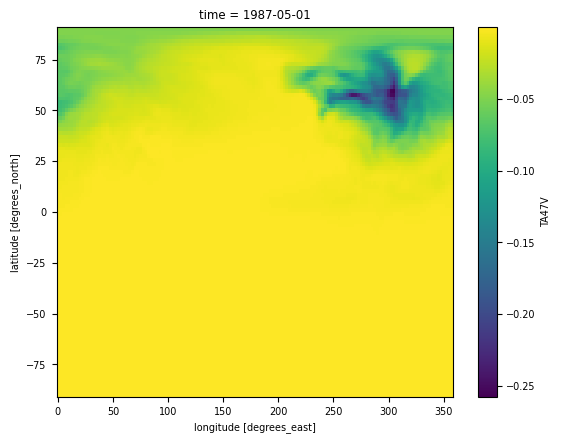

In [165]:
tmq47['TA47V'].isel(time=100).plot()

In [166]:
def area_sum(ds):
    areacella.coords['lat'] = ds['lat']
    ids = (ds*areacella).sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat','lon'])
    #ids = (ds*areacella).sum(dim=['lon'])
    #ids = (ds*areacella).sum(dim=['lat','lon'])
    #ids = ds.sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat'])
    return ids

def global_sum(ds):
    areacella.coords['lat'] = ds['lat']
    ids = (ds*areacella).sum(dim=['lat','lon'])
    #ids = (ds*areacella).sum(dim=['lon'])
    #ids = (ds*areacella).sum(dim=['lat','lon'])
    #ids = ds.sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat'])
    return ids

def na_sum(ds):
    areacella.coords['lat'] = ds['lat']
    ids = (ds*areacella).sel(lat=slice(50,70),lon=slice(240,300)).sum(dim=['lat','lon'])
    #ids = (ds*areacella).sum(dim=['lon'])
    #ids = (ds*areacella).sum(dim=['lat','lon'])
    #ids = ds.sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat'])
    return ids

def area_mean(ds):
    areacella.coords['lat'] = ds['lat']
    ids = (ds*areacella).sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat','lon'])/(areacella).sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat','lon'])
    #ids = (ds*areacella).sum(dim=['lon'])
    #ids = (ds*areacella).sum(dim=['lat','lon'])
    #ids = ds.sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat'])
    return ids

def na_mean(ds):
    areacella.coords['lat'] = ds['lat']
    ids = (ds*areacella).sel(lat=slice(50,70),lon=slice(240,300)).sum(dim=['lat','lon'])/(areacella).sel(lat=slice(50,70),lon=slice(240,300)).sum(dim=['lat','lon'])
    #ids = (ds*areacella).sum(dim=['lon'])
    #ids = (ds*areacella).sum(dim=['lat','lon'])
    #ids = ds.sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat'])
    return ids

def arctic_sum(ds):
    areacella.coords['lat'] = ds['lat']
    ids = (ds*areacella).sel(lat=slice(70,90)).sum(dim=['lat','lon'])
    #ids = (ds*areacella).sum(dim=['lon'])
    #ids = (ds*areacella).sum(dim=['lat','lon'])
    #ids = ds.sel(lat=slice(70,90),lon=slice(0,360)).sum(dim=['lat'])
    return ids

def arctic_mean(ds):
    areacella.coords['lat'] = ds['lat']
    ids = (ds*areacella).sel(lat=slice(70,90)).sum(dim=['lat','lon'])/(areacella).sel(lat=slice(70,90)).sum(dim=['lat','lon'])
    #ids = (ds*areacella).sum(dim=['lon'])
    #ids = (ds*areacella).sum(dim=['lat','lon'])
    #ids = ds.sel(lat=slice(70,90),lon=slice(0,360)).sum(dim=['lat'])
    return ids

def non_arctic_sum(ds):
    areacella.coords['lat'] = ds['lat']
    ids = (ds*areacella).sel(lat=slice(-90,70)).sum(dim=['lat','lon'])
    #ids = (ds*areacella).sum(dim=['lon'])
    #ids = (ds*areacella).sum(dim=['lat','lon'])
    #ids = ds.sel(lat=slice(70,90),lon=slice(0,360)).sum(dim=['lat'])
    return ids

def non_arctic_mean(ds):
    areacella.coords['lat'] = ds['lat']
    ids = (ds*areacella).sel(lat=slice(-90,70)).sum(dim=['lat','lon'])/(areacella).sel(lat=slice(-90,70)).sum(dim=['lat','lon'])
    #ids = (ds*areacella).sum(dim=['lon'])
    #ids = (ds*areacella).sum(dim=['lat','lon'])
    #ids = ds.sel(lat=slice(70,90),lon=slice(0,360)).sum(dim=['lat'])
    return ids
    
def annual_sum_trend(ds,month1=5):
    #ds_y = ds.where(ds['time.month'] <= month1).dropna('time').groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    #ds_y = ds.where(ds['time.season'] == 'JJA').groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    ds_y = ds.groupby('time.year').sum('time').sel(year=slice(1981,2022))
    
    r = linregress(ds_y,ds_y.year)
    return r.slope

def annual_mean_trend(ds,month1=5):
    #ds_y = ds.where(ds['time.month'] <= month1).dropna('time').groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    #ds_y = ds.where(ds['time.season'] == 'JJA').groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    ds_y = ds.groupby('time.year').mean('time').sel(year=slice(1981,2022))
    
    r = linregress(ds_y,ds_y.year)
    return r.slope

def summer_mean_trend(ds,month1=5):
    #ds_y = ds.where(ds['time.month'] <= month1).dropna('time').groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    #ds_y = ds.where(ds['time.season'] == 'JJA').groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    ds_y = jja(ds).sel(year=slice(1981,2022))
    
    r = linregress(ds_y,ds_y.year)
    return r.slope

def winter_mean_trend(ds,month1=5):
    #ds_y = ds.where(ds['time.month'] <= month1).dropna('time').groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    #ds_y = ds.where(ds['time.season'] == 'JJA').groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    ds_y = ds.where(ds['time.month'] <= 5).groupby('time.year').mean('time').sel(year=slice(1981,2022))
    
    r = linregress(ds_y,ds_y.year)
    return r.slope

def annual_soilm_trend(ds,month1=5):
    ds_y = ds.where(ds['time.month'] <= month1).dropna('time').groupby('time.year').sum('time').sel(year=slice(1981,2022)) 
    #ds_y = ds.where(ds['time.season'] == 'JJA').groupby('time.year').sum('time').sel(year=slice(1981,2022))
    ds_y = ds.groupby('time.year').mean('time').sel(year=slice(1981,2022))
    
    r = linregress(ds_y,ds_y.year)
    return r.slope

def spring_sum_trend(ds,month1=5):
    #ds_y = ds.where(ds['time.month'] <= month1).dropna('time').groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    ds_y = ds.where(ds['time.season'] == 'MAM').groupby('time.year').mean('time').sel(year=slice(1981,2022)) 
    #ds_y = ds.groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    
    r = linregress(ds_y,ds_y.year)
    return r.slope

def summer_sum_trend(ds,month1=5):
    #ds_y = ds.where(ds['time.month'] <= month1).dropna('time').groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    ds_y = ds.where(ds['time.season'] == 'JJA').groupby('time.year').mean('time').sel(year=slice(1981,2022)) 
    #ds_y = ds.groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    
    r = linregress(ds_y,ds_y.year)
    return r.slope

def winter_sum_trend(ds,month1=5):
    ds_y = ds.where(ds['time.month'] <= month1).dropna('time').groupby('time.year').sum('time').sel(year=slice(1981,2022))
    #ds_y = ds.where(ds['time.season'] == 'JJA').groupby('time.year').mean('time').sel(year=slice(1981,2022)) * 86400
    #ds_y = ds.groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    
    r = linregress(ds_y,ds_y.year)
    return r.slope

def fall_sum_trend(ds,month1=5):
    #ds_y = ds.where(ds['time.month'] <= month1).dropna('time').groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    ds_y = ds.where(ds['time.season'] == 'SON').groupby('time.year').mean('time').sel(year=slice(1981,2022))
    #ds_y = ds.groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    
    r = linregress(ds_y,ds_y.year)
    return r.slope

In [167]:
## How much from Eurasia region? 

In [168]:
ndays = 365
ndays2 = 151
ndays3 = 91
ndays4 = 90

In [169]:
rqflxa = annual_sum_trend(area_sum(qflx['QFLX']))
rpermaa =  annual_sum_trend(area_sum(perma['SOILICE']))
rvegea =  annual_sum_trend(area_sum(qvege['QVEGE']))
rvegta =  annual_sum_trend(area_sum(qvegt['QVEGT']))
rovera =  annual_sum_trend(area_sum(qover['QOVER']))
rinfla =  annual_sum_trend(area_sum(qinfl['QINFL']))
rqsoila =  annual_sum_trend(area_sum(qsoil['QSOIL']))
rqdripa =  annual_sum_trend(area_sum(qdrip['QDRIP']))
rqdraia =  annual_sum_trend(area_sum(qdrai['QDRAI']))
rqchargea =  annual_sum_trend(area_sum(qcharge['QCHARGE']))
rqsnwcpicea =  annual_sum_trend(area_sum(qsnwcpice['QSNWCPICE']))
rqraina =  annual_sum_trend(area_sum(qrain['RAIN']))
rqsnowa =  annual_sum_trend(area_sum(qsnow['SNOW']))
rprectas = summer_sum_trend(arctic_sum(prect))
rprectaw = winter_sum_trend(arctic_sum(prect))
rprecla = annual_sum_trend(arctic_sum(precl))
rqovera = annual_sum_trend(area_sum(qover['QOVER']))
rtmqa = summer_sum_trend(arctic_sum(tmq['TMQ']))
rliq = annual_soilm_trend(area_sum(soil_liq['SOILLIQ']))
rice = annual_soilm_trend(area_sum(soil_ice['SOILICE']))

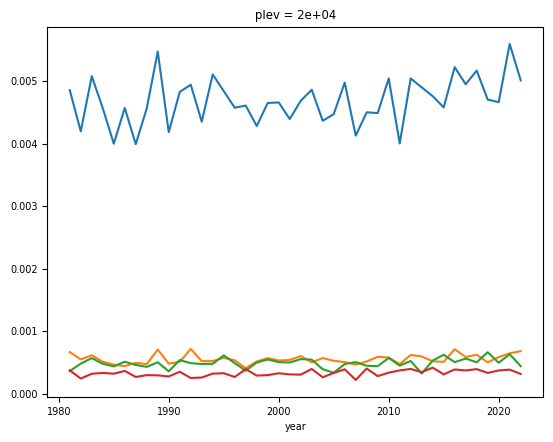

In [170]:
(arctic_sum(prect).where(prect['time.season'] == 'JJA').groupby('time.year').sum('time').sel(year=slice(1981,2022))/1.0E15*86400*91).plot()
(arctic_sum(prec43.sum('prec')).where(prect['time.season'] == 'JJA').groupby('time.year').sum('time').sel(year=slice(1981,2022))/1.0E15*86400*91).plot()
(arctic_sum(prec44.sum('prec')).where(prect['time.season'] == 'JJA').groupby('time.year').sum('time').sel(year=slice(1981,2022))/1.0E15*86400*91).plot()
(arctic_sum(prec47.sum('prec')).where(prect['time.season'] == 'JJA').groupby('time.year').sum('time').sel(year=slice(1981,2022))/1.0E15*86400*91).plot()

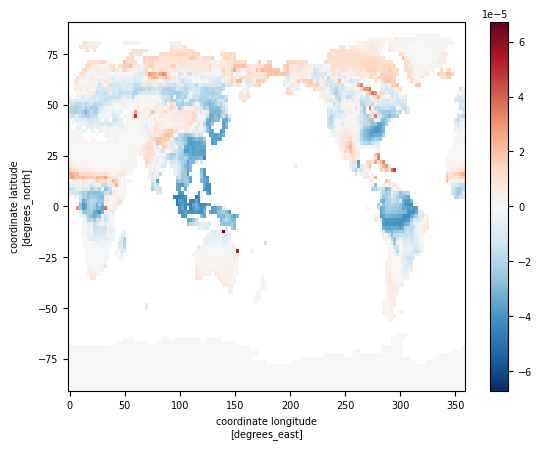

In [171]:
jja(qsoil['QSOIL']-qvegt['QVEGT']).sel(year=slice(1981,2022)).mean('year').plot()

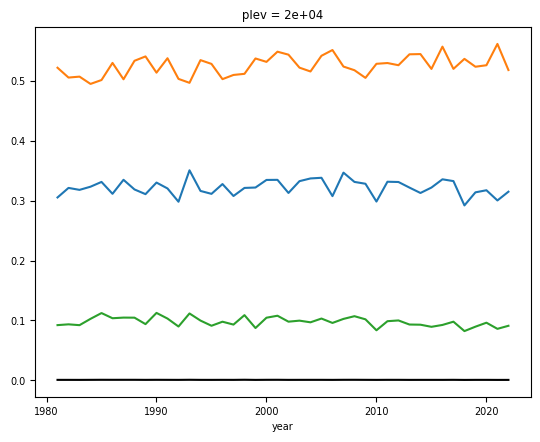

In [172]:
season = 'JJA'

(area_sum(prect).where(prect['time.season'] == season).groupby('time.year').sum('time').sel(year=slice(1981,2022))/1.0E15*10000*90).plot(c='k')
#(arctic_sum(prec43.sum('prec')).where(prect['time.season'] == 'SON').groupby('time.year').sum('time').sel(year=slice(1981,2022))/1.0E15*86400*90).plot()
#(arctic_sum(prec44.sum('prec')).where(prect['time.season'] == 'SON').groupby('time.year').sum('time').sel(year=slice(1981,2022))/1.0E15*86400*90).plot()
#(arctic_sum(prec47.sum('prec')).where(prect['time.season'] == 'SON').groupby('time.year').sum('time').sel(year=slice(1981,2022))/1.0E15*86400*90).plot()

(area_sum(qsoil['QSOIL']).where(prect['time.season'] == season).groupby('time.year').sum('time').sel(year=slice(1981,2022))/1.0E15*10000*90).plot(c='tab:blue')
(area_sum(qvegt['QVEGT']).where(prect['time.season'] == season).groupby('time.year').sum('time').sel(year=slice(1981,2022))/1.0E15*10000*90).plot(c='tab:orange')
(area_sum(qvege['QVEGE']).where(prect['time.season'] == season).groupby('time.year').sum('time').sel(year=slice(1981,2022))/1.0E15*10000*90).plot(c='tab:green')

In [173]:
season = 'JJA'

print(summer_sum_trend(arctic_sum(prect*1000)/1.0E15*10000*90).values)
print(summer_sum_trend(arctic_sum(prec43+prec44).sum('prec')*1000/1.0E15*10000*90).values)
print(summer_sum_trend(arctic_sum(prec43).sum('prec')*1000/1.0E15*10000*90).values)

print(summer_sum_trend(arctic_sum(prec44).sum('prec')*1000/1.0E15*10000*90).values)

print(summer_sum_trend(arctic_sum(prec47).sum('prec')*1000/1.0E15*10000*90).values)

print('PREC')
print(summer_sum_trend(area_sum(prect*1000)/1.0E15*10000*90).values)
print(summer_sum_trend(area_sum(qrain['RAIN']+qsnow['SNOW'])/1.0E15*10000*90).values)

print(winter_sum_trend(area_sum(prect*1000)/1.0E15*10000*90).values)
print(winter_sum_trend(area_sum(qrain['RAIN']+qsnow['SNOW'])/1.0E15*10000*90).values)

print(spring_sum_trend(area_sum(prect*1000)/1.0E15*10000*90).values)
print(spring_sum_trend(area_sum(qrain['RAIN']+qsnow['SNOW'])/1.0E15*10000*90).values)
#(arctic_sum(prec43.sum('prec')).where(prect['time.season'] == 'SON').groupby('time.year').sum('time').sel(year=slice(1981,2022))/1.0E15*86400*90).plot()
#(arctic_sum(prec44.sum('prec')).where(prect['time.season'] == 'SON').groupby('time.year').sum('time').sel(year=slice(1981,2022))/1.0E15*86400*90).plot()
#(arctic_sum(prec47.sum('prec')).where(prect['time.season'] == 'SON').groupby('time.year').sum('time').sel(year=slice(1981,2022))/1.0E15*86400*90).plot()

print('SPRING')
print(spring_sum_trend(area_sum(qsoil['QSOIL'])/1.0E15*10000*90).values)
print(spring_sum_trend(area_sum(qvegt['QVEGT'])/1.0E15*10000*90).values)
print(spring_sum_trend(area_sum(qvege['QVEGE'])/1.0E15*10000*90).values)
print(spring_sum_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000*90).values)

print('SUMMER')
print(summer_sum_trend(area_sum(qsoil['QSOIL'])/1.0E15*10000*90).values)
print(summer_sum_trend(area_sum(qvegt['QVEGT'])/1.0E15*10000*90).values)
print(summer_sum_trend(area_sum(qvege['QVEGE'])/1.0E15*10000*90).values)
print(summer_sum_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000*90).values)

0.00036941858843305824
0.00011538117719511867
5.2877525304600425e-05
6.250369052897202e-05
6.498196646396079e-05
PREC
-0.0005459775318831661
-0.0005570363705243818
0.0010669510046344803
0.0011468607171332757
7.413442281103725e-05
0.00012177887954739734
SPRING
0.00011502929347597522
0.00013306672468186198
9.206348537949571e-06
0.00025730241703142876
SUMMER
-1.784175219020777e-05
0.00020266130183834802
-8.450308222238832e-05
0.00010031612647158354


In [174]:
print(spring_sum_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000*90).values)
print(summer_sum_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000*90).values)
print(fall_sum_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000*90).values)
print(annual_sum_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000*ndays).values)

print('=======')
print(spring_sum_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000).values)
print(summer_sum_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000).values)
print(fall_sum_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000).values)
print(annual_sum_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000).values)

0.00025730241703142876
0.00010031612647158354
-1.1134841687269143e-05
0.004407537687675811
2.8589170402886856e-06
1.1146264934827653e-06
-1.2372104595501703e-07
1.2075458319335343e-05


In [175]:
p43s = summer_sum_trend(arctic_sum(prec43.sum('prec')))
p44s = summer_sum_trend(arctic_sum(prec44.sum('prec')))
p47s = summer_sum_trend(arctic_sum(prec47.sum('prec')))

p43w = winter_sum_trend(arctic_sum(prec43.sum('prec')))
p44w = winter_sum_trend(arctic_sum(prec44.sum('prec')))
p47w = winter_sum_trend(arctic_sum(prec47.sum('prec')))

In [176]:
r43 = summer_sum_trend(arctic_sum(-tmq43['TA43V']))
r44 = summer_sum_trend(arctic_sum(-tmq44['TA44V']))
r47 = summer_sum_trend(arctic_sum(-tmq47['TA47V']))

In [177]:
ndays = 365

#(ndays*(rqraina+rqsnowa)).plot(c='tab:blue',label='PRECIP')
#(ndays*(rqovera+rvegea+rinfla+rqsoila+rqsnwcpice)).plot(c='tab:orange',linestyle='--',label='SURF FLUX')
#(ndays*(rqovera+rvegea+rinfla+rqsoila)).plot(c='k',linestyle='--',label='SURF FLUX')


#(ndays*(rqsoila)).plot(c='tab:red',label='QSOIL')
(ndays*(rvegta)).plot(c='tab:green',label='QVEGT')
#(ndays*(rinfla-rqsoila-rvegta+rqcharge+rqdrip+rqdrai)).plot(c='k',linestyle='--',label='SURF FLUX')
#(ndays*(rinfla+rqover)).plot()
(ndays*rqcharge).plot()
#(rliq+rice).sum('levgrnd').plot(c='tab:purple',label='SOIL MOIST')
#(rice).sum('levgrnd').plot(c='yellow',label='SOIL ICE')

plt.axvline(70,linestyle='--',linewidth=0.6)

plt.legend()

TypeError: No numeric data to plot.

In [178]:
(ndays*(rqraina+rqsnowa)).plot(c='tab:blue',label='PRECIP')
#(ndays*(rqovera+rvegea+rqdrai+rinfla-rqsoila-rvegta+rqsnwcpice)).plot(c='tab:orange',linestyle='--',label='SURF FLUX')
(ndays*(rqovera+rinfla+rqsnwcpice)).plot(c='k',linestyle='--',label='SURF FLUX')
(ndays*(rqovera+rinfla+rqsoila+rvegea)).plot(c='tab:orange',linestyle='--',label='SURF FLUX')


#(ndays*(rqsoila)).plot(c='tab:red',label='QSOIL')
#(ndays*(rvegta)).plot(c='tab:green',label='QVEGT')
#(rliq+rice).sum('levgrnd').plot(c='tab:purple',label='SOIL MOIST')
#(rice).sum('levgrnd').plot(c='yellow',label='SOIL ICE')

plt.axvline(70,linestyle='--',linewidth=0.6)

plt.legend()

TypeError: No numeric data to plot.

In [179]:
print('ETOT',ndays*(rvegea+rvegta+rqsoila).values/1.0E15*10)
print('EVEGE',ndays*(rvegea).values/1.0E15*10)
print('EVEGT',ndays*(rvegta).values/1.0E15*10)
print('ESOIL',ndays*(rqsoila).values/1.0E15*10)
print('QFLX',ndays*(rqflxa).values/1.0E15*10)
print('PRECTA',ndays*(rprecta).values/1.0E15*10*1000)
print('PRECT',ndays*(rqraina+rqsnowa).values/1.0E15*10)
print('PREC43',ndays3*(p43s).values/1.0E15*10000)
print('PREC44',ndays3*(p44s).values/1.0E15*10000)
print('PREC47',ndays3*(p47s).values/1.0E15*10000)

print('PREC43w',ndays2*(p43w).values/1.0E15*10000)
print('PREC44w',ndays2*(p44w).values/1.0E15*10000)
print('PREC47w',ndays2*(p47w).values/1.0E15*10000)

print('PRECL',ndays*(rqraina).values/1.0E15*10)
print('QOVER',ndays*rqovera.values/1.0E15*10)
print('QTOT',ndays*(rvegea+rvegta+rqsoila+rinfla).values/1.0E15*10)
print('QTOT_ALT',ndays*(-rqovera+rinfla+rqsoila+rvegta+rvegea).values/1.0E15*10)
print('QDRAI',ndays*(rqdraia).values/1.0E15*10)
print('QDRIP',ndays*(rqdripa).values/1.0E15*10)
print('SM_RECON',ndays*(rinfla+rvegea+rqsoila).values/1.0E15*10)
print('TMQ',(rtmqa).values/1.0E15*10)
print('TMQ 43',(r43).values/1.0E15*10)
print('TMQ 44',(r44).values/1.0E15*10)
print('TMQ 47',(r47).values/1.0E15*10)
print('RSOILLIQ',rliq.sum('levgrnd').values/1.0E15*10)

ETOT 4.407540831439917e-06
EVEGE -1.0717292822947895e-06
EVEGT 4.294874539696945e-06
ESOIL 1.1843955740377606e-06
QFLX 4.739639096734462e-06


NameError: name 'rprecta' is not defined

In [180]:
print('PREC43',ndays3*(p43s).values/1.0E15*10000*86400)
print('PREC44',ndays3*(p44s).values/1.0E15*10000*86400)
print('PREC47',ndays3*(p47s).values/1.0E15*10000*86400)

print('PREC43w',ndays2*(p43w).values/1.0E15*10000*86400)
print('PREC44w',ndays2*(p44w).values/1.0E15*10000*86400)
print('PREC47w',ndays2*(p47w).values/1.0E15*10000*86400)

print('PRECT Arctic',ndays2*(rprectas).values/1.0E15*10000*86400)

print('PRECT',ndays3*(rqrain+rqsnow).slope.values/1.0E15*10000*86400)
print('PRECT',ndays3*(rqrains+rqsnows).slope.values/1.0E15*10000*86400)

PREC43 0.004619380320689166
PREC44 0.005460324338893221
PREC47 0.005676826714726319
PREC43w 0.002597144474677903
PREC44w 0.007827137427985222
PREC47w 8.509773255307487e-05
PRECT Arctic 0.05355092472939794
PRECT 100.1897532472921
PRECT -145.98816325912648


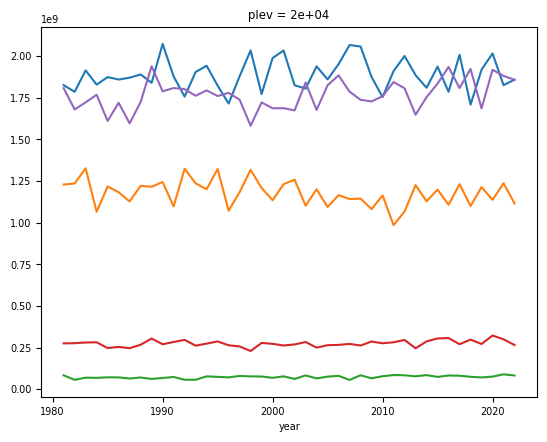

In [181]:
(area_sum(qrain['RAIN']).groupby('time.year').sum('time')).sel(year=slice(1981,2022)).plot()
(area_sum(qsnow['SNOW']).groupby('time.year').sum('time')).sel(year=slice(1981,2022)).plot()

(arctic_sum(prec47.sum('prec')*1000).groupby('time.year').sum('time')).sel(year=slice(1981,2022)).plot()
(arctic_sum((prec43+prec44).sum('prec')*1000).groupby('time.year').sum('time')).sel(year=slice(1981,2022)).plot()

(arctic_sum(prect*1000).groupby('time.year').sum('time')).sel(year=slice(1981,2022)).plot()

In [182]:
ndays*(rvegea+rvegta+rqsoila).values/1.0E12,ndays*(rqraina+rqsnowa).values/1.0E12

(0.0004407540831439917, -0.0004433215844161737)

<BarContainer object of 15 artists>

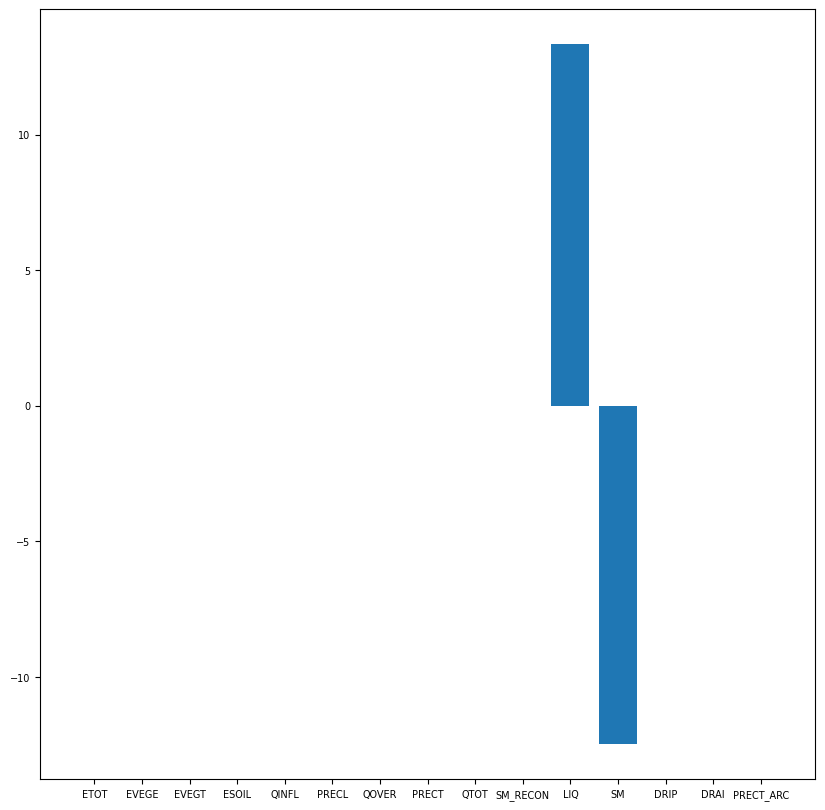

In [183]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)

kg2g = 1000

ax.bar(['ETOT','EVEGE','EVEGT','ESOIL','QINFL','PRECL','QOVER','PRECT','QTOT','SM_RECON','LIQ','SM','DRIP','DRAI','PRECT_ARC'],
        [ndays*(rvegea+rvegta+rqsoila).values/1.0E15*kg2g,
         ndays*(rvegea).values/1.0E15*kg2g,
         ndays*(rvegta).values/1.0E15*kg2g,
         ndays*(rqsoila).values/1.0E15*kg2g,
         ndays*(rinfla).values/1.0E15*kg2g,
         ndays*rqraina.values/1.0E15*kg2g,
         ndays*rqovera.values/1.0E15*kg2g,
         ndays*(rqraina+rqsnowa).values/1.0E15*kg2g,
         ndays*(rqovera+rinfla+rqsnwcpicea+rvegea+rqsoila).values/1.0E15*kg2g,
         ndays*(rinfla+rvegea+rqsoila).values/1.0E15*kg2g,
         (rliq).sel(levgrnd=slice(0,5)).sum('levgrnd')/1.0E15*kg2g,
         (rliq+rice).sel(levgrnd=slice(0,5)).sum('levgrnd')/1.0E15*kg2g,
         ndays*rqdripa.values/1.0E15*kg2g,
         ndays*rqdraia.values/1.0E15*kg2g,
         ndays2*(rprectas).values/1.0E15*kg2g,
        ]
       )

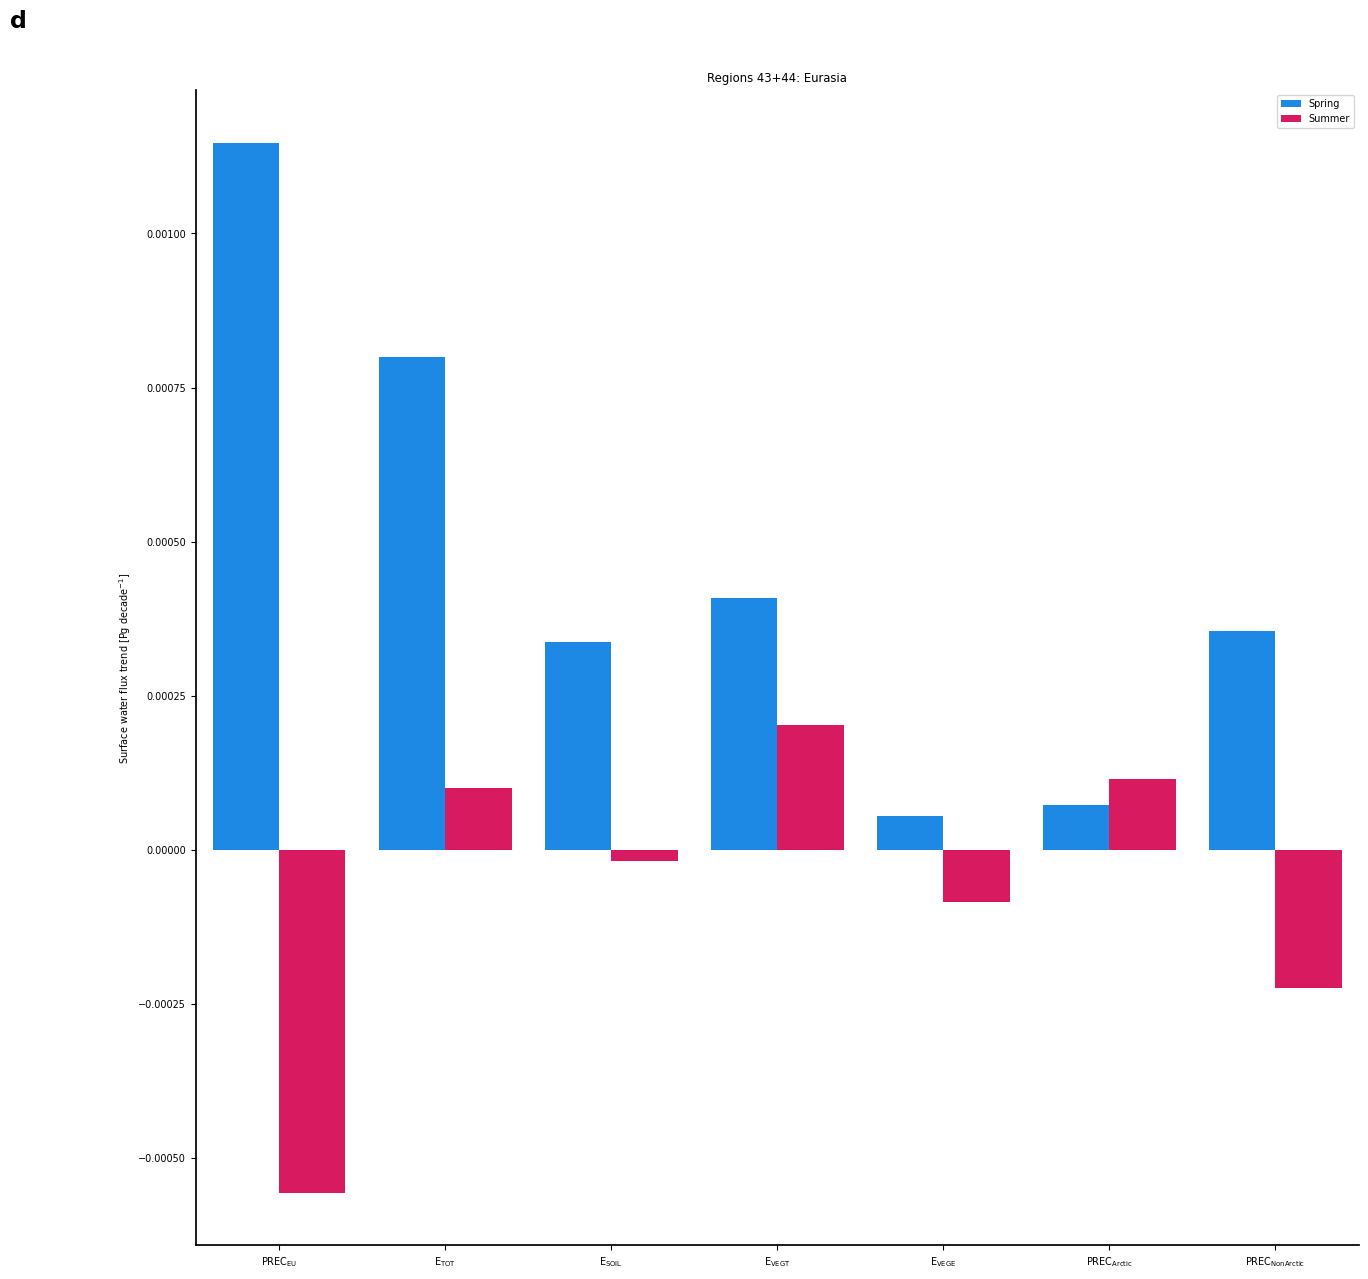

In [184]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111)
ax.set_xlim([0,14])
#ax.set_ylim([-300,300])
ax.set_ylabel(r'Surface water flux trend [Pg $\mathrm{decade^{-1}}$]')
#ax.set_xlabel('year')
ax.set_title('Regions 43+44: Eurasia')
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.25)
ax.spines[['right', 'top']].set_visible(False)
#ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.set_xticks(np.arange(1,15,step=2))

params = {'mathtext.default': 'regular' }  # Allows tex-style title & labels
plt.rcParams.update(params)

ax.set_xticklabels([r'$PREC_{EU}$',
                    r'$E_{TOT}$',
                    r'$E_{SOIL}$',
                    r'$E_{VEGT}$',
                    r'$E_{VEGE}$',
                    r'$PREC_{Arctic}$',
                    r'$PREC_{NonArctic}$',
                   ])
    
ax.text(-0.16, 1.05, 'd', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.bar(np.arange(1,15,step=2)-0.4,
       [winter_sum_trend(area_sum(qrain['RAIN']+qsnow['SNOW'])/1.0E15*10000*90).values,
        winter_sum_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000*90).values,
        winter_sum_trend(area_sum(qsoil['QSOIL'])/1.0E15*10000*90).values,
        winter_sum_trend(area_sum(qvegt['QVEGT'])/1.0E15*10000*90).values,
        winter_sum_trend(area_sum(qvege['QVEGE'])/1.0E15*10000*90).values,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermana.sum('levgrnd').slope/1.0E15*10000,
        winter_sum_trend(arctic_sum((prec43+prec44).sum('prec')*1000)/1.0E15*10000*90).values,
        winter_sum_trend(non_arctic_sum((prec43+prec44).sum('prec')*1000)/1.0E15*10000*90).values,
       ],
        color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Spring',
       
      )


ax.bar(np.arange(1,15,step=2)+0.4,
       [summer_sum_trend(area_sum(qrain['RAIN']+qsnow['SNOW'])/1.0E15*10000*90).values,
        summer_sum_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000*90).values,
        summer_sum_trend(area_sum(qsoil['QSOIL'])/1.0E15*10000*90).values,
        summer_sum_trend(area_sum(qvegt['QVEGT'])/1.0E15*10000*90).values,
        summer_sum_trend(area_sum(qvege['QVEGE'])/1.0E15*10000*90).values,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermanas.sum('levgrnd').slope/1.0E15*10000,
        summer_sum_trend(arctic_sum((prec43+prec44).sum('prec')*1000)/1.0E15*10000*90).values,
        summer_sum_trend(non_arctic_sum((prec43+prec44).sum('prec')*1000)/1.0E15*10000*90).values,
       ],
        color='#D81B60', ##1E88E5
        width=bar_width,
       label='Summer'
       
      )
"""
ax.bar(np.arange(1,13,step=2)+0.5,
       [annual_sum_trend(area_sum(qrain['RAIN']+qsnow['SNOW'])/1.0E15*10000*90).values,
        annual_sum_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000*90).values,
        annual_sum_trend(area_sum(qsoil['QSOIL'])/1.0E15*10000*90).values,
        annual_sum_trend(area_sum(qvegt['QVEGT'])/1.0E15*10000*90).values,
        annual_sum_trend(area_sum(qvege['QVEGE'])/1.0E15*10000*90).values,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermanas.sum('levgrnd').slope/1.0E15*10000,
        annual_sum_trend(arctic_sum(prect*1000)/1.0E15*10000*90).values,
       ],
        color='#FFA107', ##1E88E5
        width=bar_width,
       label='Annual'
       
      )
"""
plt.legend()

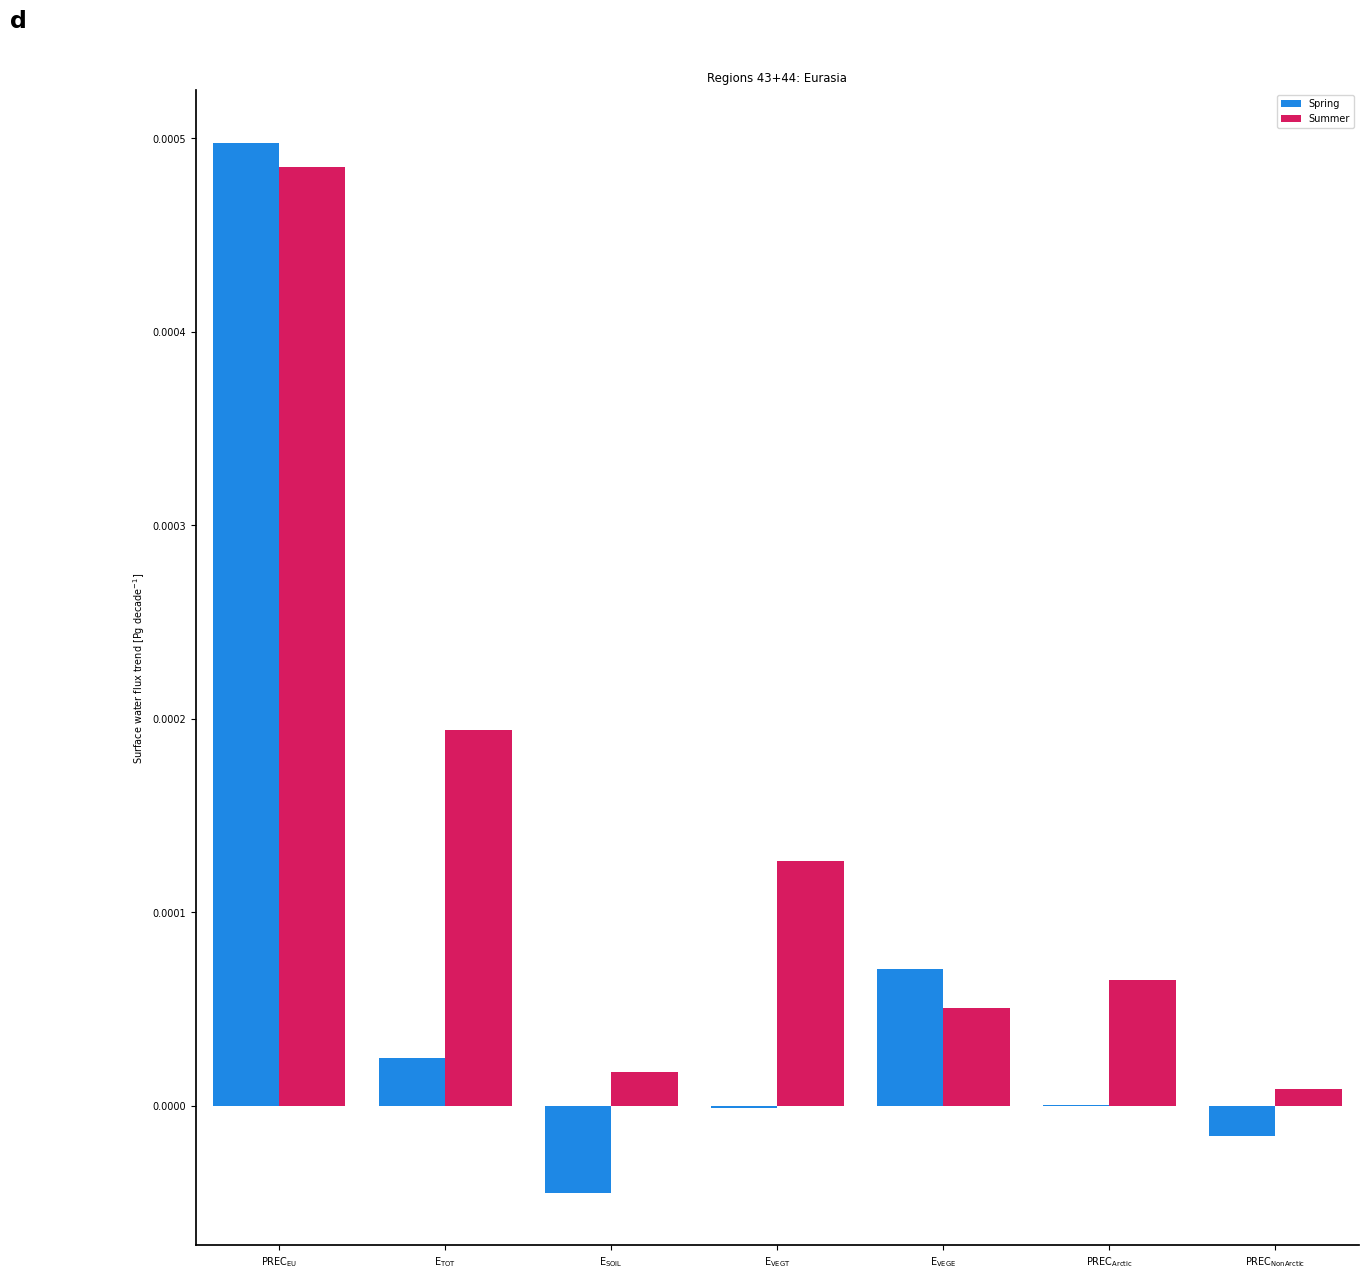

In [185]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111)
ax.set_xlim([0,14])
#ax.set_ylim([-300,300])
ax.set_ylabel(r'Surface water flux trend [Pg $\mathrm{decade^{-1}}$]')
#ax.set_xlabel('year')
ax.set_title('Regions 43+44: Eurasia')
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.25)
ax.spines[['right', 'top']].set_visible(False)
#ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.set_xticks(np.arange(1,15,step=2))

params = {'mathtext.default': 'regular' }  # Allows tex-style title & labels
plt.rcParams.update(params)

ax.set_xticklabels([r'$PREC_{EU}$',
                    r'$E_{TOT}$',
                    r'$E_{SOIL}$',
                    r'$E_{VEGT}$',
                    r'$E_{VEGE}$',
                    r'$PREC_{Arctic}$',
                    r'$PREC_{NonArctic}$',
                   ])
    
ax.text(-0.16, 1.05, 'd', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.bar(np.arange(1,15,step=2)-0.4,
       [winter_sum_trend(na_sum(qrain['RAIN']+qsnow['SNOW'])/1.0E15*10000*90).values,
        winter_sum_trend(na_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000*90).values,
        winter_sum_trend(na_sum(qsoil['QSOIL'])/1.0E15*10000*90).values,
        winter_sum_trend(na_sum(qvegt['QVEGT'])/1.0E15*10000*90).values,
        winter_sum_trend(na_sum(qvege['QVEGE'])/1.0E15*10000*90).values,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermana.sum('levgrnd').slope/1.0E15*10000,
        winter_sum_trend(arctic_sum(prec47.sum('prec')*1000)/1.0E15*10000*90).values,
        winter_sum_trend(non_arctic_sum(prec47.sum('prec')*1000)/1.0E15*10000*90).values,
       ],
        color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Spring',
       
      )


ax.bar(np.arange(1,15,step=2)+0.4,
       [summer_sum_trend(na_sum(qrain['RAIN']+qsnow['SNOW'])/1.0E15*10000*90).values,
        summer_sum_trend(na_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000*90).values,
        summer_sum_trend(na_sum(qsoil['QSOIL'])/1.0E15*10000*90).values,
        summer_sum_trend(na_sum(qvegt['QVEGT'])/1.0E15*10000*90).values,
        summer_sum_trend(na_sum(qvege['QVEGE'])/1.0E15*10000*90).values,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermanas.sum('levgrnd').slope/1.0E15*10000,
        summer_sum_trend(arctic_sum(prec47.sum('prec')*1000)/1.0E15*10000*90).values,
        summer_sum_trend(non_arctic_sum(prec47.sum('prec')*1000)/1.0E15*10000*90).values,
       ],
        color='#D81B60', ##1E88E5
        width=bar_width,
       label='Summer'
       
      )
"""
ax.bar(np.arange(1,13,step=2)+0.5,
       [annual_sum_trend(na_sum(qrain['RAIN']+qsnow['SNOW'])/1.0E15*10000*90).values,
        annual_sum_trend(na_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000*90).values,
        annual_sum_trend(na_sum(qsoil['QSOIL'])/1.0E15*10000*90).values,
        annual_sum_trend(na_sum(qvegt['QVEGT'])/1.0E15*10000*90).values,
        annual_sum_trend(na_sum(qvege['QVEGE'])/1.0E15*10000*90).values,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermanas.sum('levgrnd').slope/1.0E15*10000,
        annual_sum_trend(arctic_sum(prect*1000)/1.0E15*10000*90).values,
       ],
        color='#FFA107', ##1E88E5
        width=bar_width,
       label='Annual'
       
      )
"""
plt.legend()

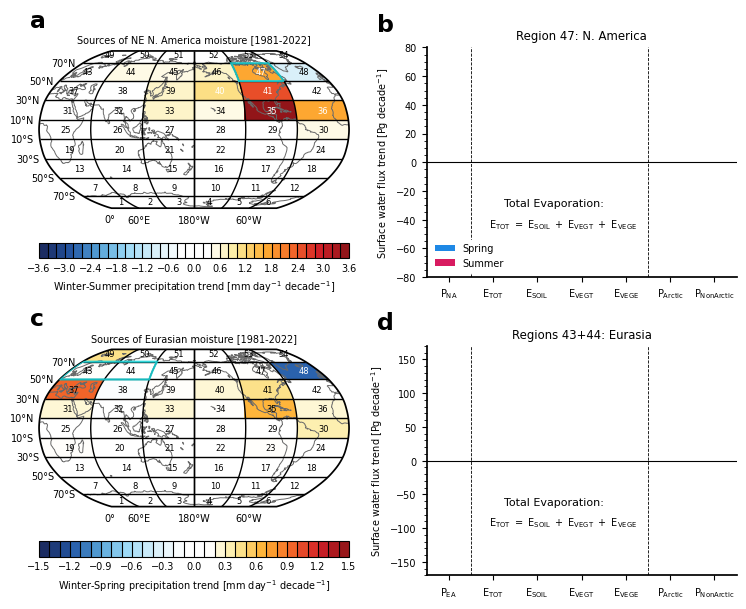

In [186]:
fig = plt.figure(figsize=(7.5,6))

# Panel 1--------------------------------------------------
ax = fig.add_subplot(221,projection=ccrs.Robinson(central_longitude=180))
#ax = fig.add_axes([0,0.35,0.5,0.35],ccrs.NorthPolarStereo())
#ax.set_extent([-180,180,-90,90],ccrs.PlateCarree())
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')
ax.set_title('Sources of NE N. America moisture [1981-2022]',fontsize=7)

#ax.text(-0.4, 0.25, 'iCESM1', weight='bold',
#        fontsize=17,
#        rotation=0,
#        horizontalalignment='left',
#         verticalalignment='bottom', transform=ax.transAxes)

ax.text(-0.03, 1.12, 'a', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)


num_rows = 9
num_cols = 6

# Generate evenly spaced squares in a grid
cnt = 1
for i in range(num_rows):
    for j in range(num_cols):
        lon1 = 0 + j * (360 / num_cols)
        lat1 = -90 + i * (180 / num_rows)
        lon2 = lon1 + (360 / num_cols)
        lat2 = lat1 + (180 / num_rows)

        square = {'name': f'{cnt}', 'coords': (lon1, lat1, lon2, lat2)}

        # Plot the squares
        rectangle = Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, edgecolor='None', facecolor='none')
        ax.add_patch(rectangle)
        if abs(nr_diff_values[i,j]) >= 1:
            if cnt >= 49:
                ax.text(lon1+25, lat2-20, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
            else:
                ax.text(lon1+25, lat2-15, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        else:
            ax.text(lon1+25, lat2-15, square['name'], color='black', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        cnt += 1

# Create a grid of values corresponding to the squares
x = np.linspace(0, 360, num_cols + 1)
y = np.linspace(-90, 90, num_rows + 1)
X, Y = np.meshgrid(x, y)
Z = np.random.rand(num_rows, num_cols)  # Replace this with your actual data

# Plot the pcolormesh grid with the specified colormap and normalization
#norm = BoundaryNorm(boundaries, new_cmap.N, clip=True)

cmap = colormaps.BlueWhiteOrangeRed
levels = np.arange(-3.6,3.61,step=0.2)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

#new_cmap = LinearSegmentedColormap('RdYlBu_r', cmap['levels'])
#contour = ax.pcolormesh(X, Y, 1000*r_diff_values, cmap=new_cmap, shading='auto', 
#                        transform=ccrs.PlateCarree(), alpha=1.0,norm=norm)
p = ax.pcolormesh(X, Y, nr_diff_values, 
                        cmap=cmap,
                        #shading='auto', 
                        alpha=1.0, 
                        norm=norm,
                        transform=ccrs.PlateCarree(),
                       )
# Colorbar

#cax = fig.add_axes([0.1,0.05,0.35,0.01])
cb = plt.colorbar(p,orientation='horizontal', 
                  drawedges=True,
                  ticks=levels[::3]
                 )

#cb.set_ticklabels(f'{levels:0.02f}') #[::3])
cb.set_label(r'Winter-Summer precipitation trend [mm $\mathrm{day^{-1}\ decade^{-1}}$]')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)
cb.ax.minorticks_off()

#cax2 = cax.twinx()

#cax2.set_ylim(0.1,1)
#cax2.set_yticks(iticks)
#cax2.set_yticklabels(1./iticks)
#cax2.set_ylabel(r'Contribution to Arctic WV trend [g $\mathrm{kg^{-1}\ decade^{-1}}$]')

ax.spines['geo'].set_linewidth(1.25)

# Colorbar
colorbar_position = cb.ax.get_position()

ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1.0,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='k', 
                  linestyle='-', alpha=1.0)
gl.top_labels = False  # Turn off top labels
gl.left_labels = True  # Turn off left labels
gl.right_labels = False  # Turn off left labels
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -70, -50, -30, -10, 10, 30, 50, 70, 90])

ax.add_patch(mpatches.Rectangle(xy=[-120, 50], width=60, height=20,
                                    facecolor='none',
                                    edgecolor='#1CDADE',
                                    #linestyle='--',
                                    linewidth=1.5,
                                    zorder=103,
                                    alpha=0.85,
                                    transform=ccrs.PlateCarree())
                 )

# Panel 2--------------------------------------------------
ax = fig.add_subplot(223,projection=ccrs.Robinson(central_longitude=180))
#ax = fig.add_axes([0,0.35,0.5,0.35],ccrs.NorthPolarStereo())
#ax.set_extent([-180,180,-90,90],ccrs.PlateCarree())
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')
ax.set_title('Sources of Eurasian moisture [1981-2022]',fontsize=7)

#ax.text(-0.4, 0.25, 'iCESM1', weight='bold',
#        fontsize=17,
#        rotation=0,
#        horizontalalignment='left',
#         verticalalignment='bottom', transform=ax.transAxes)

ax.text(-0.03, 1.12, 'c', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

num_rows = 9
num_cols = 6

# Generate evenly spaced squares in a grid
cnt = 1
for i in range(num_rows):
    for j in range(num_cols):
        lon1 = 0 + j * (360 / num_cols)
        lat1 = -90 + i * (180 / num_rows)
        lon2 = lon1 + (360 / num_cols)
        lat2 = lat1 + (180 / num_rows)

        square = {'name': f'{cnt}', 'coords': (lon1, lat1, lon2, lat2)}

        # Plot the squares
        rectangle = Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, edgecolor='None', facecolor='none')
        ax.add_patch(rectangle)
        if abs(er_diff_values[i,j]) >= 1:
            if cnt >= 49:
                print(cnt)
                ax.text(lon1+25, lat2-30, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
            else:
                ax.text(lon1+25, lat2-15, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        else:
            ax.text(lon1+25, lat2-15, square['name'], color='black', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        cnt += 1

# Create a grid of values corresponding to the squares
x = np.linspace(0, 360, num_cols + 1)
y = np.linspace(-90, 90, num_rows + 1)
X, Y = np.meshgrid(x, y)
Z = np.random.rand(num_rows, num_cols)  # Replace this with your actual data

# Plot the pcolormesh grid with the specified colormap and normalization
#norm = BoundaryNorm(boundaries, new_cmap.N, clip=True)

#cmap = colormaps.BlueWhiteOrangeRed
#levels = np.arange(-0.6,0.61,step=0.05)
#norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

#new_cmap = LinearSegmentedColormap('RdYlBu_r', cmap['levels'])
#contour = ax.pcolormesh(X, Y, 1000*r_diff_values, cmap=new_cmap, shading='auto', 
#                        transform=ccrs.PlateCarree(), alpha=1.0,norm=norm)
cmap = colormaps.BlueWhiteOrangeRed
levels = np.arange(-1.5,1.51,step=0.1)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

p = ax.pcolormesh(X, Y, er_diff_values, 
                        cmap=cmap,
                        #shading='auto', 
                        alpha=1.0, 
                        norm=norm,
                        transform=ccrs.PlateCarree(),
                       )
# Colorbar

#cax = fig.add_axes([0.1,0.05,0.35,0.01])
cb = plt.colorbar(p,orientation='horizontal', 
                  drawedges=True,
                  ticks=levels[::3]
                 )

#cb.set_ticklabels(f'{levels:0.02f}') #[::3])
cb.set_label(r'Winter-Spring precipitation trend [mm $\mathrm{day^{-1}\ decade^{-1}}$]')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)
cb.ax.minorticks_off()

#cax2 = cax.twinx()

#cax2.set_ylim(0.1,1)
#cax2.set_yticks(iticks)
#cax2.set_yticklabels(1./iticks)
#cax2.set_ylabel(r'Contribution to Arctic WV trend [g $\mathrm{kg^{-1}\ decade^{-1}}$]')

ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1.0,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='k', 
                  linestyle='-', alpha=1.0)
gl.top_labels = False  # Turn off top labels
gl.left_labels = True  # Turn off left labels
gl.right_labels = False  # Turn off left labels
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -70, -50, -30, -10, 10, 30, 50, 70, 90])

ax.add_patch(mpatches.Rectangle(xy=[0, 50], width=120, height=20,
                                    facecolor='none',
                                    edgecolor='#1CDADE',
                                    linestyle='-',
                                    linewidth=1.5,
                                    zorder=103,
                                    alpha=0.85,
                                    transform=ccrs.PlateCarree())
                 )

# Panel 1--------------------------------------------------
# Create a custom RdYlBu colormap with white in the middle
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = 7
mpl.rcParams['hatch.color'] = 'silver'

bar_width=0.8

## Panel 1 --------------------------------------------------
ax = fig.add_subplot(224)
ax.set_xlim([0,14])
ax.set_ylim([-170,170])
ax.set_ylabel(r'Surface water flux trend [Pg $\mathrm{decade^{-1}}$]')
#ax.set_xlabel('year')
ax.set_title('Regions 43+44: Eurasia')
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.25)
ax.spines[['right', 'top']].set_visible(False)
#ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.set_xticks(np.arange(1,15,step=2))

params = {'mathtext.default': 'regular' }  # Allows tex-style title & labels
plt.rcParams.update(params)

ax.set_xticklabels([r'$P_{EA}$',
                    r'$E_{TOT}$',
                    r'$E_{SOIL}$',
                    r'$E_{VEGT}$',
                    r'$E_{VEGE}$',
                    r'$P_{Arctic}$',
                    r'$P_{NonArctic}$',
                   ])
    
ax.text(-0.16, 1.05, 'd', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.bar(np.arange(1,15,step=2)-0.4,
       [winter_sum_trend(area_sum(qrain['RAIN']+qsnow['SNOW'])/1.0E15*10000*ndays2).values,
        winter_sum_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000*ndays2).values,
        winter_sum_trend(area_sum(qsoil['QSOIL'])/1.0E15*10000*ndays2).values,
        winter_sum_trend(area_sum(qvegt['QVEGT'])/1.0E15*10000*ndays2).values,
        winter_sum_trend(area_sum(qvege['QVEGE'])/1.0E15*10000*ndays2).values,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermana.sum('levgrnd').slope/1.0E15*10000,
        winter_sum_trend(arctic_sum((prec43+prec44).sum('prec')*1000)/1.0E15*10000*ndays2).values,
        winter_sum_trend(non_arctic_sum((prec43+prec44).sum('prec')*1000)/1.0E15*10000*ndays2).values,
       ],
        color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Spring',
       
      )


ax.bar(np.arange(1,15,step=2)+0.4,
       [summer_sum_trend(area_sum(qrain['RAIN']+qsnow['SNOW'])/1.0E15*10000*91).values,
        summer_sum_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000*91).values,
        summer_sum_trend(area_sum(qsoil['QSOIL'])/1.0E15*10000*91).values,
        summer_sum_trend(area_sum(qvegt['QVEGT'])/1.0E15*10000*91).values,
        summer_sum_trend(area_sum(qvege['QVEGE'])/1.0E15*10000*91).values,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermanas.sum('levgrnd').slope/1.0E15*10000,
        summer_sum_trend(arctic_sum((prec43+prec44).sum('prec')*1000)/1.0E15*10000*91).values,
        summer_sum_trend(non_arctic_sum((prec43+prec44).sum('prec')*1000)/1.0E15*10000*91).values,
       ],
        color='#D81B60', ##1E88E5
        width=bar_width,
       label='Summer'
       
      )


"""
ax2 = ax.twinx()
ax2.set_ylim([-0.35,0.35])
ax2.set_ylabel(r'VPD trend [hPa $\mathrm{decade^{-1}}$]')
ax2.yaxis.set_minor_locator(MultipleLocator(0.02))
#ax2.set_ylim()
for axis in ['bottom','right']:
    ax2.spines[axis].set_linewidth(1.25)
ax2.spines[['left', 'top']].set_visible(False)

ax2.bar([12.6],(irsvpm-irvpm)*10,
       color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Spring',
      )

ax2.bar([13.4],(irsvp-irvp)*10,
       color='#D81B60', ##1E88E5,
        width=bar_width,
        label='Spring',
      )
"""

ax.text(0.25, 0.3, 'Total Evaporation:',
        fontsize=8,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.text(0.2, 0.2, r'$E_{TOT}\ =\ E_{SOIL}\ +\ E_{VEGT}\ +\ E_{VEGE}$',
        fontsize=7,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

#plt.legend(frameon=False,loc='best')

ax.axvline(2,linestyle='--',c='k',linewidth=0.6)
ax.axvline(10,linestyle='--',c='k',linewidth=0.6)
ax.axhline(0,linestyle='-',c='k',linewidth=0.8)

#===========================================================
## North America
#===========================================================

## Panel 1 --------------------------------------------------
ax = fig.add_subplot(222)
ax.set_xlim([0,14])
ax.set_ylim([-80,80])
#ax.set_ylabel('Summer')
ax.set_ylabel(r'Surface water flux trend [Pg $\mathrm{decade^{-1}}$]')
#ax.set_xlabel('year')
ax.set_title('Region 47: N. America')
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.25)
ax.spines[['right', 'top']].set_visible(False)
#ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.set_xticks(np.arange(1,15,step=2))

params = {'mathtext.default': 'regular' }  # Allows tex-style title & labels
plt.rcParams.update(params)

ax.set_xticklabels([r'$P_{NA}$',
                    r'$E_{TOT}$',
                    r'$E_{SOIL}$',
                    r'$E_{VEGT}$',
                    r'$E_{VEGE}$',
                    r'$P_{Arctic}$',
                    r'$P_{NonArctic}$',
                   ])
    
ax.text(-0.16, 1.05, 'b', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.bar(np.arange(1,15,step=2)-0.4,
       [winter_sum_trend(na_sum(qrain['RAIN']+qsnow['SNOW'])/1.0E15*10000*ndays2).values,
        winter_sum_trend(na_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000*ndays2).values,
        winter_sum_trend(na_sum(qsoil['QSOIL'])/1.0E15*10000*ndays2).values,
        winter_sum_trend(na_sum(qvegt['QVEGT'])/1.0E15*10000*ndays2).values,
        winter_sum_trend(na_sum(qvege['QVEGE'])/1.0E15*10000*ndays2).values,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermana.sum('levgrnd').slope/1.0E15*10000,
        winter_sum_trend(arctic_sum(prec47.sum('prec')*1000)/1.0E15*10000*ndays2).values,
        winter_sum_trend(non_arctic_sum(prec47.sum('prec')*1000)/1.0E15*10000*ndays2).values,
       ],
        color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Spring',
       
      )


ax.bar(np.arange(1,15,step=2)+0.4,
       [summer_sum_trend(na_sum(qrain['RAIN']+qsnow['SNOW'])/1.0E15*10000*91).values,
        summer_sum_trend(na_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000*91).values,
        summer_sum_trend(na_sum(qsoil['QSOIL'])/1.0E15*10000*91).values,
        summer_sum_trend(na_sum(qvegt['QVEGT'])/1.0E15*10000*91).values,
        summer_sum_trend(na_sum(qvege['QVEGE'])/1.0E15*10000*91).values,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermanas.sum('levgrnd').slope/1.0E15*10000,
        summer_sum_trend(arctic_sum(prec47.sum('prec')*1000)/1.0E15*10000*91).values,
        summer_sum_trend(non_arctic_sum(prec47.sum('prec')*1000)/1.0E15*10000*91).values,
       ],
        color='#D81B60', ##1E88E5
        width=bar_width,
       label='Summer'
       
      )


"""
ax2 = ax.twinx()
ax2.set_ylim([-0.35,0.35])
ax2.set_ylabel(r'VPD trend [hPa $\mathrm{decade^{-1}}$]')
ax2.yaxis.set_minor_locator(MultipleLocator(0.02))
#ax2.set_ylim()
for axis in ['bottom','right']:
    ax2.spines[axis].set_linewidth(1.25)
ax2.spines[['left', 'top']].set_visible(False)

ax2.bar([12.6],(irsvpnam-irvpnam)*10,
       color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Winter-Spring',
      )

ax2.bar([13.4],(irsvpna-irvpna)*10,
       color='#D81B60', ##1E88E5,
        width=bar_width,
        label='Summer',
      )
"""

ax.text(0.25, 0.3, 'Total Evaporation:',
        fontsize=8,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.text(0.2, 0.2, r'$E_{TOT}\ =\ E_{SOIL}\ +\ E_{VEGT}\ +\ E_{VEGE}$',
        fontsize=7,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

plt.legend(frameon=True,loc='lower left',edgecolor='white',framealpha=1.0)

ax.axvline(2,linestyle='--',c='k',linewidth=0.6)
ax.axvline(10,linestyle='--',c='k',linewidth=0.6)
#ax.axvline(0,linestyle='--',c='k',linewidth=0.8)
ax.axhline(0,linestyle='-',c='k',linewidth=0.8)

fig.subplots_adjust(top=0.92,bottom=0.04,left=0.05,right=0.98,hspace=0.3,wspace=0.25)
fig.savefig('./plots/moisture_tagging-figure_2-supp-evap_fluxes2.png',dpi=600)

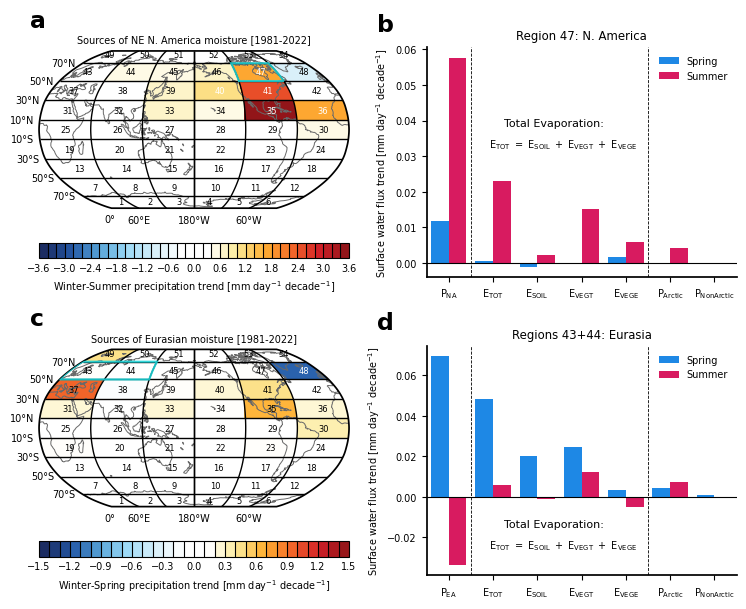

In [187]:
fig = plt.figure(figsize=(7.5,6))

# Panel 1--------------------------------------------------
ax = fig.add_subplot(221,projection=ccrs.Robinson(central_longitude=180))
#ax = fig.add_axes([0,0.35,0.5,0.35],ccrs.NorthPolarStereo())
#ax.set_extent([-180,180,-90,90],ccrs.PlateCarree())
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')
ax.set_title('Sources of NE N. America moisture [1981-2022]',fontsize=7)

#ax.text(-0.4, 0.25, 'iCESM1', weight='bold',
#        fontsize=17,
#        rotation=0,
#        horizontalalignment='left',
#         verticalalignment='bottom', transform=ax.transAxes)

ax.text(-0.03, 1.12, 'a', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)


num_rows = 9
num_cols = 6

# Generate evenly spaced squares in a grid
cnt = 1
for i in range(num_rows):
    for j in range(num_cols):
        lon1 = 0 + j * (360 / num_cols)
        lat1 = -90 + i * (180 / num_rows)
        lon2 = lon1 + (360 / num_cols)
        lat2 = lat1 + (180 / num_rows)

        square = {'name': f'{cnt}', 'coords': (lon1, lat1, lon2, lat2)}

        # Plot the squares
        rectangle = Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, edgecolor='None', facecolor='none')
        ax.add_patch(rectangle)
        if abs(nr_diff_values[i,j]) >= 1:
            if cnt >= 49:
                ax.text(lon1+25, lat2-20, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
            else:
                ax.text(lon1+25, lat2-15, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        else:
            ax.text(lon1+25, lat2-15, square['name'], color='black', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        cnt += 1

# Create a grid of values corresponding to the squares
x = np.linspace(0, 360, num_cols + 1)
y = np.linspace(-90, 90, num_rows + 1)
X, Y = np.meshgrid(x, y)
Z = np.random.rand(num_rows, num_cols)  # Replace this with your actual data

# Plot the pcolormesh grid with the specified colormap and normalization
#norm = BoundaryNorm(boundaries, new_cmap.N, clip=True)

cmap = colormaps.BlueWhiteOrangeRed
levels = np.arange(-3.6,3.61,step=0.2)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

#new_cmap = LinearSegmentedColormap('RdYlBu_r', cmap['levels'])
#contour = ax.pcolormesh(X, Y, 1000*r_diff_values, cmap=new_cmap, shading='auto', 
#                        transform=ccrs.PlateCarree(), alpha=1.0,norm=norm)
p = ax.pcolormesh(X, Y, nr_diff_values, 
                        cmap=cmap,
                        #shading='auto', 
                        alpha=1.0, 
                        norm=norm,
                        transform=ccrs.PlateCarree(),
                       )
# Colorbar

#cax = fig.add_axes([0.1,0.05,0.35,0.01])
cb = plt.colorbar(p,orientation='horizontal', 
                  drawedges=True,
                  ticks=levels[::3]
                 )

#cb.set_ticklabels(f'{levels:0.02f}') #[::3])
cb.set_label(r'Winter-Summer precipitation trend [mm $\mathrm{day^{-1}\ decade^{-1}}$]')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)
cb.ax.minorticks_off()

#cax2 = cax.twinx()

#cax2.set_ylim(0.1,1)
#cax2.set_yticks(iticks)
#cax2.set_yticklabels(1./iticks)
#cax2.set_ylabel(r'Contribution to Arctic WV trend [g $\mathrm{kg^{-1}\ decade^{-1}}$]')

ax.spines['geo'].set_linewidth(1.25)

# Colorbar
colorbar_position = cb.ax.get_position()

ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1.0,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='k', 
                  linestyle='-', alpha=1.0)
gl.top_labels = False  # Turn off top labels
gl.left_labels = True  # Turn off left labels
gl.right_labels = False  # Turn off left labels
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -70, -50, -30, -10, 10, 30, 50, 70, 90])

ax.add_patch(mpatches.Rectangle(xy=[-120, 50], width=60, height=20,
                                    facecolor='none',
                                    edgecolor='#1CDADE',
                                    #linestyle='--',
                                    linewidth=1.5,
                                    zorder=103,
                                    alpha=0.85,
                                    transform=ccrs.PlateCarree())
                 )

# Panel 2--------------------------------------------------
ax = fig.add_subplot(223,projection=ccrs.Robinson(central_longitude=180))
#ax = fig.add_axes([0,0.35,0.5,0.35],ccrs.NorthPolarStereo())
#ax.set_extent([-180,180,-90,90],ccrs.PlateCarree())
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')
ax.set_title('Sources of Eurasian moisture [1981-2022]',fontsize=7)

#ax.text(-0.4, 0.25, 'iCESM1', weight='bold',
#        fontsize=17,
#        rotation=0,
#        horizontalalignment='left',
#         verticalalignment='bottom', transform=ax.transAxes)

ax.text(-0.03, 1.12, 'c', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

num_rows = 9
num_cols = 6

# Generate evenly spaced squares in a grid
cnt = 1
for i in range(num_rows):
    for j in range(num_cols):
        lon1 = 0 + j * (360 / num_cols)
        lat1 = -90 + i * (180 / num_rows)
        lon2 = lon1 + (360 / num_cols)
        lat2 = lat1 + (180 / num_rows)

        square = {'name': f'{cnt}', 'coords': (lon1, lat1, lon2, lat2)}

        # Plot the squares
        rectangle = Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, edgecolor='None', facecolor='none')
        ax.add_patch(rectangle)
        if abs(er_diff_values[i,j]) >= 1:
            if cnt >= 49:
                print(cnt)
                ax.text(lon1+25, lat2-30, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
            else:
                ax.text(lon1+25, lat2-15, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        else:
            ax.text(lon1+25, lat2-15, square['name'], color='black', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        cnt += 1

# Create a grid of values corresponding to the squares
x = np.linspace(0, 360, num_cols + 1)
y = np.linspace(-90, 90, num_rows + 1)
X, Y = np.meshgrid(x, y)
Z = np.random.rand(num_rows, num_cols)  # Replace this with your actual data

# Plot the pcolormesh grid with the specified colormap and normalization
#norm = BoundaryNorm(boundaries, new_cmap.N, clip=True)

#cmap = colormaps.BlueWhiteOrangeRed
#levels = np.arange(-0.6,0.61,step=0.05)
#norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

#new_cmap = LinearSegmentedColormap('RdYlBu_r', cmap['levels'])
#contour = ax.pcolormesh(X, Y, 1000*r_diff_values, cmap=new_cmap, shading='auto', 
#                        transform=ccrs.PlateCarree(), alpha=1.0,norm=norm)
cmap = colormaps.BlueWhiteOrangeRed
levels = np.arange(-1.5,1.51,step=0.1)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

p = ax.pcolormesh(X, Y, er_diff_values, 
                        cmap=cmap,
                        #shading='auto', 
                        alpha=1.0, 
                        norm=norm,
                        transform=ccrs.PlateCarree(),
                       )
# Colorbar

#cax = fig.add_axes([0.1,0.05,0.35,0.01])
cb = plt.colorbar(p,orientation='horizontal', 
                  drawedges=True,
                  ticks=levels[::3]
                 )

#cb.set_ticklabels(f'{levels:0.02f}') #[::3])
cb.set_label(r'Winter-Spring precipitation trend [mm $\mathrm{day^{-1}\ decade^{-1}}$]')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)
cb.ax.minorticks_off()

#cax2 = cax.twinx()

#cax2.set_ylim(0.1,1)
#cax2.set_yticks(iticks)
#cax2.set_yticklabels(1./iticks)
#cax2.set_ylabel(r'Contribution to Arctic WV trend [g $\mathrm{kg^{-1}\ decade^{-1}}$]')

ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1.0,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='k', 
                  linestyle='-', alpha=1.0)
gl.top_labels = False  # Turn off top labels
gl.left_labels = True  # Turn off left labels
gl.right_labels = False  # Turn off left labels
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -70, -50, -30, -10, 10, 30, 50, 70, 90])

ax.add_patch(mpatches.Rectangle(xy=[0, 50], width=120, height=20,
                                    facecolor='none',
                                    edgecolor='#1CDADE',
                                    linestyle='-',
                                    linewidth=1.5,
                                    zorder=103,
                                    alpha=0.85,
                                    transform=ccrs.PlateCarree())
                 )

# Panel 1--------------------------------------------------
# Create a custom RdYlBu colormap with white in the middle
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = 7
mpl.rcParams['hatch.color'] = 'silver'

bar_width=0.8

## Panel 1 --------------------------------------------------
ax = fig.add_subplot(224)
ax.set_xlim([0,14])
#ax.set_ylim([-200,200])
ax.set_ylabel(r'Surface water flux trend [mm $\mathrm{day^{-1}\ decade^{-1}}$]')
#ax.set_xlabel('year')
ax.set_title('Regions 43+44: Eurasia')
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.25)
ax.spines[['right', 'top']].set_visible(False)
#ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.set_xticks(np.arange(1,15,step=2))

params = {'mathtext.default': 'regular' }  # Allows tex-style title & labels
plt.rcParams.update(params)

ax.set_xticklabels([r'$P_{EA}$',
                    r'$E_{TOT}$',
                    r'$E_{SOIL}$',
                    r'$E_{VEGT}$',
                    r'$E_{VEGE}$',
                    r'$P_{Arctic}$',
                    r'$P_{NonArctic}$',
                   ])
    
ax.text(-0.16, 1.05, 'd', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.bar(np.arange(1,15,step=2)-0.4,
       #(winter_mean_trend(na_sum((qrain['RAIN']+qsnow['SNOW'])/1000))/1.0E06).values*10
       [(winter_sum_trend(area_mean((qrain['RAIN']+qsnow['SNOW'])))).values*10*86400,
        (winter_sum_trend(area_mean((qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])))).values*10*86400,
        (winter_sum_trend(area_mean((qsoil['QSOIL'])))).values*10*86400,
        (winter_sum_trend(area_mean((qvegt['QVEGT'])))).values*10*86400,
        (winter_sum_trend(area_mean((qvege['QVEGE'])))).values*10*86400,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermana.sum('levgrnd').slope/1.0E15*10000,
        (winter_sum_trend(arctic_mean((prec43+prec44).sum('prec')*1000))).values*10*86400,
        (winter_sum_trend(non_arctic_mean((prec43+prec44).sum('prec')*1000))).values*10*86400,
       ],
        color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Spring',
       
      )


ax.bar(np.arange(1,15,step=2)+0.4,
       [(summer_mean_trend(area_mean((qrain['RAIN']+qsnow['SNOW'])))).values*10*86400,
        (summer_mean_trend(area_mean((qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])))).values*10*86400,
        (summer_mean_trend(area_mean((qsoil['QSOIL'])))).values*10*86400,
        (summer_mean_trend(area_mean((qvegt['QVEGT'])))).values*10*86400,
        (summer_mean_trend(area_mean((qvege['QVEGE'])))).values*10*86400,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermana.sum('levgrnd').slope/1.0E15*10000,
        (summer_mean_trend(arctic_mean((prec43+prec44).sum('prec')*1000))).values*10*86400,
        (summer_mean_trend(non_arctic_mean((prec43+prec44).sum('prec')*1000))).values*10*86400,
       ],
        color='#D81B60', ##1E88E5
        width=bar_width,
       label='Summer'
       
      )


"""
ax2 = ax.twinx()
ax2.set_ylim([-0.35,0.35])
ax2.set_ylabel(r'VPD trend [hPa $\mathrm{decade^{-1}}$]')
ax2.yaxis.set_minor_locator(MultipleLocator(0.02))
#ax2.set_ylim()
for axis in ['bottom','right']:
    ax2.spines[axis].set_linewidth(1.25)
ax2.spines[['left', 'top']].set_visible(False)

ax2.bar([12.6],(irsvpm-irvpm)*10,
       color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Spring',
      )

ax2.bar([13.4],(irsvp-irvp)*10,
       color='#D81B60', ##1E88E5,
        width=bar_width,
        label='Spring',
      )
"""

ax.text(0.25, 0.2, 'Total Evaporation:',
        fontsize=8,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.text(0.2, 0.1, r'$E_{TOT}\ =\ E_{SOIL}\ +\ E_{VEGT}\ +\ E_{VEGE}$',
        fontsize=7,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

plt.legend(frameon=True,loc='upper right',edgecolor='white',framealpha=1.0)

ax.axvline(2,linestyle='--',c='k',linewidth=0.6)
ax.axvline(10,linestyle='--',c='k',linewidth=0.6)
ax.axhline(0,linestyle='-',c='k',linewidth=0.8)

#===========================================================
## North America
#===========================================================

## Panel 1 --------------------------------------------------
ax = fig.add_subplot(222)
ax.set_xlim([0,14])
#ax.set_ylim([-120,120])
#ax.set_ylabel('Summer')
ax.set_ylabel(r'Surface water flux trend [mm $\mathrm{day^{-1}\ decade^{-1}}$]')
#ax.set_xlabel('year')
ax.set_title('Region 47: N. America')
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.25)
ax.spines[['right', 'top']].set_visible(False)
#ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.set_xticks(np.arange(1,15,step=2))

params = {'mathtext.default': 'regular' }  # Allows tex-style title & labels
plt.rcParams.update(params)

ax.set_xticklabels([r'$P_{NA}$',
                    r'$E_{TOT}$',
                    r'$E_{SOIL}$',
                    r'$E_{VEGT}$',
                    r'$E_{VEGE}$',
                    r'$P_{Arctic}$',
                    r'$P_{NonArctic}$',
                   ])
    
ax.text(-0.16, 1.05, 'b', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.bar(np.arange(1,15,step=2)-0.4,
       #(winter_mean_trend(na_sum((qrain['RAIN']+qsnow['SNOW'])/1000))/1.0E06).values*10
       [(winter_mean_trend(na_mean((qrain['RAIN']+qsnow['SNOW'])))).values*10*86400,
        (winter_mean_trend(na_mean((qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])))).values*10*86400,
        (winter_mean_trend(na_mean((qsoil['QSOIL'])))).values*10*86400,
        (winter_mean_trend(na_mean((qvegt['QVEGT'])))).values*10*86400,
        (winter_mean_trend(na_mean((qvege['QVEGE'])))).values*10*86400,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermana.sum('levgrnd').slope/1.0E15*10000,
        (winter_mean_trend(arctic_mean(prec47.sum('prec')*1000))).values*10*86400,
        (winter_mean_trend(non_arctic_mean(prec47.sum('prec')*1000))).values*10*86400,
       ],
        color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Spring',
       
      )


ax.bar(np.arange(1,15,step=2)+0.4,
       [(summer_mean_trend(na_mean((qrain['RAIN']+qsnow['SNOW'])))).values*10*86400,
        (summer_mean_trend(na_mean((qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])))).values*10*86400,
        (summer_mean_trend(na_mean((qsoil['QSOIL'])))).values*10*86400,
        (summer_mean_trend(na_mean((qvegt['QVEGT'])))).values*10*86400,
        (summer_mean_trend(na_mean((qvege['QVEGE'])))).values*10*86400,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermana.sum('levgrnd').slope/1.0E15*10000,
        (summer_mean_trend(arctic_mean(prec47.sum('prec')*1000))).values*10*86400,
        (summer_mean_trend(non_arctic_mean(prec47.sum('prec')*1000))).values*10*86400,
       ],
        color='#D81B60', ##1E88E5
        width=bar_width,
       label='Summer'
       
      )


"""
ax2 = ax.twinx()
ax2.set_ylim([-0.35,0.35])
ax2.set_ylabel(r'VPD trend [hPa $\mathrm{decade^{-1}}$]')
ax2.yaxis.set_minor_locator(MultipleLocator(0.02))
#ax2.set_ylim()
for axis in ['bottom','right']:
    ax2.spines[axis].set_linewidth(1.25)
ax2.spines[['left', 'top']].set_visible(False)

ax2.bar([12.6],(irsvpnam-irvpnam)*10,
       color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Winter-Spring',
      )

ax2.bar([13.4],(irsvpna-irvpna)*10,
       color='#D81B60', ##1E88E5,
        width=bar_width,
        label='Summer',
      )
"""

ax.text(0.25, 0.65, 'Total Evaporation:',
        fontsize=8,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.text(0.2, 0.55, r'$E_{TOT}\ =\ E_{SOIL}\ +\ E_{VEGT}\ +\ E_{VEGE}$',
        fontsize=7,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

plt.legend(frameon=True,loc='upper right',edgecolor='white',framealpha=1.0)

ax.axvline(2,linestyle='--',c='k',linewidth=0.6)
ax.axvline(10,linestyle='--',c='k',linewidth=0.6)
#ax.axvline(0,linestyle='--',c='k',linewidth=0.8)
ax.axhline(0,linestyle='-',c='k',linewidth=0.8)

fig.subplots_adjust(top=0.92,bottom=0.04,left=0.05,right=0.98,hspace=0.3,wspace=0.25)
fig.savefig('./plots/moisture_tagging-figure_2-supp-evap_fluxes-mm_day.png',dpi=600)

In [188]:
print('NA Winter-Spring')

print('P_NA',winter_sum_trend(na_sum(qrain['RAIN']+qsnow['SNOW'])/1.0E15*10000*ndays2).values)
print('ETOT',winter_sum_trend(na_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000*ndays2).values)
print('ESOIL',winter_sum_trend(na_sum(qsoil['QSOIL'])/1.0E15*10000*ndays2).values)
print('EVEGT',winter_sum_trend(na_sum(qvegt['QVEGT'])/1.0E15*10000*ndays2).values)
print('EVEGE',winter_sum_trend(na_sum(qvege['QVEGE'])/1.0E15*10000*ndays2).values)
print('PARC',winter_sum_trend(arctic_sum(prec47.sum('prec')*1000)/1.0E15*10000*ndays2).values)
print('PNARC',winter_sum_trend(non_arctic_sum(prec47.sum('prec')*1000)/1.0E15*10000*ndays2).values)

print('NA Summer')

print('P_NA',summer_sum_trend(na_sum(qrain['RAIN']+qsnow['SNOW'])/1.0E15*10000*90).values)
print('ETOT',summer_sum_trend(na_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10000*90).values)
print('ESOIL',summer_sum_trend(na_sum(qsoil['QSOIL'])/1.0E15*10000*90).values)
print('EVEGT',summer_sum_trend(na_sum(qvegt['QVEGT'])/1.0E15*10000*90).values)
print('EVEGE',summer_sum_trend(na_sum(qvege['QVEGE'])/1.0E15*10000*90).values)
print('PARC',summer_sum_trend(arctic_sum(prec47.sum('prec')*1000)/1.0E15*10000*90).values)
print('PNARC',summer_sum_trend(non_arctic_sum(prec47.sum('prec')*1000)/1.0E15*10000*90).values)

NA Winter-Spring
P_NA 0.0008348318361867025
ETOT 4.131539469164781e-05
ESOIL -7.553143474621204e-05
EVEGT -1.6339311611516197e-06
EVEGE 0.00011848049737454504
PARC 9.849229395104557e-07
PNARC -2.63375422042885e-05
NA Summer
P_NA 0.0004852248975923639
ETOT 0.0001943766631257852
ESOIL 1.7356232850693216e-05
EVEGT 0.00012665767409496048
EVEGE 5.036286817127492e-05
PARC 6.4981967520481e-05
PNARC 8.914923660180025e-06


In [189]:
ndays,ndays2,ndays3

(365, 151, 91)

In [190]:
54100000000000000/1.0E15

54.1

In [191]:
## 1000 kg/m3 

In [192]:
(area_sum(qrain['RAIN']+qsnow['SNOW'])).sel(time=slice('2000-01-01','2000-05-31')).integrate('time')/1.0E15

<xarray.DataArray ()>
array(2.22050872e+09)
Coordinates:
    plev     float64 2e+04

In [193]:
def annual_mean_trend(ds,month1=5):
    #ds_y = ds.where(ds['time.month'] <= month1).dropna('time').groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    #ds_y = ds.where(ds['time.season'] == 'JJA').groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    ds_y = ds.groupby('time.year').mean('time').sel(year=slice(1981,2022))
    
    r = linregress(ds_y,ds_y.year)
    return r.slope

def summer_mean_trend(ds,month1=5):
    #ds_y = ds.where(ds['time.month'] <= month1).dropna('time').groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    #ds_y = ds.where(ds['time.season'] == 'JJA').groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    ds_y = jja(ds).sel(year=slice(1981,2022))
    
    r = linregress(ds_y,ds_y.year)
    return r.slope

def winter_mean_trend(ds,month1=5):
    #ds_y = ds.where(ds['time.month'] <= month1).dropna('time').groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    #ds_y = ds.where(ds['time.season'] == 'JJA').groupby('time.year').sum('time').sel(year=slice(1981,2022)) * 86400
    ds_y = ds.where(ds['time.month'] <= 5).groupby('time.year').mean('time').sel(year=slice(1981,2022))
    
    r = linregress(ds_y,ds_y.year)
    return r.slope

In [194]:
# Mean state convert to km3/yr

print(((global_sum((qrain['RAIN']+qsnow['SNOW'])))/1.0E06).groupby('time.year').mean('time').mean('year').values*10*86400*365/1000/1000/1000)
print((annual_mean_trend(global_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE']))/1.0E06).values*10)

print(((global_sum((prect)*1000))/1.0E06).groupby('time.year').mean('time').mean('year').values*86400*365/1000/1000/1000)
print(((global_sum((qflx['QFLX'])))/1.0E06).groupby('time.year').mean('time').mean('year').values*86400*365/1000/1000/1000)


1317.23993390625
-17.12547316424925
424.434431671875
546.012086625


In [195]:
# Mean state convert to km3/yr

print(((area_sum((qrain['RAIN']+qsnow['SNOW'])))/1.0E06).groupby('time.year').mean('time').mean('year').values*10*86400/1000/1000/1000)
print((annual_mean_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE']))/1.0E06).values*10)

print(((area_sum((prect)*1000))/1.0E06).groupby('time.year').mean('time').mean('year').values*86400/1000/1000/1000)
print(((area_sum((qflx['QFLX'])))/1.0E06).groupby('time.year').mean('time').mean('year').values*86400/1000/1000/1000)


0.22073844726562503
1.0062871793209625
0.02382723896484375
0.01518167021484375


In [196]:
print((arctic_sum(tmq['TMQ'])/1.0E03).mean('time').values/1000/1000/1000/1000)

0.10087361740800001


In [197]:
# mean Sv

print(((global_sum((qrain['RAIN']+qsnow['SNOW'])/1000))/1.0E06).mean('time').values)
print(((global_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1000)/1.0E06).mean('time').values)

print(((area_sum((qrain['RAIN']+qsnow['SNOW'])/1000))/1.0E06).mean('time').values)
print(((area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1000)/1.0E06).mean('time').values)

print(((na_sum((qrain['RAIN']+qsnow['SNOW'])/1000))/1.0E06).mean('time').values)
print(((na_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1000)/1.0E06).mean('time').values)

4.17694
2.9100082
0.2554843
0.15140939
0.13178895
0.06819395


In [198]:
# mean Sv

print(((global_sum((qrain['RAIN']+qsnow['SNOW'])/1000))/1.0E06).mean('time').values)
print(((global_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1000)/1.0E06).mean('time').values)

print(((area_sum((qrain['RAIN']+qsnow['SNOW'])/1000))/1.0E06).mean('time').values)
print(((area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1000)/1.0E06).mean('time').values)

print(((na_sum((qrain['RAIN']+qsnow['SNOW'])/1000))/1.0E06).mean('time').values)
print(((na_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1000)/1.0E06).mean('time').values)

4.17694
2.9100082
0.2554843
0.15140939
0.13178895
0.06819395


In [199]:
print((arctic_sum(tmq['TMQ'])/1.0E03).sel(time=slice('1981-01-01','2022-12-01')).mean('time').values/1000/1000/1000/1000)

print('Diff =',((area_sum((qrain['RAIN']+qsnow['SNOW'])/1000))/1.0E06).sel(time=slice('1981-01-01','2022-12-01')).mean('time').values-((area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1000)/1.0E06).sel(time=slice('1981-01-01','2022-12-01')).mean('time').values)
print('Diff =',((na_sum((qrain['RAIN']+qsnow['SNOW'])/1000))/1.0E06).sel(time=slice('1981-01-01','2022-12-01')).mean('time').values-((na_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1000)/1.0E06).sel(time=slice('1981-01-01','2022-12-01')).mean('time').values)

print('NA',(arctic_sum(-tmq47['TA47V'])/1.0E03).sel(time=slice('1981-01-01','2022-12-01')).mean('time').values/1000/1000/1000/1000)
print('EA',(arctic_sum(-tmq43['TA43V']-tmq44['TA44V'])/1.0E03).sel(time=slice('1981-01-01','2022-12-01')).mean('time').values/1000/1000/1000/1000)



0.10111389696
Diff = 0.10391851
Diff = 0.06350483
NA 0.0006658179686214549
EA 0.0025529954196059452


In [200]:
# Sv trends

print(annual_mean_trend(arctic_sum(tmq['TMQ'])/1.0E03).values/1000/1000/1000/1000)

print('Diff =',annual_mean_trend((area_sum((qrain['RAIN']+qsnow['SNOW'])/1000))/1.0E06).values-annual_mean_trend((area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1000)/1.0E06).values)
print('Diff =',annual_mean_trend((na_sum((qrain['RAIN']+qsnow['SNOW'])/1000))/1.0E06).values-annual_mean_trend((na_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1000)/1.0E06).values)

print('NA',annual_mean_trend(arctic_sum(-tmq47['TA47V'])/1.0E03).values/1000/1000/1000/1000)
print('EA',annual_mean_trend(arctic_sum(-tmq43['TA43V']-tmq44['TA44V'])/1.0E03).values/1000/1000/1000/1000)


0.00035169756727137185
Diff = -0.00020184408042894732
Diff = 0.00018094928364498323
NA 3.1868999171842665e-06
EA 9.828792900987126e-06


In [201]:
# kg/m2/s to Sv

print((annual_mean_trend(area_sum((qrain['RAIN']+qsnow['SNOW'])/1000))/1.0E06).values*10)
print((annual_mean_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1000)/1.0E06).values*10)

print((winter_mean_trend(area_sum((qrain['RAIN']+qsnow['SNOW'])/1000))/1.0E06).values*10)
print((winter_mean_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1000)/1.0E06).values*10)

print((summer_mean_trend(area_sum((qrain['RAIN']+qsnow['SNOW'])/1000))/1.0E06).values*10)
print((summer_mean_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1000)/1.0E06).values*10)

#((global_sum(qflx['QFLX'])/1000).groupby('time.year').mean('time')/1.0E06).plot()

-0.0010121514413337655
0.0010062897177092619
0.0025485775311968237
0.0017783739225447695
-0.006189290753383032
0.0011146263977797584


In [208]:
print('EA Annual')

print('P',annual_sum_trend(area_sum(qrain['RAIN']+qsnow['SNOW'])/1.0E06*10).values)
print('QFLX',annual_sum_trend(area_sum(qflx['QFLX'])/1.0E06*10).values)
print('ETOT',annual_sum_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E15*10).values)
print('ESOIL',annual_sum_trend(area_sum(qsoil['QSOIL'])/1.0E06*10).values)
print('EVEGT',annual_sum_trend(area_sum(qvegt['QVEGT'])/1.0E06*10).values)
print('EVEGE',annual_sum_trend(area_sum(qvege['QVEGE'])/1.0E06*10).values)
print('PARC',annual_sum_trend(arctic_sum((prec43+prec44).sum('prec')*1000)/1.0E06*10).values)
print('PNARC',annual_sum_trend(non_arctic_sum((prec43+prec44).sum('prec')*1000)/1.0E06*10).values)
print('PTOT',annual_sum_trend(global_sum((prec43+prec44).sum('prec')*1000)/1.0E06*10).values)

print('EA Winter-Spring')

print('P',winter_mean_trend(area_sum(qrain['RAIN']+qsnow['SNOW'])/1.0E06*10).values)
print('ETOT',winter_mean_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E06*10).values)
print('ESOIL',winter_mean_trend(area_sum(qsoil['QSOIL'])/1.0E06*10).values)
print('EVEGT',winter_mean_trend(area_sum(qvegt['QVEGT'])/1.0E06*10).values)
print('EVEGE',winter_mean_trend(area_sum(qvege['QVEGE'])/1.0E06*10).values)
print('PARC',winter_mean_trend(arctic_sum((prec43+prec44).sum('prec')*1000)/1.0E06*10).values)
print('PNARC',winter_mean_trend(non_arctic_sum((prec43+prec44).sum('prec')*1000)/1.0E06*10).values)

print('EA Summer')

print('P',summer_mean_trend(area_sum(qrain['RAIN']+qsnow['SNOW'])/1.0E06*10).values)
print('ETOT',summer_mean_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E06*10).values)
print('ESOIL',summer_mean_trend(area_sum(qsoil['QSOIL'])/1.0E06*10).values)
print('EVEGT',summer_mean_trend(area_sum(qvegt['QVEGT'])/1.0E06*10).values)
print('EVEGE',summer_mean_trend(area_sum(qvege['QVEGE'])/1.0E06*10).values)
print('PARC',summer_mean_trend(arctic_sum((prec43+prec44).sum('prec')*1000)/1.0E06*10).values)
print('PNARC',summer_mean_trend(non_arctic_sum((prec43+prec44).sum('prec')*1000)/1.0E06*10).values)

print('EA Fall')

print('P',fall_sum_trend(area_sum(qrain['RAIN']+qsnow['SNOW'])/1.0E06*10).values)
print('ETOT',fall_sum_trend(area_sum(qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])/1.0E06*10).values)
print('ESOIL',fall_sum_trend(area_sum(qsoil['QSOIL'])/1.0E06*10).values)
print('EVEGT',fall_sum_trend(area_sum(qvegt['QVEGT'])/1.0E06*10).values)
print('EVEGE',fall_sum_trend(area_sum(qvege['QVEGE'])/1.0E06*10).values)
print('PARC',fall_sum_trend(arctic_sum((prec43+prec44).sum('prec')*1000)/1.0E06*10).values)
print('PNARC',fall_sum_trend(non_arctic_sum((prec43+prec44).sum('prec')*1000)/1.0E06*10).values)
print('PTOT',fall_sum_trend(global_sum((prec43+prec44).sum('prec')*1000)/1.0E06*10).values)

EA Annual
P -12.145783269437242
QFLX 12.98534072147719
ETOT 1.2075412522249567e-08
ESOIL 3.2449158372624787
EVEGT 11.766770864458413
EVEGE -2.9362412345978344
PARC 4.93839768812419
PNARC -4.288152091478608
PTOT 0.6502687624078273
EA Winter-Spring
P 2.5485787419095898
ETOT 1.7783748044659315
ESOIL 0.7481406359992859
EVEGT 0.907163755538813
EVEGE 0.12306969579813033
PARC 0.15980339003926824
PNARC 0.7903568498725666
EA Summer
P -6.189292903387337
ETOT 1.114626525972875
ESOIL -0.1982413961844664
EVEGT 2.2517906679209547
EVEGE -0.9389234406375663
PARC 1.2820131422277306
PNARC -2.485773432593844
EA Fall
P -2.236272772478426
ETOT -0.12372106099745007
ESOIL -0.021983539311447867
EVEGT 0.15706055439249755
EVEGE -0.2587976804207329
PARC 0.013358378041342175
PNARC -0.3616162232028908
PTOT -0.348257808068633


In [203]:
166.25-48.66-116-8.76

-7.169999999999996

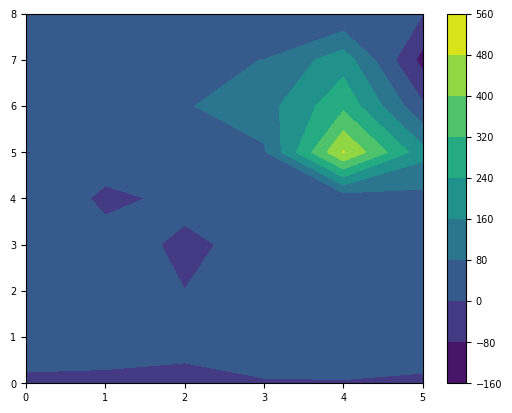

In [204]:
p = plt.contourf(svnr_diff_values)
plt.colorbar(p)

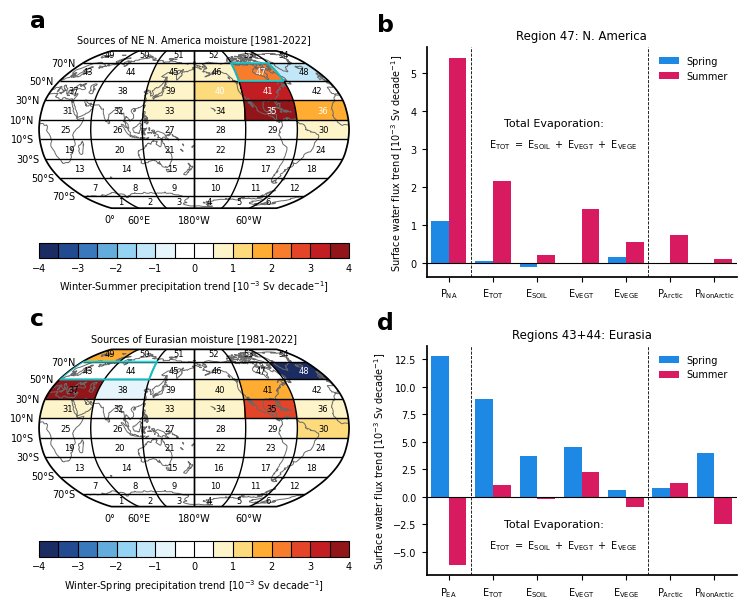

In [205]:
fig = plt.figure(figsize=(7.5,6))

# Panel 1--------------------------------------------------
ax = fig.add_subplot(221,projection=ccrs.Robinson(central_longitude=180))
#ax = fig.add_axes([0,0.35,0.5,0.35],ccrs.NorthPolarStereo())
#ax.set_extent([-180,180,-90,90],ccrs.PlateCarree())
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')
ax.set_title('Sources of NE N. America moisture [1981-2022]',fontsize=7)

#ax.text(-0.4, 0.25, 'iCESM1', weight='bold',
#        fontsize=17,
#        rotation=0,
#        horizontalalignment='left',
#         verticalalignment='bottom', transform=ax.transAxes)

ax.text(-0.03, 1.12, 'a', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)


num_rows = 9
num_cols = 6

# Generate evenly spaced squares in a grid
cnt = 1
for i in range(num_rows):
    for j in range(num_cols):
        lon1 = 0 + j * (360 / num_cols)
        lat1 = -90 + i * (180 / num_rows)
        lon2 = lon1 + (360 / num_cols)
        lat2 = lat1 + (180 / num_rows)

        square = {'name': f'{cnt}', 'coords': (lon1, lat1, lon2, lat2)}

        # Plot the squares
        rectangle = Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, edgecolor='None', facecolor='none')
        ax.add_patch(rectangle)
        if abs(nr_diff_values[i,j]) >= 1:
            if cnt >= 49:
                ax.text(lon1+25, lat2-20, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
            else:
                ax.text(lon1+25, lat2-15, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        else:
            ax.text(lon1+25, lat2-15, square['name'], color='black', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        cnt += 1

# Create a grid of values corresponding to the squares
x = np.linspace(0, 360, num_cols + 1)
y = np.linspace(-90, 90, num_rows + 1)
X, Y = np.meshgrid(x, y)
Z = np.random.rand(num_rows, num_cols)  # Replace this with your actual data

# Plot the pcolormesh grid with the specified colormap and normalization
#norm = BoundaryNorm(boundaries, new_cmap.N, clip=True)

cmap = colormaps.BlueWhiteOrangeRed
levels = np.arange(-0.004,0.0041,step=0.0005)
levels = np.arange(-4,4.1,step=0.5)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

#new_cmap = LinearSegmentedColormap('RdYlBu_r', cmap['levels'])
#contour = ax.pcolormesh(X, Y, 1000*r_diff_values, cmap=new_cmap, shading='auto', 
#                        transform=ccrs.PlateCarree(), alpha=1.0,norm=norm)
p = ax.pcolormesh(X, Y, svnr_diff_values/1.0E06*10*1000, 
                        cmap=cmap,
                        #shading='auto', 
                        alpha=1.0, 
                        norm=norm,
                        transform=ccrs.PlateCarree(),
                       )
# Colorbar

#cax = fig.add_axes([0.1,0.05,0.35,0.01])
cb = plt.colorbar(p,orientation='horizontal', 
                  drawedges=True,
                  #ticks=levels[::3]
                 )

#cb.set_ticklabels(f'{levels:0.02f}') #[::3])
cb.set_label(r'Winter-Summer precipitation trend [$\mathrm{10^{-3}\ Sv\ decade^{-1}}$]')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)
cb.ax.minorticks_off()

#cax2 = cax.twinx()

#cax2.set_ylim(0.1,1)
#cax2.set_yticks(iticks)
#cax2.set_yticklabels(1./iticks)
#cax2.set_ylabel(r'Contribution to Arctic WV trend [g $\mathrm{kg^{-1}\ decade^{-1}}$]')

ax.spines['geo'].set_linewidth(1.25)

# Colorbar
colorbar_position = cb.ax.get_position()

ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1.0,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='k', 
                  linestyle='-', alpha=1.0)
gl.top_labels = False  # Turn off top labels
gl.left_labels = True  # Turn off left labels
gl.right_labels = False  # Turn off left labels
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -70, -50, -30, -10, 10, 30, 50, 70, 90])

ax.add_patch(mpatches.Rectangle(xy=[-120, 50], width=60, height=20,
                                    facecolor='none',
                                    edgecolor='#1CDADE',
                                    #linestyle='--',
                                    linewidth=1.5,
                                    zorder=103,
                                    alpha=0.85,
                                    transform=ccrs.PlateCarree())
                 )

# Panel 2--------------------------------------------------
ax = fig.add_subplot(223,projection=ccrs.Robinson(central_longitude=180))
#ax = fig.add_axes([0,0.35,0.5,0.35],ccrs.NorthPolarStereo())
#ax.set_extent([-180,180,-90,90],ccrs.PlateCarree())
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')
ax.set_title('Sources of Eurasian moisture [1981-2022]',fontsize=7)

#ax.text(-0.4, 0.25, 'iCESM1', weight='bold',
#        fontsize=17,
#        rotation=0,
#        horizontalalignment='left',
#         verticalalignment='bottom', transform=ax.transAxes)

ax.text(-0.03, 1.12, 'c', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

num_rows = 9
num_cols = 6

# Generate evenly spaced squares in a grid
cnt = 1
for i in range(num_rows):
    for j in range(num_cols):
        lon1 = 0 + j * (360 / num_cols)
        lat1 = -90 + i * (180 / num_rows)
        lon2 = lon1 + (360 / num_cols)
        lat2 = lat1 + (180 / num_rows)

        square = {'name': f'{cnt}', 'coords': (lon1, lat1, lon2, lat2)}

        # Plot the squares
        rectangle = Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, edgecolor='None', facecolor='none')
        ax.add_patch(rectangle)
        if abs(er_diff_values[i,j]) >= 1:
            if cnt >= 49:
                print(cnt)
                ax.text(lon1+25, lat2-30, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
            else:
                ax.text(lon1+25, lat2-15, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        else:
            ax.text(lon1+25, lat2-15, square['name'], color='black', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        cnt += 1

# Create a grid of values corresponding to the squares
x = np.linspace(0, 360, num_cols + 1)
y = np.linspace(-90, 90, num_rows + 1)
X, Y = np.meshgrid(x, y)
Z = np.random.rand(num_rows, num_cols)  # Replace this with your actual data

# Plot the pcolormesh grid with the specified colormap and normalization
#norm = BoundaryNorm(boundaries, new_cmap.N, clip=True)

#cmap = colormaps.BlueWhiteOrangeRed
#levels = np.arange(-0.6,0.61,step=0.05)
#norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

#new_cmap = LinearSegmentedColormap('RdYlBu_r', cmap['levels'])
#contour = ax.pcolormesh(X, Y, 1000*r_diff_values, cmap=new_cmap, shading='auto', 
#                        transform=ccrs.PlateCarree(), alpha=1.0,norm=norm)
cmap = colormaps.BlueWhiteOrangeRed
#levels = np.arange(-1.5,1.51,step=0.1)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

p = ax.pcolormesh(X, Y, sver_diff_values*10/1.0E06*1000, 
                        cmap=cmap,
                        #shading='auto', 
                        alpha=1.0, 
                        norm=norm,
                        transform=ccrs.PlateCarree(),
                       )
# Colorbar

#cax = fig.add_axes([0.1,0.05,0.35,0.01])
cb = plt.colorbar(p,orientation='horizontal', 
                  drawedges=True,
                  ticks=levels[::2]
                 )

#cb.set_ticklabels(f'{levels:0.02f}') #[::3])
cb.set_label(r'Winter-Spring precipitation trend [$\mathrm{10^{-3}\ Sv\ decade^{-1}}$]')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)
cb.ax.minorticks_off()

#cax2 = cax.twinx()

#cax2.set_ylim(0.1,1)
#cax2.set_yticks(iticks)
#cax2.set_yticklabels(1./iticks)
#cax2.set_ylabel(r'Contribution to Arctic WV trend [g $\mathrm{kg^{-1}\ decade^{-1}}$]')

ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1.0,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='k', 
                  linestyle='-', alpha=1.0)
gl.top_labels = False  # Turn off top labels
gl.left_labels = True  # Turn off left labels
gl.right_labels = False  # Turn off left labels
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -70, -50, -30, -10, 10, 30, 50, 70, 90])

ax.add_patch(mpatches.Rectangle(xy=[0, 50], width=120, height=20,
                                    facecolor='none',
                                    edgecolor='#1CDADE',
                                    linestyle='-',
                                    linewidth=1.5,
                                    zorder=103,
                                    alpha=0.85,
                                    transform=ccrs.PlateCarree())
                 )

# Panel 1--------------------------------------------------
# Create a custom RdYlBu colormap with white in the middle
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = 7
mpl.rcParams['hatch.color'] = 'silver'

bar_width=0.8

## Panel 1 --------------------------------------------------
ax = fig.add_subplot(224)
ax.set_xlim([0,14])
#ax.set_ylim([-200,200])
ax.set_ylabel(r'Surface water flux trend [$\mathrm{10^{-3}\ Sv\ decade^{-1}}$]')
#ax.set_xlabel('year')
ax.set_title('Regions 43+44: Eurasia')
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.25)
ax.spines[['right', 'top']].set_visible(False)
#ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.set_xticks(np.arange(1,15,step=2))

params = {'mathtext.default': 'regular' }  # Allows tex-style title & labels
plt.rcParams.update(params)

ax.set_xticklabels([r'$P_{EA}$',
                    r'$E_{TOT}$',
                    r'$E_{SOIL}$',
                    r'$E_{VEGT}$',
                    r'$E_{VEGE}$',
                    r'$P_{Arctic}$',
                    r'$P_{NonArctic}$',
                   ])
    
ax.text(-0.16, 1.05, 'd', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.bar(np.arange(1,15,step=2)-0.4,
       #(winter_mean_trend(na_sum((qrain['RAIN']+qsnow['SNOW'])/1000))/1.0E06).values*10
       [(winter_sum_trend(area_sum((qrain['RAIN']+qsnow['SNOW'])))).values*10/1000/1.0E06*1000,
        (winter_sum_trend(area_sum((qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])))).values*10/1000/1.0E06*1000,
        (winter_sum_trend(area_sum((qsoil['QSOIL'])))).values*10/1000/1.0E06*1000,
        (winter_sum_trend(area_sum((qvegt['QVEGT'])))).values*10/1000/1.0E06*1000,
        (winter_sum_trend(area_sum((qvege['QVEGE'])))).values*10/1000/1.0E06*1000,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermana.sum('levgrnd').slope/1.0E15*10000,
        (winter_sum_trend(arctic_sum((prec43+prec44).sum('prec')*1000))).values*10/1000/1.0E06*1000,
        (winter_sum_trend(non_arctic_sum((prec43+prec44).sum('prec')*1000))).values*10/1000/1.0E06*1000,
       ],
        color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Spring',
       
      )


ax.bar(np.arange(1,15,step=2)+0.4,
       [(summer_mean_trend(area_sum((qrain['RAIN']+qsnow['SNOW'])))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(area_sum((qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(area_sum((qsoil['QSOIL'])))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(area_sum((qvegt['QVEGT'])))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(area_sum((qvege['QVEGE'])))).values*10/1000/1.0E06*1000,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermana.sum('levgrnd').slope/1.0E15*10000,
        (summer_mean_trend(arctic_sum((prec43+prec44).sum('prec')*1000))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(non_arctic_sum((prec43+prec44).sum('prec')*1000))).values*10/1000/1.0E06*1000,
       ],
        color='#D81B60', ##1E88E5
        width=bar_width,
       label='Summer'
       
      )


"""
ax2 = ax.twinx()
ax2.set_ylim([-0.35,0.35])
ax2.set_ylabel(r'VPD trend [hPa $\mathrm{decade^{-1}}$]')
ax2.yaxis.set_minor_locator(MultipleLocator(0.02))
#ax2.set_ylim()
for axis in ['bottom','right']:
    ax2.spines[axis].set_linewidth(1.25)
ax2.spines[['left', 'top']].set_visible(False)

ax2.bar([12.6],(irsvpm-irvpm)*10,
       color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Spring',
      )

ax2.bar([13.4],(irsvp-irvp)*10,
       color='#D81B60', ##1E88E5,
        width=bar_width,
        label='Spring',
      )
"""

ax.text(0.25, 0.2, 'Total Evaporation:',
        fontsize=8,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.text(0.2, 0.1, r'$E_{TOT}\ =\ E_{SOIL}\ +\ E_{VEGT}\ +\ E_{VEGE}$',
        fontsize=7,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

plt.legend(frameon=True,loc='upper right',edgecolor='white',framealpha=1.0)

ax.axvline(2,linestyle='--',c='k',linewidth=0.6)
ax.axvline(10,linestyle='--',c='k',linewidth=0.6)
ax.axhline(0,linestyle='-',c='k',linewidth=0.8)

#===========================================================
## North America
#===========================================================

## Panel 1 --------------------------------------------------
ax = fig.add_subplot(222)
ax.set_xlim([0,14])
#ax.set_ylim([-120,120])
#ax.set_ylabel('Summer')
ax.set_ylabel(r'Surface water flux trend [$\mathrm{10^{-3}\ Sv\ decade^{-1}}$]')
#ax.set_xlabel('year')
ax.set_title('Region 47: N. America')
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.25)
ax.spines[['right', 'top']].set_visible(False)
#ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.set_xticks(np.arange(1,15,step=2))

params = {'mathtext.default': 'regular' }  # Allows tex-style title & labels
plt.rcParams.update(params)

ax.set_xticklabels([r'$P_{NA}$',
                    r'$E_{TOT}$',
                    r'$E_{SOIL}$',
                    r'$E_{VEGT}$',
                    r'$E_{VEGE}$',
                    r'$P_{Arctic}$',
                    r'$P_{NonArctic}$',
                   ])
    
ax.text(-0.16, 1.05, 'b', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.bar(np.arange(1,15,step=2)-0.4,
       #(winter_mean_trend(na_sum((qrain['RAIN']+qsnow['SNOW'])/1000))/1.0E06).values*10
       [(winter_mean_trend(na_sum((qrain['RAIN']+qsnow['SNOW'])))).values*10/1000/1.0E06*1000,
        (winter_mean_trend(na_sum((qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])))).values*10/1000/1.0E06*1000,
        (winter_mean_trend(na_sum((qsoil['QSOIL'])))).values*10/1000/1.0E06*1000,
        (winter_mean_trend(na_sum((qvegt['QVEGT'])))).values*10/1000/1.0E06*1000,
        (winter_mean_trend(na_sum((qvege['QVEGE'])))).values*10/1000/1.0E06*1000,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermana.sum('levgrnd').slope/1.0E15*10000,
        (winter_mean_trend(arctic_sum(prec47.sum('prec')*1000))).values*10/1000/1.0E06*1000,
        (winter_mean_trend(non_arctic_sum(prec47.sum('prec')*1000))).values*10/1000/1.0E06*1000,
       ],
        color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Spring',
       
      )


ax.bar(np.arange(1,15,step=2)+0.4,
       [(summer_mean_trend(na_sum((qrain['RAIN']+qsnow['SNOW'])))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(na_sum((qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(na_sum((qsoil['QSOIL'])))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(na_sum((qvegt['QVEGT'])))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(na_sum((qvege['QVEGE'])))).values*10/1000/1.0E06*1000,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        #60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermana.sum('levgrnd').slope/1.0E15*10000,
        (summer_mean_trend(arctic_sum(prec47.sum('prec')*1000))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(non_arctic_sum(prec47.sum('prec')*1000))).values*10/1000/1.0E06*1000,
       ],
        color='#D81B60', ##1E88E5
        width=bar_width,
       label='Summer'
       
      )


"""
ax2 = ax.twinx()
ax2.set_ylim([-0.35,0.35])
ax2.set_ylabel(r'VPD trend [hPa $\mathrm{decade^{-1}}$]')
ax2.yaxis.set_minor_locator(MultipleLocator(0.02))
#ax2.set_ylim()
for axis in ['bottom','right']:
    ax2.spines[axis].set_linewidth(1.25)
ax2.spines[['left', 'top']].set_visible(False)

ax2.bar([12.6],(irsvpnam-irvpnam)*10,
       color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Winter-Spring',
      )

ax2.bar([13.4],(irsvpna-irvpna)*10,
       color='#D81B60', ##1E88E5,
        width=bar_width,
        label='Summer',
      )
"""

ax.text(0.25, 0.65, 'Total Evaporation:',
        fontsize=8,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.text(0.2, 0.55, r'$E_{TOT}\ =\ E_{SOIL}\ +\ E_{VEGT}\ +\ E_{VEGE}$',
        fontsize=7,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

plt.legend(frameon=True,loc='upper right',edgecolor='white',framealpha=1.0)

ax.axvline(2,linestyle='--',c='k',linewidth=0.6)
ax.axvline(10,linestyle='--',c='k',linewidth=0.6)
#ax.axvline(0,linestyle='--',c='k',linewidth=0.8)
ax.axhline(0,linestyle='-',c='k',linewidth=0.8)

fig.subplots_adjust(top=0.92,bottom=0.04,left=0.05,right=0.98,hspace=0.3,wspace=0.25)
fig.savefig('./plots/moisture_tagging-figure_2-supp-evap_fluxes-Sv.png',dpi=600)

## Looking at links between transpiration and precipitation

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_xlim([0,16])
ax.set_ylim([-300,300])
#ax.set_ylabel('Summer')
ax.set_ylabel(r'Surface water flux trend [Pg $\mathrm{decade^{-1}}$]')
#ax.set_xlabel('year')
ax.set_title('Region 47: N. America')
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.25)
ax.spines[['right', 'top']].set_visible(False)
#ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.set_xticks(np.arange(1,17,step=2))

xlabs = [r'$PREC$',
        r'$SOIL_{INFL}$',
        r'$E_{TOT}$',
        r'$E_{SOIL}$',
        r'$E_{VEGT}$',
        r'$E_{VEGE}$',
        'QOVER',
        'RUNOFF',
        'VPD']
xlabs_len = len(xlabs)*2 - 1
print(xlabs_len)
ax.set_xticklabels(xlabs)

ax.bar(np.arange(1,xlabs_len,step=2)-0.4,
       [60*60*24*182*(rqrainna+rqsnowna).slope/1.0E15*10000,
        60*60*24*182*(rinflna).slope/1.0E15*10000,
        -60*60*24*182*((rqsoilna+rvegtna+rvegena).slope)/1.0E15*10000,
        -60*60*24*182*rqsoilna.slope/1.0E15*10000,
        -60*60*24*182*rvegtna.slope/1.0E15*10000,
        -60*60*24*182*rvegena.slope/1.0E15*10000,
        -60*60*24*182*roverna.slope/1.0E15*10000,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermana.sum('levgrnd').slope/1.0E15*10000,
       ],
        color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Spring',
       
      )

ax.bar(np.arange(1,xlabs_len,step=2)+0.4,
       [60*60*24*182*(rqrainnas+rqsnownas).slope/1.0E15*10000,
        60*60*24*182*(rinflnas).slope/1.0E15*10000,
        -60*60*24*182*((rqsoilnas+rvegtnas+rvegenas).slope)/1.0E15*10000,
        -60*60*24*182*rqsoilnas.slope/1.0E15*10000,
        -60*60*24*182*rvegtnas.slope/1.0E15*10000,
        -60*60*24*182*rvegenas.slope/1.0E15*10000,
        -60*60*24*182*rovernas.slope/1.0E15*10000,
        #60*60*24*182*rqrainna.slope/1.0E15*10000,
        60*60*24*182*1000*rqchocnr.slope/1.0E15,
        #rpermanas.sum('levgrnd').slope/1.0E15*10000,
       ],
        color='#D81B60', ##1E88E5
        width=bar_width,
       label='Summer'
       
      )
plt.axhline(0,c='k')

In [ ]:
ds_y = mam(qvegt['QVEGT']).sel(year=slice(1981,2022))

tr = linregress(ds_y,ds_y.year)
tr

In [ ]:
ds_y = mam(perma['SOILICE']).sel(year=slice(1981,2022))

pfr = linregress(ds_y,ds_y.year)
pfr

In [ ]:
ds_y = mam(qsoil['QSOIL']).sel(year=slice(1981,2022))

sr = linregress(ds_y,ds_y.year)
sr

In [ ]:
ds_y = jja(qrain['RAIN']+qsnow['SNOW']).sel(year=slice(1981,2022))

pr = linregress(ds_y,ds_y.year)
pr

In [ ]:
(1.0E07*tr.slope).plot(levels=np.arange(-3,3.1,step=0.1))

In [ ]:
(1.0E07*(tr.slope-sr.slope)).plot(levels=np.arange(-3,3.1,step=0.1))

## Sankey Plot

In [ ]:
# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
import plotly.io as pio
pio.renderers.default = 'iframe'

In [ ]:
def process(i):
    dir = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/daily/'
    files = dir+f'isotope-nudging2.cam.h0.PRECRL_TA{i:02.0f}R.197901-202212.nc'

    q = xr.open_dataset(files)[f'PRECRL_TA{i:02.0f}R']
    #q.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[D]')
    
    dir = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/daily/'
    files = dir+f'isotope-nudging2.cam.h1.PRECSL_TA{i:02.0f}S.197901-202212.nc'
    s = xr.open_dataset(files)[f'PRECSL_TA{i:02.0f}S']
    
    """
    dir = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/daily/'
    files = dir+f'isotope-nudging2.cam.h1.PRECRC_TA{i:02.0f}r.197901-202212.nc'
    #q.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[D]')
    qc = xr.open_dataset(files)[f'PRECRC_TA{i:02.0f}r']
    
    dir = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/daily/'
    files = dir+f'isotope-nudging2.cam.h1.PRECSC_TA{i:02.0f}s.197901-202212.nc'
    s = xr.open_dataset(files)[f'PRECSC_TA{i:02.0f}s']
    """
    
    prec = q + s 
    q.close()
    s.close()
    #qc.close()
    #sc.close()
    
    return prec

def indexer_gw(ds):
    return (ds*weight).sel(lat=slice(50,70),lon=slice(360-120,360-60)).sum(dim=['lat','lon'])

def indexer(ds):
    areacella.coords['lat'] = ds.lat
    return (ds*areacella).sel(lat=slice(50,70),lon=slice(360-120,360-60)).sum(dim=['lat','lon'])/areacella.sel(lat=slice(50,70),lon=slice(360-120,360-60)).sum(dim=['lat','lon'])

prec = [process(i) for i in range(1,55)]
prec = xr.concat(prec,dim='region')
prec.coords['region'] = np.arange(1,55,step=1)
#prec.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
prec

In [ ]:
precm = prec.resample(time='1MS').mean('time')
precm.coords['time'] = np.arange('1979-01-01','2023-02-01',dtype='datetime64[M]')
precm

In [ ]:
lonbnds = np.arange(0,360.1,step=60)
latbnds = np.arange(-90,90.1,step=20)
i = 1
bnds = {}
for lat in latbnds[:-1]:
    for lon in lonbnds[:-1]:

        bnds[i-1] = [lon,lon+60,lat,lat+20]
        i = i + 1
bnds

In [ ]:
precm

In [ ]:
def month_sum(ds,month1=8,month2=2):
    return ds.where(ds['time.month'] <= month1).where(ds['time.month'] >= month2).groupby('time.year').sum('time')

def area_sum(ds,lon1,lon2,lat1,lat2):
    areacella.coords['lat'] = ds['lat']
    return (ds*areacella.squeeze()).sel(lat=slice(lat1,lat2),lon=slice(lon1,lon2)).sum(dim=['lat','lon']) #/areacella.sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat','lon'])

In [ ]:
def region_sum(ds,region):
    rbnds = bnds[region.values-1]
    return area_sum(precm,rbnds[0],rbnds[1],rbnds[2],rbnds[3])

rprecm = [region_sum(precm,region) for region in precm.region]
rprecm = xr.concat(rprecm,dim='pregion')
rprecm.coords['pregion'] = np.arange(1,55,step=1)
rprecm

In [ ]:
ds_y = month_sum(rprecm).sel(year=slice(1981,2022))

rprecm_jja = linregress(ds_y,ds_y.year)
rprecm_jja

In [ ]:
ds_y = month_sum(rprecm,month1=5).sel(year=slice(1981,2022))

rprecm_mam = linregress(ds_y,ds_y.year)
rprecm_mam

In [ ]:
rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').plot()

In [ ]:
import urllib, json

In [ ]:
# Define nodes
nodes = {
    'Layer 1': ['Arctic'],
    'Layer 2': ['NE N. America', 'NW N. America', 'E. Eurasia', 'central Eurasia', 'W. Eurasia'],
    'Layer 3': ['subtropical Pacific', 'continental US', 'subtropical Atlantic', 'Mediterranean Sea'],
    'Layer 4': ['tropical Pacific','tropical Atlantic'],
}

# Flatten the nodes into a single list
flat_nodes = [node for layer_nodes in nodes.values() for node in layer_nodes]
print(flat_nodes)

#0 Arctic
#1 NE N America
#2 NW N America
#3 E EU
#4 C EU
#5 W EU
#6 s Pac
#7 c US
#8 s Atl
#9 MS 
#10 t Pac
#11 t Atl

# Define links
links = [
    {'source': 0, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=slice(49,54)).sum('region'), 'color': 'dodgerblue'},  # Node A to Node C
    
    # To Arctic 0
    {'source': 1, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=47), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 2, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=46), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 3, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=45), 'color': 'dodgerblue'},    # Node B to Node D
    {'source': 4, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=44), 'color': 'dodgerblue'},  # Node A to Node C
    {'source': 5, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=43), 'color': 'dodgerblue'},  # Node A to Node C
    
    {'source': 6, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=slice(39,40)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 8, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=41), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 9, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=42), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 7, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=37), 'color': 'dodgerblue'},   # Node B to Node C
    
    {'source': 10, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=slice(33,34)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 11, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=slice(35,36)).sum('region'), 'color': 'dodgerblue'},   # Node B to Node C
 
    
    # To NE North America 1
    {'source': 6, 'target': 1, 'value': rprecm_jja.slope.sel(pregion=47).sel(region=slice(39,40)).sum('region'), 'color': 'green'},   # Node A to Node D
    {'source': 8, 'target': 1, 'value': rprecm_jja.slope.sel(pregion=47).sel(region=41), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 7, 'target': 1, 'value': rprecm_jja.slope.sel(pregion=47).sel(region=42), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 9, 'target': 1, 'value': rprecm_jja.slope.sel(pregion=47).sel(region=37), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 10, 'target': 1, 'value': rprecm_jja.slope.sel(pregion=47).sel(region=slice(33,34)).sum('region'), 'color': 'green'},   # Node A to Node D
    {'source': 11, 'target': 1, 'value': rprecm_jja.slope.sel(pregion=47).sel(region=slice(35,36)).sum('region'), 'color': 'green'},   # Node B to Node C
    
    # To NW North America 2
    {'source': 6, 'target': 2, 'value': rprecm_jja.slope.sel(pregion=46).sel(region=slice(39,40)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 8, 'target': 2, 'value': rprecm_jja.slope.sel(pregion=46).sel(region=41), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 7, 'target': 2, 'value': rprecm_jja.slope.sel(pregion=46).sel(region=42), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 9, 'target': 2, 'value': rprecm_jja.slope.sel(pregion=46).sel(region=37), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 10, 'target': 2, 'value': rprecm_jja.slope.sel(pregion=46).sel(region=slice(33,34)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 11, 'target': 2, 'value': rprecm_jja.slope.sel(pregion=46).sel(region=slice(35,36)).sum('region'), 'color': 'dodgerblue'},   # Node B to Node C
    
    # To E Eurasia 3
    {'source': 6, 'target': 3, 'value': rprecm_jja.slope.sel(pregion=45).sel(region=slice(39,40)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 8, 'target': 3, 'value': rprecm_jja.slope.sel(pregion=45).sel(region=41), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 7, 'target': 3, 'value': rprecm_jja.slope.sel(pregion=45).sel(region=42), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 9, 'target': 3, 'value': rprecm_jja.slope.sel(pregion=45).sel(region=37), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 10, 'target': 3, 'value': rprecm_jja.slope.sel(pregion=45).sel(region=slice(33,34)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 11, 'target': 3, 'value': rprecm_jja.slope.sel(pregion=45).sel(region=slice(35,36)).sum('region'), 'color': 'dodgerblue'},   # Node B to Node C
    
    # To C Eurasia 4
    {'source': 6, 'target': 4, 'value': rprecm_jja.slope.sel(pregion=44).sel(region=slice(39,40)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 8, 'target': 4, 'value': rprecm_jja.slope.sel(pregion=44).sel(region=41), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 7, 'target': 4, 'value': rprecm_jja.slope.sel(pregion=44).sel(region=42), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 9, 'target': 4, 'value': rprecm_jja.slope.sel(pregion=44).sel(region=37), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 10, 'target': 4, 'value': rprecm_jja.slope.sel(pregion=44).sel(region=slice(33,34)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 11, 'target': 4, 'value': rprecm_jja.slope.sel(pregion=44).sel(region=slice(35,36)).sum('region'), 'color': 'dodgerblue'},   # Node B to Node C
    
    # To W Eurasia 5
    {'source': 6, 'target': 5, 'value': rprecm_jja.slope.sel(pregion=43).sel(region=slice(39,40)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 8, 'target': 5, 'value': rprecm_jja.slope.sel(pregion=43).sel(region=41), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 9, 'target': 5, 'value': rprecm_jja.slope.sel(pregion=43).sel(region=42), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 7, 'target': 5, 'value': rprecm_jja.slope.sel(pregion=43).sel(region=37), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 10, 'target': 5, 'value': rprecm_jja.slope.sel(pregion=43).sel(region=slice(33,34)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 11, 'target': 5, 'value': rprecm_jja.slope.sel(pregion=43).sel(region=slice(35,36)).sum('region'), 'color': 'dodgerblue'},   # Node B to Node C
    
    # To subtropical Pacific 6
    {'source': 8, 'target': 6, 'value': rprecm_jja.slope.sel(pregion=slice(39,40)).sum('pregion').sel(region=41), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 9, 'target': 6, 'value': rprecm_jja.slope.sel(pregion=slice(39,40)).sum('pregion').sel(region=42), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 7, 'target': 6, 'value': rprecm_jja.slope.sel(pregion=slice(39,40)).sum('pregion').sel(region=37), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 10, 'target': 6, 'value': rprecm_jja.slope.sel(pregion=slice(39,40)).sum('pregion').sel(region=slice(33,34)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 11, 'target': 6, 'value': rprecm_jja.slope.sel(pregion=slice(39,40)).sum('pregion').sel(region=slice(35,36)).sum('region'), 'color': 'dodgerblue'},   # Node B to Node C
    
    
    # To continental US
    {'source': 6, 'target': 7, 'value': rprecm_jja.slope.sel(pregion=41).sel(region=slice(39,40)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 8, 'target': 7, 'value': rprecm_jja.slope.sel(pregion=37).sel(region=41), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 9, 'target': 7, 'value': rprecm_jja.slope.sel(pregion=41).sel(region=42), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 10, 'target': 7, 'value': rprecm_jja.slope.sel(pregion=41).sel(region=slice(33,34)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 11, 'target': 7, 'value': rprecm_jja.slope.sel(pregion=41).sel(region=slice(35,36)).sum('region'), 'color': 'dodgerblue'},   # Node B to Node C
    
    # To subtropical Atlantic
    {'source': 6, 'target': 8, 'value': rprecm_jja.slope.sel(pregion=42).sel(region=slice(39,40)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 7, 'target': 8, 'value': rprecm_jja.slope.sel(pregion=42).sel(region=37), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 9, 'target': 8, 'value': rprecm_jja.slope.sel(pregion=37).sel(region=42), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 10, 'target': 8, 'value': rprecm_jja.slope.sel(pregion=42).sel(region=slice(33,34)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 11, 'target': 8, 'value': rprecm_jja.slope.sel(pregion=42).sel(region=slice(35,36)).sum('region'), 'color': 'dodgerblue'},   # Node B to Node C
    
    # To Mediterranean
    {'source': 6, 'target': 9, 'value': rprecm_jja.slope.sel(pregion=37).sel(region=slice(39,40)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 8, 'target': 9, 'value': rprecm_jja.slope.sel(pregion=37).sel(region=41), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 9, 'target': 9, 'value': rprecm_jja.slope.sel(pregion=37).sel(region=42), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 10, 'target': 9, 'value': rprecm_jja.slope.sel(pregion=37).sel(region=slice(33,34)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 11, 'target': 9, 'value': rprecm_jja.slope.sel(pregion=37).sel(region=slice(35,36)).sum('region'), 'color': 'dodgerblue'},   # Node B to Node C
    
    
]

# Create figure
fig = go.Figure(data=[go.Sankey(
    arrangement='snap',
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=flat_nodes,
        align='center',
    ),
    link=dict(
        arrowlen=15,
        source=[link['source'] for link in links],
        target=[link['target'] for link in links],
        value=[link['value'] for link in links],
        color=[link['color'] for link in links],
    ),
    orientation="h"  # Set orientation to vertical
)])
"""
# Rotate the diagram 180 degrees
fig.update_layout(
    title_text="Sankey Diagram with Flipped Flow Direction (Outgoing Flow at Bottom)",
    font_size=10,
    xaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        ticks='',
        showticklabels=False
    ),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        ticks='',
        showticklabels=False
    )
)
"""
# Show plot
fig.show()

In [ ]:
# Define nodes
nodes = {
    'Layer 1': ['Arctic'],
    'Layer 2': ['NE N. America', 'NW N. America', 'E. Eurasia', 'central Eurasia', 'W. Eurasia'],
    'Layer 3': ['subtropical Pacific', 'continental US', 'subtropical Atlantic', 'Mediterranean Sea'],
    'Layer 4': ['tropical Pacific','tropical Atlantic'],
}

# Flatten the nodes into a single list
flat_nodes = [node for layer_nodes in nodes.values() for node in layer_nodes]
print(flat_nodes)

#0 Arctic
#1 NE N America
#2 NW N America
#3 E EU
#4 C EU
#5 W EU
#6 s Pac
#7 c US
#8 s Atl
#9 MS 
#10 t Pac
#11 t Atl

# Define links
links = [
    {'source': 0, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=slice(49,54)).sum('region'), 'color': 'dodgerblue'},  # Node A to Node C
    
    # To Arctic 0
    {'source': 1, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=47), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 2, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=46), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 3, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=45), 'color': 'dodgerblue'},    # Node B to Node D
    {'source': 4, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=44), 'color': 'dodgerblue'},  # Node A to Node C
    {'source': 5, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=43), 'color': 'dodgerblue'},  # Node A to Node C
    
    #{'source': 6, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=slice(39,40)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 8, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=41), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 9, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=42), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 7, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=37), 'color': 'dodgerblue'},   # Node B to Node C
    
    #{'source': 10, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=slice(33,34)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 11, 'target': 0, 'value': rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=slice(35,36)).sum('region'), 'color': 'dodgerblue'},   # Node B to Node C
 
    
    # To NE North America 1
    #{'source': 6, 'target': 1, 'value': rprecm_jja.slope.sel(pregion=47).sel(region=slice(39,40)).sum('region'), 'color': 'green'},   # Node A to Node D
    {'source': 8, 'target': 1, 'value': rprecm_jja.slope.sel(pregion=47).sel(region=41), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 7, 'target': 1, 'value': rprecm_jja.slope.sel(pregion=47).sel(region=42), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 9, 'target': 1, 'value': rprecm_jja.slope.sel(pregion=47).sel(region=37), 'color': 'dodgerblue'},   # Node B to Node C
    #{'source': 10, 'target': 1, 'value': rprecm_jja.slope.sel(pregion=47).sel(region=slice(33,34)).sum('region'), 'color': 'green'},   # Node A to Node D
    {'source': 11, 'target': 1, 'value': rprecm_jja.slope.sel(pregion=47).sel(region=slice(35,36)).sum('region'), 'color': 'green'},   # Node B to Node C
    
    # To E Eurasia 3
    #{'source': 6, 'target': 3, 'value': rprecm_jja.slope.sel(pregion=45).sel(region=slice(39,40)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 8, 'target': 3, 'value': rprecm_jja.slope.sel(pregion=45).sel(region=41), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 7, 'target': 3, 'value': rprecm_jja.slope.sel(pregion=45).sel(region=42), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 9, 'target': 3, 'value': rprecm_jja.slope.sel(pregion=45).sel(region=37), 'color': 'dodgerblue'},   # Node B to Node C
    #{'source': 10, 'target': 3, 'value': rprecm_jja.slope.sel(pregion=45).sel(region=slice(33,34)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 11, 'target': 3, 'value': rprecm_jja.slope.sel(pregion=45).sel(region=slice(35,36)).sum('region'), 'color': 'dodgerblue'},   # Node B to Node C
    
    # To C Eurasia 4
    #{'source': 6, 'target': 4, 'value': rprecm_jja.slope.sel(pregion=44).sel(region=slice(39,40)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 8, 'target': 4, 'value': rprecm_jja.slope.sel(pregion=44).sel(region=41), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 7, 'target': 4, 'value': rprecm_jja.slope.sel(pregion=44).sel(region=42), 'color': 'dodgerblue'},   # Node B to Node C
    {'source': 9, 'target': 4, 'value': rprecm_jja.slope.sel(pregion=44).sel(region=37), 'color': 'dodgerblue'},   # Node B to Node C
    #{'source': 10, 'target': 4, 'value': rprecm_jja.slope.sel(pregion=44).sel(region=slice(33,34)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 11, 'target': 4, 'value': rprecm_jja.slope.sel(pregion=44).sel(region=slice(35,36)).sum('region'), 'color': 'dodgerblue'},   # Node B to Node C
    
    # To continental US
    {'source': 6, 'target': 7, 'value': rprecm_jja.slope.sel(pregion=41).sel(region=slice(39,40)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 9, 'target': 7, 'value': rprecm_jja.slope.sel(pregion=41).sel(region=42), 'color': 'dodgerblue'},   # Node B to Node C
    #{'source': 10, 'target': 7, 'value': rprecm_jja.slope.sel(pregion=41).sel(region=slice(33,34)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 11, 'target': 7, 'value': rprecm_jja.slope.sel(pregion=41).sel(region=slice(35,36)).sum('region'), 'color': 'dodgerblue'},   # Node B to Node C
    
    # To Mediterranean
    #{'source': 10, 'target': 9, 'value': rprecm_jja.slope.sel(pregion=37).sel(region=slice(33,34)).sum('region'), 'color': 'dodgerblue'},   # Node A to Node D
    {'source': 11, 'target': 9, 'value': rprecm_jja.slope.sel(pregion=37).sel(region=slice(35,36)).sum('region'), 'color': 'dodgerblue'},   # Node B to Node C
    
    
]

# Create figure
fig = go.Figure(data=[go.Sankey(
    arrangement='snap',
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=flat_nodes,
        align='center',
    ),
    link=dict(
        arrowlen=15,
        source=[link['source'] for link in links],
        target=[link['target'] for link in links],
        value=[link['value'] for link in links],
        color=[link['color'] for link in links],
    ),
    orientation="h"  # Set orientation to vertical
)])
"""
# Rotate the diagram 180 degrees
fig.update_layout(
    title_text="Sankey Diagram with Flipped Flow Direction (Outgoing Flow at Bottom)",
    font_size=10,
    xaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        ticks='',
        showticklabels=False
    ),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        ticks='',
        showticklabels=False
    )
)
"""
# Show plot
fig.show()

In [ ]:
fig = plt.figure(figsize=(7.5,6))

# Panel 1--------------------------------------------------
ax = fig.add_subplot(111,projection=ccrs.Robinson(central_longitude=180))
#ax = fig.add_axes([0,0.35,0.5,0.35],ccrs.NorthPolarStereo())
ax.set_extent([-180,180,-10,90],ccrs.PlateCarree())
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')
ax.set_title('Sources of NE N. America moisture [1981-2022]',fontsize=7)

#ax.text(-0.4, 0.25, 'iCESM1', weight='bold',
#        fontsize=17,
#        rotation=0,
#        horizontalalignment='left',
#         verticalalignment='bottom', transform=ax.transAxes)

ax.text(-0.03, 1.12, 'a', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)


num_rows = 9
num_cols = 6
"""
# Generate evenly spaced squares in a grid
cnt = 1
for i in range(num_rows):
    for j in range(num_cols):
        lon1 = 0 + j * (360 / num_cols)
        lat1 = -90 + i * (180 / num_rows)
        lon2 = lon1 + (360 / num_cols)
        lat2 = lat1 + (180 / num_rows)

        square = {'name': f'{cnt}', 'coords': (lon1, lat1, lon2, lat2)}

        # Plot the squares
        rectangle = Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, edgecolor='None', facecolor='none')
        ax.add_patch(rectangle)
        if abs(nr_diff_values[i,j]) >= 1:
            if cnt >= 49:
                ax.text(lon1+25, lat2-20, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
            else:
                ax.text(lon1+25, lat2-15, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        else:
            ax.text(lon1+25, lat2-15, square['name'], color='black', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        cnt += 1
"""
# Create a grid of values corresponding to the squares
x = np.linspace(0, 360, num_cols + 1)
y = np.linspace(-90, 90, num_rows + 1)
X, Y = np.meshgrid(x, y)
Z = np.random.rand(num_rows, num_cols)  # Replace this with your actual data

# Plot the pcolormesh grid with the specified colormap and normalization
#norm = BoundaryNorm(boundaries, new_cmap.N, clip=True)

cmap = colormaps.BlueWhiteOrangeRed
levels = np.arange(-3.6,3.61,step=0.2)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

#new_cmap = LinearSegmentedColormap('RdYlBu_r', cmap['levels'])
#contour = ax.pcolormesh(X, Y, 1000*r_diff_values, cmap=new_cmap, shading='auto', 
#                        transform=ccrs.PlateCarree(), alpha=1.0,norm=norm)
p = ax.pcolormesh(X, Y, nr_diff_values, 
                        cmap=cmap,
                        #shading='auto', 
                        alpha=1.0, 
                        norm=norm,
                        transform=ccrs.PlateCarree(),
                       )


ax.add_patch(mpatches.Rectangle(xy=[-120, 50], width=60, height=20,
                                    facecolor='none',
                                    edgecolor='#1CDADE',
                                    #linestyle='--',
                                    linewidth=1.5,
                                    zorder=103,
                                    alpha=0.85,
                                    transform=ccrs.PlateCarree())
                 )

# Geopotential Height
rzs,lons = add_cyclic_point(mrz.slope*10,rvp1.lon)
c = ax.contour(lons,rz['lat'],rzs,
               levels=[-6,-4,6,10,14,18],
               linewidths=0.75,
               colors='k',
               zorder=105,
               transform=ccrs.PlateCarree()
              )

z = ax.contour(lons,rz['lat'],rzs,
               levels=[0],
               linewidths=1.5,
               colors='k',
               zorder=105,
               transform=ccrs.PlateCarree()
              )

def fmt(x):
    return f'{x:2.0f}'

clab1 = ax.clabel(c, c.levels, inline=True, fmt=fmt, fontsize=7)
clab2 = ax.clabel(z, z.levels, inline=True, fmt=fmt, fontsize=7)
for l in clab1+clab2:
    l.set_rotation(0)

# Colorbar

"""
#cax = fig.add_axes([0.1,0.05,0.35,0.01])
cb = plt.colorbar(p,orientation='horizontal', 
                  drawedges=True,
                  ticks=levels[::3]
                 )

#cb.set_ticklabels(f'{levels:0.02f}') #[::3])
cb.set_label(r'Winter-Summer precipitation trend [mm $\mathrm{day^{-1}\ decade^{-1}}$]')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)
cb.ax.minorticks_off()
"""
#cax2 = cax.twinx()

#cax2.set_ylim(0.1,1)
#cax2.set_yticks(iticks)
#cax2.set_yticklabels(1./iticks)
#cax2.set_ylabel(r'Contribution to Arctic WV trend [g $\mathrm{kg^{-1}\ decade^{-1}}$]')

ax.spines['geo'].set_linewidth(1.25)

# Colorbar
colorbar_position = cb.ax.get_position()

ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1.0,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='silver', 
                  linestyle='--', alpha=0.7)
gl.top_labels = False  # Turn off top labels
gl.left_labels = True  # Turn off left labels
gl.right_labels = False  # Turn off left labels
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -70, -50, -30, -10, 10, 30, 50, 70, 90])

In [ ]:
url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# Define nodes with their latitude and longitude coordinates
nodes = {
    "Arctic": (40, -100),  # Example coordinates for Node A
    "N. America": (20, -70),    # Example coordinates for Node B
    "Eurasia": (0, 0),       # Example coordinates for Node C
    "Mediterannean": (-20, 30),     # Example coordinates for Node D
    "Atlantic": (0,0),
}

# Define links between nodes
links = [
    {"source": "N. America", "target": "Arctic", "value": rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=47)/100},
    {"source": "Eurasia", "target": "Arctic", "value": rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=slice(43,44)).sum('region')/100},
    {"source": "Mediterannean", "target": "Eurasia", "value": rprecm_jja.slope.sel(pregion=slice(43,44)).sum('pregion').sel(region=37)/100},
    {"source": "Atlantic", "target": "Eurasia", "value": rprecm_jja.slope.sel(pregion=slice(43,44)).sum('pregion').sel(region=slice(35,36)).sum('region')/100},
    {"source": "Atlantic", "target": "N. America", "value": rprecm_jja.slope.sel(pregion=47).sel(region=slice(35,36)).sum('region')/100},
    {"source": "Atlantic", "target": "Arctic", "value": rprecm_jja.slope.sel(pregion=slice(49,54)).sum('pregion').sel(region=slice(35,36)).sum('region')/100},
]

# Define latitude and longitude coordinates for continents
continent_coords = {
    "North America": (40, -100),
    "South America": (-20, -60),
    "Europe": (50, 10),
    "Africa": (0, 20),
    "Asia": (30, 100),
    "Oceania": (-25, 140)
}

# Create Sankey diagram
fig_sankey = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(nodes.keys()),
        x=[0.02, 0.01, 0.05, 0.07, 0.03, 0.05],
        y=[0.07, 0.05, 0.02, 0.04, 0.02, 0.03],
        customdata=[f"{coord[0]}, {coord[1]}" for coord in nodes.values()]  # Custom data for coordinates
    ),
    link=dict(
        source=[list(nodes.keys()).index(link["source"]) for link in links],  # Indices correspond to node labels
        target=[list(nodes.keys()).index(link["target"]) for link in links],
        value=[link["value"] for link in links]
    ),
    orientation='v',
)])

# Create scatter plot for continents
fig_map = go.Figure()

for continent, coord in continent_coords.items():
    fig_map.add_trace(go.Scattergeo(
        lon=[coord[1]],
        lat=[coord[0]],
        text=continent,
        mode="markers+text",
        textposition="top center",
        marker=dict(
            size=1,
            color="black"
        ),
        showlegend=False
    ))

# Overlay Sankey diagram on the map
fig_map.add_trace(fig_sankey.data[0])

# Update layout
fig_map.update_geos(
    showland=True,
    landcolor="white",
    countrycolor="black",
    showcountries=True,
    showocean=True,
    oceancolor="LightBlue",
    showlakes=True,
    lakecolor="LightBlue",
    projection_type="natural earth"
)

# Show plot
fig_map.show()